In [1]:
import pandas as pd
import numpy as np
import csv
import os 
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import math 
from joblib import dump
import matplotlib.pyplot as plt

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, log_loss
from sklearn import *

data_train = []
data_train= pd.read_csv('C:\\Users\\Victor\\Projet_Tennis\\Data\\data_train_ml.csv', error_bad_lines=False, sep =',')
data_test= pd.read_csv('C:\\Users\\Victor\\Projet_Tennis\\Data\\data_test_ml.csv', error_bad_lines=False, sep =',')



In [97]:
data_train['diff_odds'] = data_train['player_1_odds']-data_train['player_2_ods']
data_train['diff_odds']=data_train['diff_odds']

In [98]:
data_test['diff_odds'] = data_test['player_1_odds']-data_test['player_2_ods']
data_test['diff_odds']=data_test['diff_odds']

In [99]:
input_train = data_train[['diff_odds','player_1_diff_fs_prct','player_1_diff_pt_fs','player_1_diff_ss_prct',
                   'player_1_diff_def','player_1_diff_bp','player_1_diff_wsp','player_1_serveadv_diff','player_1_aces_diff_pcrt',
                   'player_1_diff_df_pcrt', 'diff_age', 'player_1_diff_completeness','surface','win_ratio_diff','H2H_player_1_vs_player_2'
                   ]]




In [118]:
input_test = data_test[['diff_odds','player_1_diff_fs_prct','player_1_diff_pt_fs','player_1_diff_ss_prct',
                   'player_1_diff_def','player_1_diff_bp','player_1_diff_wsp','player_1_serveadv_diff','player_1_aces_diff_pcrt',
                   'player_1_diff_df_pcrt', 'diff_age', 'player_1_diff_completeness','surface','win_ratio_diff','H2H_player_1_vs_player_2'
                   ]]


15

In [101]:
model_train =LogisticRegression(solver='liblinear', random_state=0, fit_intercept = True, C =10)
model_train.fit(input_train, data_train['player_1_win'])

LogisticRegression(C=10, random_state=0, solver='liblinear')

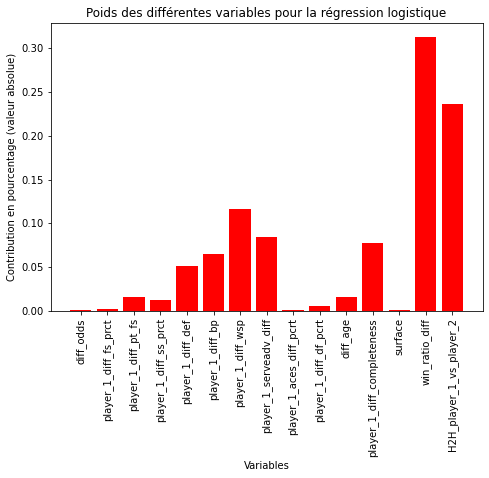

In [211]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['diff_odds','player_1_diff_fs_prct','player_1_diff_pt_fs','player_1_diff_ss_prct',
                   'player_1_diff_def','player_1_diff_bp','player_1_diff_wsp','player_1_serveadv_diff','player_1_aces_diff_pcrt',
                   'player_1_diff_df_pcrt', 'diff_age', 'player_1_diff_completeness','surface','win_ratio_diff','H2H_player_1_vs_player_2'

        ]
a = (abs((model_train.coef_))/abs((model_train.coef_)).sum()).flatten()
students =a
plt.bar(langs,students, color = 'red')
plt.xticks(rotation=90)
plt.title('Poids des différentes variables pour la régression logistique')
plt.xlabel('Variables')
plt.ylabel('Contribution en pourcentage (valeur absolue)')
plt.show()

In [113]:
model_train.score(input_test ,data_test['player_1_win'])

0.9935093033318909

In [102]:
confusion_matrix(data_test['player_1_win'], model_train.predict(input_test))

array([[2219,   10],
       [  20, 2373]], dtype=int64)

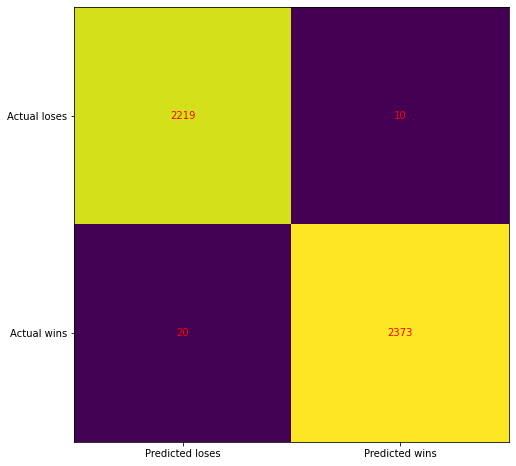

In [142]:
cm = confusion_matrix(data_test['player_1_win'], model_train.predict(input_test))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted loses', 'Predicted wins'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual loses', 'Actual wins'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [103]:
model_train.coef_


array([[ 0.01550034,  0.04780093,  0.3038705 ,  0.24416628,  0.96193158,
         1.20814744,  2.17444016,  1.56840838,  0.02960004,  0.10026164,
         0.3056636 ,  1.43858732, -0.01519412, -5.824968  ,  4.39136934]])

In [111]:
log_loss(data_test['player_1_win'],model_train.predict(input_test))

0.2241824508484697

In [119]:
dump(model_train, 'regression_model_saved.joblib', compress=1)

['regression_model_saved.joblib']

In [184]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_train, data_train['player_1_win'], test_size=0.5)
C = 0.001 # paramètre de régularisation
lin_svc_H2H_odds = svm.LinearSVC(C=C)
lin_svc.fit(X_train, y_train)

LinearSVC(C=0.001)

In [122]:
lin_svc.score(X_train, y_train)

0.9821952861952862

In [124]:
confusion_matrix(data_test['player_1_win'], lin_svc.predict(input_test))

array([[2216,   13],
       [  19, 2374]], dtype=int64)

In [185]:
dump(lin_svc, 'svc_model_saved.joblib', compress=1)

['svc_model_saved.joblib']

In [84]:
''' Attempt of doing an ANN but non working, accuracy = 0.04 '''

input_features = input_train.to_numpy()
target_output = data_train['player_1_win'].to_numpy()
target_output = target_output.reshape(len(target_output),1)
weights = np.random.rand(13,1)
lr = 0.01


In [85]:
def sigmoid(x):
        return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
        return sigmoid(x) * (1 - sigmoid(x))

In [87]:
for epoch in tqdm(range(10000)):
    inputs = input_features
    in_o = np.dot(inputs,weights)
    out_o = sigmoid(in_o)
    
    
    error = out_o - target_output
    
    x = error.sum()
    print(x)
    derror_douto = error
    douto_dino = sigmoid_deriv(out_o)
    
    deriv = derror_douto * douto_dino
    
    inputs = input_features.T
    deriv_final = np.dot(inputs,deriv)
    
    weights -= lr*deriv_final
    
print(weights)    

  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]<ipython-input-85-de109c074c99>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
  0%|                                                                                | 4/10000 [00:00<04:35, 36.29it/s]

10619.958689418452
-25974.100298416965
14128.997377158712
2684.495490522199
1038.648192482852
566.6866215423897
384.9427850955673
341.8630043476312
330.5101529779018

  0%|▏                                                                              | 18/10000 [00:00<03:35, 46.37it/s]


324.1991541498733
313.44379266495037
309.4891615114888
313.5779373800108
319.7310842372049
319.3133216273756
318.1745361624515
316.78217998817996
315.9130451377154
315.304025047439
315.00919498912225
314.8639186241929

  0%|▎                                                                              | 32/10000 [00:00<03:00, 55.25it/s]


313.6829224018826
315.33262649092524
317.34062694516376
317.8724303280948
320.28285999394967
321.3729006675271
321.59127975585176
320.6921491977879
319.4675054395591
318.0809570061867
317.1134471345045
316.00586925888337
314.95559700776334

  0%|▎                                                                              | 39/10000 [00:00<02:52, 57.66it/s]


313.3730987229902
311.59136401339407
309.1056905640574
306.3779541477259
302.09860480186495
298.2742398415579
290.3250776025323
289.6155317612716
263.66016930788186
322.6553318131081
12.866141022911458
1640.7784994426008

  1%|▍                                                                              | 53/10000 [00:00<02:39, 62.20it/s]


-10292.928846375838
28891.8467746883
-10911.503374944727
1772.276707965322
645.3750392085814
366.86341140962213
335.80074204053903
319.83486998151875
314.23599251430227
316.17350848148254
320.44543911044485
321.6807567930717
315.42075319289034

  1%|▌                                                                              | 67/10000 [00:01<02:41, 61.45it/s]


314.26648706522144
312.4277249694788
311.0978980593036
310.58210628735617
311.5311174198395
314.27024437534885
314.68222892345767
316.75582618638794
316.7513672964974
317.60155026538257
315.8736603780318

  1%|▌                                                                              | 74/10000 [00:01<02:48, 58.91it/s]


314.8945513507222
313.2728621437168
312.08584589051566
310.5439025389776
309.0684248616442
306.0842455130489
303.14561628457756
297.98979528192353
295.07277820319473
285.9948655152768

  1%|▋                                                                              | 87/10000 [00:01<02:46, 59.47it/s]


290.9895679574881
254.35339342929925
354.3033881168046
-95.30576795047949
2139.554586760102
-12666.754212760534
27753.103361936344
-7722.621413636655
1201.873643863302
454.55847725438525
339.6762666772868
320.4904472940638

  1%|▊                                                                             | 100/10000 [00:01<02:42, 60.87it/s]


315.81245761281735
314.3215074930667
317.372680922925
318.8295882131034
317.9425930648904
313.47897040801496
310.64669961178635
308.7106522014539
308.2223965354604
311.48428132255395
313.69962838838217
312.20407121471646

  1%|▉                                                                             | 115/10000 [00:01<02:29, 66.00it/s]


313.22265892740677
311.8295016050433
312.0597709793223
309.95035334431714
309.8850004943181
308.7272863368881
308.7061992082953
306.31217040823964
304.8076023941307
299.0239541105384
298.1783085008346
287.5303027553491
298.01661106032384
256.9650534325746

  1%|█                                                                             | 129/10000 [00:02<02:28, 66.55it/s]


360.67623461949415
-9.02978752800405
1437.0838038134355
-5867.763017872415
25655.945810515383
-17870.021684140047
4951.122230905459
1207.7398956803067
523.3686094501993
350.51554484549837
323.2612737821417
318.1402340913647
317.5487069207257

  1%|█                                                                             | 144/10000 [00:02<02:22, 69.38it/s]


320.05510413194594
321.3565582357587
320.16320728233256
316.0822689182298
312.97424677943724
310.50230435695687
308.4540193088557
311.15539718067475
314.85590967417403
314.51420121303613
313.2605848140933
313.44567047588464
312.65263927215875
312.64327921261315

  2%|█▏                                                                            | 152/10000 [00:02<02:21, 69.59it/s]


311.25045699590373
311.100409393387
311.0004676862931
311.24401555340756
310.3940026013533
308.48955966998057
305.03122337773164
301.9671170561706
298.3494391051486
296.1421305867172
292.31558109446155
292.756267044184
283.0398718395496

  2%|█▎                                                                            | 167/10000 [00:02<02:19, 70.57it/s]


297.91181482118833
233.4636231616336
439.26381787570244
-484.57128942146466
4536.671322808799
-23552.383324730792
22561.832163551313
2231.394810028721
908.7559986234141
486.54973775146686
355.05697392809367
324.1949746560025
315.3332613037073
317.2380016162108

  2%|█▍                                                                            | 183/10000 [00:02<02:18, 70.67it/s]


317.87863698421575
318.6926081089546
319.7770682840196
320.42494821479204
316.84954937840484
315.9830867472336
312.3395106939652
308.0436097355165
308.34822894713477
311.660011880543
312.7779723519596
312.82031423174664
312.20018189754984
312.83637724707785

  2%|█▍                                                                            | 191/10000 [00:02<02:15, 72.22it/s]


311.2116467540836
310.67480879477534
310.3454810931969
310.7293612067294
311.44406680927733
311.7176958995488
310.4542573807296
307.688468277037
304.80090610588434
302.00205637278356
299.8657339964111
297.7849575039948
296.25416510993887
293.7089687010884


  2%|█▌                                                                            | 208/10000 [00:03<02:12, 73.99it/s]

292.4227289542112
285.19663763763066
290.62272927292827
252.63732797777402
365.1977863172792
-175.69932647008721
2777.0087413975193
-17881.312722267427
25812.356820311863
-1739.0171365322224
18.95233340036367
286.7095242102476
314.83809411903115
313.1068784486634

  2%|█▋                                                                            | 224/10000 [00:03<02:17, 71.04it/s]


316.85359658624884
316.71095580929983
313.9075730956074
312.8212495062438
312.5912847167846
311.00214497412685
311.08352075906487
306.9781762369631
306.84356155908927
307.1256658555908
306.7494560131878
307.59285334761796
304.442116068371

  2%|█▊                                                                            | 232/10000 [00:03<02:17, 71.04it/s]


304.42139127706565
304.85852601171086
306.8105169937084
306.58698817298296
307.6966697712646
305.14464103065734
303.5421202371172
300.1691544364252
300.17554471828544
295.4174030214598
299.0050023348674
286.24338875193126
306.8915966292443


  2%|█▉                                                                            | 248/10000 [00:03<02:17, 70.71it/s]

245.48207397263667
404.0209389160074
-124.52676826970054
1877.004225220288
-8013.863643361211
26431.36289540453
-14262.5349071573
3722.7421020409856
848.2394426789748
393.40430277781934
324.0688423449459
320.9225387754314
317.2239197482377
313.38876259431936
312.921478099728

  3%|██                                                                            | 264/10000 [00:03<02:18, 70.26it/s]


313.42117013027945
311.85387744619345
311.5124945644258
307.4999512022181
308.4974442298198
307.6113308747154
307.05181692152433
307.81590357767516
304.38313672651407
304.37192937512435
305.0446650343769
307.5219752183746
307.5255491001758

  3%|██▏                                                                           | 280/10000 [00:04<02:13, 72.73it/s]


308.4910372817073
306.755985550198
305.19897704885136
303.2480465078261
302.29952728249503
300.0953630417721
299.76166403864045
296.75323691912706
297.4504232319653
289.53591380423995
299.8645339442253
262.3989417640572
355.14342390616446
16.263608120867957

  3%|██▏                                                                           | 288/10000 [00:04<02:14, 72.08it/s]


1374.3748468339102
-5864.182396819269
25959.10125317036
-17705.086102942514
4701.611333442979
1183.5046939797098
520.0871398993825
345.98086433018483
321.5403770080001
320.4019148547672
316.15283658776144
313.9106658259113
312.5865357690334
312.8280546486285

  3%|██▎                                                                           | 304/10000 [00:04<02:13, 72.50it/s]


312.2132662083636
311.89450051618326
309.0257481718894
310.028325761657
308.680850882655
307.26186169805135
308.29945355051456
305.6088964333725
304.43343013442586
305.56154418549505
307.9459894025644
308.7758629093519
309.0784264538024

  3%|██▍                                                                           | 320/10000 [00:04<02:11, 73.86it/s]


308.51857995410387
306.7777807656995
305.8270031998403
304.502330484823
303.4181450141047
301.67487442716833
301.5473575977912
298.9914881870508
299.1880567688534
293.8502470548339
299.26153590495045
277.65944500002263
320.4216105075386
170.8517140524005

  3%|██▌                                                                           | 328/10000 [00:04<02:10, 73.94it/s]


688.7954619757345
-1665.6631503424314
12272.817554954407
-27268.517922908235
15393.919028120281
3345.194260279675
1281.4232258379807
654.7084078573292
407.9396923709779
338.23519198107124
320.6056068122515
320.25507972644067
318.8222823313674

  3%|██▋                                                                           | 344/10000 [00:05<02:17, 70.47it/s]


317.7447343133763
317.4223336088701
314.8486194826013
314.4576094438721
313.7061724703324
314.0237011442142
312.6435112598444
310.9009754399458
312.2159331477616
310.2789690789349
309.59887587718276
310.906899324422
309.7530729072846
306.4266039736087

  4%|██▊                                                                           | 360/10000 [00:05<02:12, 72.99it/s]


307.1296234889472
308.7426925250984
311.1146494302425
311.6412227307509
312.2379957555359
312.59885514804256
311.13898504603867
309.83416289284185
308.8481261769254
308.00975532247054
306.80390972238206
305.6480475021542
305.06954861575946
303.9044672973782
302.5235350904042

  4%|██▉                                                                           | 376/10000 [00:05<02:08, 74.62it/s]


301.2903270439807
299.9246779416244
298.1334574588888
294.0700070624352
291.479750946227
283.6153933366747
289.6686107574811
241.82492546151542
425.17582475909353
-600.471288736092
6553.276252710938
-28115.693523842176
19470.040363278666
4503.039894590693

  4%|██▉                                                                           | 384/10000 [00:05<02:13, 72.04it/s]


1694.3667279591925
844.6532117900924
502.0295669136941
370.59920200481304
329.07893399285774
317.7462643719199
319.54541909478826
318.6479957476196
316.7039520951798
317.4041860462484
313.8751966552138
313.10592927418406
312.8649029334667

  4%|███                                                                           | 400/10000 [00:05<02:11, 72.92it/s]


313.60800305296806
313.41805900683477
312.52716193283464
313.63430652075675
310.98648454224775
309.42621527810803
310.3742478453623
310.12543770135
307.616437287489
306.9328962259433
309.09599727057514
311.37566025945296
312.4070972297853
312.58237757831546

  4%|███▏                                                                          | 416/10000 [00:06<02:07, 74.96it/s]


312.6564913536332
311.5432770934164
310.4939303522416
309.878415651877
309.32398681687687
308.1848185924794
306.84077471376753
306.5068999180793
305.8565278447485
304.6727620194194
303.6571793048592
302.7546841616784
301.88736480416196
298.825691405081

  4%|███▎                                                                          | 432/10000 [00:06<02:11, 72.67it/s]


295.92953832349946
290.9169988966532
290.4380666098614
275.53286989925095
307.32548282256164
148.7210032984581
930.0531771635422
-3903.687786023739
24178.92068910262
-21309.11572573947
6358.591661838941
1521.2095778943155
659.9827887699817

  4%|███▍                                                                          | 440/10000 [00:06<02:18, 69.03it/s]


391.38728414570403
331.58823301128785
319.85027189429815
320.25393042741314
315.94896061737853
314.1122998384847
308.58709838624446
312.2138742639438
314.34125438236197
313.8957501370641
311.82496188340724
312.17833068729277

  5%|███▌                                                                          | 454/10000 [00:06<02:26, 65.02it/s]


309.136370437376
307.15487616636875
308.0490822495665
307.25280343573183
307.0450531366952
309.25645830870275
310.83633041982165
309.8865752099888
309.35520347994117
308.5195750303572
308.2584410294278

  5%|███▌                                                                          | 461/10000 [00:06<02:27, 64.50it/s]


308.2222270876312
307.10719769618976
305.7602185173633
305.72305928497445
305.28887439963785
304.5606662241462
303.7156815765746
303.8605256487986
301.5742728656218
299.2836158234781
293.47051308387955
294.8994870197206


  5%|███▋                                                                          | 476/10000 [00:06<02:19, 68.48it/s]

278.3455032697974
313.7013353011563
166.7341817989209
788.7097128567771
-2452.6450820600026
17496.150459383865
-25362.195214121686
11475.498909719729
2407.471030648768
1004.0163880546429
530.5377312216933
371.35353790014324
329.75144432329927
322.0660143895433

  5%|███▊                                                                          | 490/10000 [00:07<02:20, 67.83it/s]


320.82894948599403
317.26243358866174
314.73624008850106
309.129520712887
312.39916042308727
314.08454565444924
314.5263516727176
312.8203826360471
312.7346907739963
310.3768660912071
307.5726462831289
308.516423143876
308.1049719088552
308.03491352931934

  5%|███▉                                                                          | 506/10000 [00:07<02:13, 70.86it/s]


308.72974223399746
311.62387894739413
311.47865141176715
310.51826490188466
310.0744830881542
309.30092336471324
309.5698573640834
309.3724692587463
308.2147231410558
307.0789980789112
307.3023317272344
306.75522023920763
306.242853888607

  5%|████                                                                          | 514/10000 [00:07<02:14, 70.61it/s]


305.46243307315194
305.99151998537377
303.8177987314075
301.91950255852373
295.99852987077884
297.7338732144679
282.83406839913044
311.51865981019876
203.7564441330956
603.8747870283154
-1248.550786736138
9630.241890481324
-27109.47971311039

  5%|████▏                                                                         | 529/10000 [00:07<02:18, 68.17it/s]


17301.09613574188
3663.359282327476
1350.0125278708829
678.5857842394361
419.03291298841134
344.8566966891613
322.49595656954415
321.8102315990326
320.43168689453165
317.75489274133025
314.6706023284432
309.4163634690901
312.4869275358594

  5%|████▎                                                                         | 545/10000 [00:07<02:16, 69.24it/s]


314.23346940565824
315.1135104560696
313.74970277103495
313.202180838211
311.53599968182914
308.2804343617168
308.7817581862985
308.90189814415186
308.5853609807798
309.1447342467647
311.4896460020554
312.893996566885
311.5797572769606

  6%|████▎                                                                         | 553/10000 [00:08<02:12, 71.45it/s]


311.12681154618707
310.42781816343376
310.3081442004682
310.77604160607535
310.33178010911604
309.06133104840944
308.4954665958262
308.6264021697278
308.2183913265678
307.5489199776989
307.3909008338966
307.59506466086185
306.03907143208704


  6%|████▍                                                                         | 569/10000 [00:08<02:13, 70.53it/s]

303.0699150947244
299.1478008229042
297.175099079628
292.0237872545653
294.9732141533443
273.93266114586044
335.34694107609806
72.3473447698019
1305.4740120326333
-5777.811008011149
25845.08975258145
-17741.04947248753
4714.515979728186
1204.3476265722877

  6%|████▌                                                                         | 585/10000 [00:08<02:12, 70.91it/s]


513.3719216030147
357.5802342267041
326.5419838573717
320.83768054209133
314.2792681700549
312.61920865074904
311.2029930954707
316.4946410491764
316.2137649199735
314.50158854153415
312.13478576657343
310.76607646440345
309.5610409488405

  6%|████▋                                                                         | 593/10000 [00:08<02:14, 69.78it/s]


308.1335598899194
309.8600198287662
311.3406939403454
310.69664009963003
309.32805944348377
307.1905313084378
308.5340234157239
309.56350402548424
309.54289372563215
308.391667678678
308.33984614309804
307.72537025696397
307.95557606258944

  6%|████▊                                                                         | 609/10000 [00:08<02:12, 70.80it/s]


306.95903174956453
308.5456513602227
306.5291741773877
305.0103337939719
298.7787697614111
299.8504371802817
288.63307200164115
305.7603520202618
248.63701549668244
424.90298130964277
-259.0030325155463
2834.7808719479176
-13671.904921867867
25805.80682229242

  6%|████▉                                                                         | 625/10000 [00:09<02:14, 69.54it/s]


-5970.107966822869
858.221701884523
385.96913670013106
325.90703319856317
318.13095013410884
311.0333115927158
307.8962227382911
311.5136814351602
316.92892402167536
314.6509459519861
311.02518107919934
310.90904611666355


  6%|████▉                                                                         | 633/10000 [00:09<02:12, 70.70it/s]

311.27560993693925
308.3939578195816
308.38680597027314
308.3697643649256
307.4026810656637
304.7196275073569
307.51586748111595
307.4323898270834
307.9273989761293
307.5063079559988
307.2123970537185
306.79528981816753
307.34718254740716
306.8202006594745


  6%|█████                                                                         | 648/10000 [00:09<02:17, 67.83it/s]

303.144603850518
299.8555067546746
295.4237357522455
295.29019456390677
286.4487770996735
302.4800265341734
244.1644506630565
460.6076608844785
-544.1779073620188
5055.1512941400215
-22899.78054657045
21988.156442316766

  7%|█████▏                                                                        | 662/10000 [00:09<02:27, 63.16it/s]


1906.9126476605807
782.2783633206111
434.604620841362
339.9165974702197
319.7686090937003
319.802826988883
317.6443723100168
313.1760124243651
312.30003664455097
311.82792678750764
317.26477488656735

  7%|█████▏                                                                        | 669/10000 [00:09<02:26, 63.74it/s]


316.24541987458826
314.5672493584627
312.03140027805335
311.5546813536013
310.07417981443416
308.82535486517867
310.8008424176796
312.00498206608245
311.9561452295829
309.59075279706184
307.75100433581247
309.0084534986405

  7%|█████▎                                                                        | 684/10000 [00:09<02:23, 64.88it/s]


310.5165992348056
310.3217863577022
309.27231637571447
309.2697592106663
308.690185612411
308.9526434575332
308.06597002436786
309.66023963284323
308.36127407761035
306.6191651537943
301.30460595747155
300.46438037595743
293.519317420965
300.29949121689174

  7%|█████▍                                                                        | 699/10000 [00:10<02:26, 63.67it/s]


274.799895157056
341.5970879006007
106.68658825841868
1039.1859239917728
-3334.7689622400108
19321.73653814413
-23013.671105151283
9990.799807094343
1835.9189003224042
767.1471202595554
425.8932710393419

  7%|█████▌                                                                        | 706/10000 [00:10<02:35, 59.76it/s]


344.1462521482379
326.70436605932355
319.2170688285299
313.9314811211317
313.02604808414657
312.71726145370155
317.82994078454357
316.9265585907928
314.8388294920854
312.86845191113355

  7%|█████▌                                                                        | 720/10000 [00:10<02:32, 61.02it/s]


311.5569375415433
310.6728895031254
308.9660337721427
310.6890912837896
312.16939402225364
312.5967416438654
310.6818884170272
308.52528731482505
308.8143414989721
310.9443031442911
311.29923535129586
310.44935644937345

  7%|█████▋                                                                        | 734/10000 [00:10<02:24, 64.04it/s]


310.03962357325213
309.7598005392799
309.7040739366759
309.3359734962196
309.6796444272454
310.57238251007215
308.77155027130203
305.68178227767817
301.4679737020606
299.5332651727754
295.5753937471498
296.7003346963365
286.1380254113235

  7%|█████▊                                                                        | 741/10000 [00:10<02:22, 65.20it/s]


310.6204627115137
221.36614976979405
570.404096691075
-1094.075086123042
8681.23373989076
-26583.354477679564
18108.66804699338
3565.743678135374
1305.6572849155468
647.7493302136239
411.53421996264984
341.0138122438584

  8%|█████▉                                                                        | 755/10000 [00:11<02:20, 65.59it/s]


325.79157140046516
323.1955995623987
319.85503599580585
317.217057862551
312.96298586273235
312.20253738162353
317.48981254123197
316.82892271265115
316.25212668750044
314.13651737409083
311.937739252917
311.1141196826923
309.21169562825963

  8%|██████                                                                        | 770/10000 [00:11<02:17, 67.29it/s]


310.1504966947058
311.4289296125012
313.28316893557883
314.299847788297
312.388830555685
310.53736244246176
309.7593134995183
311.4513580210654
312.3270711055781
312.3819540968812
311.2824098905979
311.08284580155976

  8%|██████                                                                        | 777/10000 [00:11<02:30, 61.14it/s]


310.6566388998772
310.9197879436939
310.2512699492435
310.9024123619123
311.5342369491781
310.6245580005213
307.432811992505
303.76310198648184
300.9015404055568
298.483636003781

  8%|██████▏                                                                       | 791/10000 [00:11<02:29, 61.46it/s]


296.75488085902623
293.62895557676364
295.21075594022665
285.4348314907935
316.37702802712914
162.68008415322294
902.5517288094181
-3140.930072527287
20116.235900321928
-23331.58380363708
9389.812179600129
1896.2486749135712
797.5463207030111

  8%|██████▎                                                                       | 807/10000 [00:11<02:15, 67.83it/s]


441.5102510375503
348.67643302147064
328.53456444762884
320.3481860248583
314.5806928232925
314.1123391834964
312.990602047415
318.62845279805106
318.8112640186839
316.1999216160722
313.6507300127541
311.93811936354996
312.89283136408204

  8%|██████▎                                                                       | 815/10000 [00:11<02:11, 69.78it/s]


310.21677197370786
311.05131191653845
312.41840013935325
312.7160083808147
312.7746813715786
308.82348640978347
308.69784252656757
310.892255440055
312.07642876717466
311.208229949957
310.9157714270213
310.7436631555363
310.53986527962786
310.44079323779005

  8%|██████▍                                                                       | 831/10000 [00:12<02:10, 70.27it/s]


310.4384896893436
311.96137152706905
310.60920946760467
307.979444283401
303.5213885121997
301.44458946361544
297.7222277425451
298.39644275424246
290.2192929006753
306.07096201844473
254.05092717174924
436.19357749259274
-348.0167946689467
3505.6127339228374

  8%|██████▌                                                                       | 847/10000 [00:12<02:10, 70.29it/s]


-16756.337919086145
24608.579659528434
-2541.00090442171
74.87087541105466
307.25300674657177
321.9735599241046
318.8743236482041
313.14456012081024
307.67763585914753
311.0355507833008
316.97491983352666
316.327883946765
312.6767031564492

  9%|██████▋                                                                       | 855/10000 [00:12<02:07, 71.49it/s]


313.03146970572504
312.5254494864541
309.26460898677476
308.62583189152923
309.0481681112929
308.60516163577137
307.14318909131276
307.20400014153154
309.08418968223623
310.03168230502627
309.78724470726735
309.31931769616125
309.2200101696266


  9%|██████▊                                                                       | 871/10000 [00:12<02:05, 72.94it/s]

309.9976470893498
308.7956409436022
305.49440597634435
301.78726417407694
298.5521989522007
296.9559887967586
293.03396210894715
297.10209494174086
283.0521717066512
327.208465369306
149.878942293889
905.3732275581829
-2816.6396506247324
17913.517825078034
-24211.51832019528

  9%|██████▉                                                                       | 887/10000 [00:12<02:04, 73.02it/s]


11091.348199659618
2123.3040312555763
879.6858046518234
468.8317546604355
357.49389069406976
330.98741225574975
321.4530616747325
315.13291422829184
314.1741301734119
313.129297348811
317.6985820660152
319.3305534660431
316.7855718951801
314.23886601509093

  9%|███████                                                                       | 903/10000 [00:13<02:09, 70.07it/s]


312.1051834237208
313.45632382572194
310.99356055160973
310.82130920314665
312.3507560716665
312.6033608357712
313.1404710172047
310.06280815726944
308.1972075474921
310.7381607554845
312.35684259853633
312.0005488815068

  9%|███████                                                                       | 911/10000 [00:13<02:10, 69.75it/s]


311.37096678397563
311.51521850877947
310.970754123352
311.2633412573504
310.71267910135083
312.51983138073956
311.861333725951
309.8488462119358
305.32982825007093
302.91242023891516
299.1664420426872
299.62620068760344
292.4376361684065

  9%|███████▏                                                                      | 927/10000 [00:13<02:10, 69.38it/s]


304.03230845836305
267.6753983353679
384.30151615856664
-73.05822232341873
1905.2320582035215
-8161.311102583052
25916.597670354477
-13890.60325223799
3766.6472646324223
851.2346368091901
411.20972031343945
337.907179569599

  9%|███████▎                                                                      | 942/10000 [00:13<02:09, 69.69it/s]


320.1540914140089
308.8102726964554
309.55252014708117
314.53051894241577
319.3964846368734
315.26656095505365
313.6487517029855
313.4419216162455
313.4853880036649
309.8024502068146
309.731665991349
309.89454060417313
309.6941691796929
308.22172266260134

 10%|███████▍                                                                      | 950/10000 [00:13<02:08, 70.49it/s]


307.74180491502693
310.0936441755332
310.37669592516767
311.2986871559251
310.22087935768974
310.5206309896572
310.2731615983025
311.7507924290629
309.12060735318386
306.4028308798053
301.59334238366597
300.41140068707597
295.98317313128183
298.04609368811106

 10%|███████▌                                                                      | 967/10000 [00:14<02:02, 73.67it/s]


288.7273727599163
310.98456694724285
240.80646560851105
490.3339047426691
-594.4910573649453
5012.336973103096
-21410.729665575134
22252.208754921783
981.313942977725
490.0659564026011
353.96134494911803
326.38207928507614
322.3000358994823
318.3024380326765

 10%|███████▋                                                                      | 983/10000 [00:14<02:00, 74.81it/s]


310.83882949054527
309.58949048649833
312.7210483352914
318.63468386715505
318.62795707910993
314.02518854550885
313.24582040033096
313.7398091997568
312.94326149160577
310.3966647511423
310.586569344634
310.77381991558127
310.5796232038869
308.325551322521

 10%|███████▋                                                                      | 991/10000 [00:14<02:00, 75.01it/s]


308.28907108749956
311.013059242052
310.60065007387595
311.6578821292611
310.6889049012825
311.04092708172203
310.396724623155
311.9959540525909
311.543686628273
309.1233256053523
304.9827687154252
301.9126626506402
299.2547433693721
297.7761258118034


 10%|███████▊                                                                     | 1007/10000 [00:14<02:01, 74.21it/s]

294.55650098195383
298.1868339955133
285.659013255177
325.7243775880719
160.9420405855454
858.8295439392722
-2509.3712781098507
16384.128588948413
-24904.536720603995
12232.832853856
2330.98726711751
962.6905663542452
503.13049721033934
369.2006223803434

 10%|███████▉                                                                     | 1023/10000 [00:14<02:03, 72.61it/s]


334.99496265171405
323.20020250512414
316.27437223765247
314.1454600254804
313.613370463254
317.28383662302855
320.7283418685956
318.00253802788205
314.90854447027743
312.7733327784822
313.9936941709729
312.6500015105944
311.2026379447561

 10%|████████                                                                     | 1039/10000 [00:15<02:01, 73.86it/s]


312.4305365336443
312.61432305424984
313.1463760520233
312.3172280877292
308.05013775876967
310.1803096224784
312.43237502252714
312.8742774662025
312.01801928614714
312.41833660756754
311.7185106812001
312.0867410986475
311.45190041625443
312.8220687041752
313.36898843427247

 10%|████████                                                                     | 1047/10000 [00:15<01:59, 74.73it/s]


311.880215893968
308.0245446895377
304.6493794681974
301.4828288474985
300.37236397785375
296.7692783598991
298.8238415036999
289.62736481859434
314.0407902520834
230.44439880569112
538.0010508073811
-842.0687537722688
6677.192702283816
-24369.576547497003

 11%|████████▏                                                                    | 1063/10000 [00:15<02:02, 72.89it/s]


20183.70049899938
2612.993061404918
1033.4881475911172
531.1377592233725
372.252885441228
333.21244189048707
323.91570378688544
317.57142247460257
312.7447614577894
312.6646176179702
314.5526904805255
320.03506832889906
319.1689800234799

 11%|████████▎                                                                    | 1079/10000 [00:15<01:59, 74.38it/s]


315.8501404910525
313.5047531384182
313.66809663277576
314.14702609183126
312.0217315442056
312.11168167122725
312.08964547560726
312.4302616775361
312.08684480395914
308.6112917378272
309.45952727491584
312.38288163812007
312.36648120335093
312.190250386154

 11%|████████▍                                                                    | 1095/10000 [00:15<02:00, 74.06it/s]


312.3420599443898
311.83419801757185
312.03229827733526
311.6566642677868
313.41755538901276
313.15960659742973
310.91728877179554
306.74440912708866
303.7228548764724
300.8125101744949
299.9578861773473
295.86391143370736
300.1888765288533


 11%|████████▌                                                                    | 1104/10000 [00:15<01:58, 75.27it/s]

286.03214737735294
327.7170447785978
177.52505211615244
757.6100142922861
-1833.50620625707
12359.756020382674
-25919.151665525456
15341.665758207768
2844.7978626824206
1114.2401555919546
566.9245093407037
388.3698520728403
339.831915276413
326.37314789437414
319.2124129360346

 11%|████████▌                                                                    | 1120/10000 [00:16<02:05, 70.99it/s]


314.9436756620974
314.5014017174266
314.96207184611507
320.3934359414832
319.7907962399144
317.08184232567163
314.34376737350493
312.8077948784046
314.56821369039176
312.18875025945397
311.83591032899415
312.8455735060155
313.0060220735788

 11%|████████▋                                                                    | 1128/10000 [00:16<02:06, 70.34it/s]


313.58321689315295
311.91553038732417
308.2313056307627
311.1569667442344
313.23284210574263
313.3717175209539
312.74421198253026
313.0595346348743
312.4209866061353
312.77771978900853
312.2114358387602
313.7017863146512
314.3070577536733


 11%|████████▊                                                                    | 1144/10000 [00:16<02:04, 71.24it/s]

312.8822635007554
309.0715793538294
305.63423625342904
302.508492557032
301.3301123458702
298.2120545201733
299.2199302063687
293.04661972220225
307.7186166078087
262.03737666926355
415.6537759556028
-241.7098339451522
2917.3581941966345
-13773.524514582228

 12%|████████▉                                                                    | 1160/10000 [00:16<01:59, 74.05it/s]


25503.85946860201
-5734.314274398283
834.1292000568592
389.05161831286705
331.9788081912345
319.2627548736603
313.35037280207246
309.89885073762406
312.1508060992621
318.7115637268473
313.95801841901476
315.30023801918094
311.92036750307557
310.3531401050771

 12%|█████████                                                                    | 1177/10000 [00:16<01:56, 75.97it/s]


308.44141529704274
307.4698554207353
307.4917670188105
307.03632664371617
307.3373717980124
310.3389480052267
310.6300547708702
311.12898289970684
309.9006222704112
310.8224012347386
309.7414393180552
308.04818837365303
304.23046510127386
300.9683140084341
298.67333585227857

 12%|█████████                                                                    | 1185/10000 [00:17<01:57, 75.21it/s]


296.112835187199
296.01961337062914
294.8144400344304
298.42395319531647
288.1858394022604
313.28385188228884
195.4642953856064
771.7379414583211
-2226.8878262608537
15713.180147436302
-25592.271150659475
12765.841315511681
2519.13036280914

 12%|█████████▏                                                                   | 1201/10000 [00:17<01:57, 74.73it/s]


1052.8824252441407
546.8119432524961
382.71811045725167
339.2499378442455
325.79114440877925
318.5537936543343
314.5157949537891
314.07854837244537
315.63213658724857
321.3938957411477
319.86946256391116
316.7623318978666
313.88651733793347
313.3480561968327

 12%|█████████▎                                                                   | 1217/10000 [00:17<01:56, 75.13it/s]


314.672365669357
312.35211727566605
312.3302534701754
312.7929769022187
313.02994821424295
313.4053479301275
311.2152396850729
308.55230187419454
311.75332469246587
313.3191075143427
312.85895679389375
312.88787220037267
312.7375030233539
312.48472200099616

 12%|█████████▍                                                                   | 1225/10000 [00:17<02:00, 72.52it/s]


312.49992667161627
312.43644059445603
314.196273188653
313.86966820132733
311.53160548478627
307.3994949045691
304.3542154403325
301.5642495690708
300.61915390702285
296.92676007883676
300.0658640944814
289.1019634753717
320.07771932865035

 12%|█████████▌                                                                   | 1241/10000 [00:17<02:02, 71.69it/s]


213.621174571057
605.3855868939163
-1108.6399727603477
8069.382566636124
-25142.750617021797
18812.671079287808
2953.128146462278
1105.3059307714448
556.6064605177337
381.978147000765
337.23125129519303
325.5402035798148
318.4206121492367

 13%|█████████▋                                                                   | 1256/10000 [00:18<02:09, 67.69it/s]


313.11623282300366
312.94346180624353
314.7630863113631
320.19250935135284
320.01175318640287
316.55878690213814
313.97252067477183
313.66578884543713
314.9200110128384
312.7198472813857
312.15534191466395
312.2366863241423

 13%|█████████▋                                                                   | 1263/10000 [00:18<02:10, 67.14it/s]


312.5386632315666
312.6278919635242
310.35394977195
308.91535934762675
312.1872486119201
313.1069838088373
312.7436386964053
313.1602361716958
312.5844897047993
312.7589744928209
312.347094532558
313.478945777283


 13%|█████████▊                                                                   | 1277/10000 [00:18<02:13, 65.44it/s]

314.52120189282573
313.1299621720443
309.56886488004034
305.91276839128443
302.8216981949074
301.4137729749385
298.5975789727212
298.8585810315198
294.8652120414689
303.4917624683526
278.3140613580977
356.8122909027022
24.098465838162955

 13%|█████████▉                                                                   | 1291/10000 [00:18<02:09, 67.49it/s]


1545.4836894420841
-6297.245171483502
25000.376663609688
-16882.297276351146
4976.198091432449
1135.4324059805347
488.5619387109589
353.5398623704254
326.578897069479
315.169550610253
309.34760692269384
312.4811313885701

 13%|██████████                                                                   | 1305/10000 [00:18<02:12, 65.72it/s]


317.8956264101889
319.7143966241329
314.6380581583262
314.78757274710046
314.1020340062677
313.103157354617
309.5928202626511
310.07026684705244
310.04228217547416
309.90214889430433
308.8814769910774
309.5555490402993

 13%|██████████                                                                   | 1312/10000 [00:18<02:14, 64.74it/s]


310.42007484365706
312.4108806119092
312.27738696595014
311.997921850602
311.61037586559013
312.3288181853784
313.12720256648095
311.31700141859176
307.94200937660156
304.155211696108
301.4209676539844
299.7918820195459
296.8818414895781


 13%|██████████▏                                                                  | 1328/10000 [00:19<02:05, 68.92it/s]

298.4201730065557
292.9782217593088
308.1115068808236
259.66697521800535
424.0003761843243
-278.56368956451473
3143.1386102661495
-14800.114336096409
25139.89419312194
-4523.670587243479
503.26132387340465
337.81127613369677
326.97236441138284

 13%|██████████▎                                                                  | 1342/10000 [00:19<02:08, 67.22it/s]


318.40987201054867
313.6945386937239
310.13107517713956
312.17146114179815
318.8912987691834
313.80973277701366
315.5091934823329
311.8796376796274
310.610205046235
308.5892887795805
307.2545930890565
307.2805032287063

 14%|██████████▍                                                                  | 1356/10000 [00:19<02:11, 65.81it/s]


306.79689704123285
307.1337116705328
311.2388127443026
310.5519656738731
311.3698397314764
309.8948238897603
311.0471647261625
309.6584933274603
308.17280915122745
304.1223472704474
301.1831340071528
298.53023365199726
296.54122345279404

 14%|██████████▌                                                                  | 1364/10000 [00:19<02:08, 67.36it/s]


295.46481883794837
296.6601755985273
294.12329798837095
303.5313177285453
258.5376632899108
434.4997542636455
-383.42665378599196
4097.965728600991
-19566.254111540577
23543.974550099352
-263.98820274750807
213.74518691166827
309.3056981404351

 14%|██████████▌                                                                  | 1378/10000 [00:19<02:13, 64.40it/s]


323.3540095413693
322.3101201942714
317.69636915311344
310.08158935519475
309.8800989707226
313.8806056017782
319.670493180112
316.0476556280703
315.0365373244935
314.37775170554113
313.61031389169756

 14%|██████████▋                                                                  | 1392/10000 [00:20<02:10, 65.88it/s]


310.0551321082636
309.59827344825555
309.6712174033907
309.26674976987306
308.3627141839463
308.7388923186192
310.3344840358478
311.451268286625
311.7964177932702
311.14729665158137
311.03861268256424
311.7320479054603
311.80198478631155

 14%|██████████▊                                                                  | 1406/10000 [00:20<02:09, 66.35it/s]


309.15219689052265
305.93972768485435
301.79645697339794
300.51225342848835
296.6350922960371
298.01297645014284
292.19698825117393
305.9190191733493
266.171990860376
397.91935282328797
-148.98105852170033
2367.6452595111464

 14%|██████████▉                                                                  | 1413/10000 [00:20<02:07, 67.15it/s]


-10774.59585920508
26070.56618745071
-9803.807953586253
2157.302075074629
639.260230138057
361.0157323390397
324.2634230672009
314.7916218371047
310.52817419959825
311.6643727982247
318.07034881755567
316.00628080674176
315.21989730606197

 14%|██████████▉                                                                  | 1427/10000 [00:20<02:09, 66.35it/s]


313.76570512383336
311.1026947274099
309.36398210560213
308.137183127523
307.6618169796408
307.7993607167735
306.61176924444965
309.2397353770055
311.2021137290839
310.9794930797226
310.9195831622034
310.1229392447733
311.1271432981397

 14%|███████████                                                                  | 1443/10000 [00:20<02:03, 69.42it/s]


309.76017036356166
307.5293606538199
303.47770577357596
300.57237245832493
298.219872931326
295.84450832488176
295.9624995439743
294.32059653021304
299.41600488818165
283.1302201275465
331.21474180211845
117.11952107088399
1168.1124873823903

 15%|███████████▏                                                                 | 1457/10000 [00:21<02:07, 67.23it/s]


-4506.655271490065
23128.27887108872
-20164.645317192946
6862.908969705594
1370.8595276759536
577.1967604108556
378.97266540105056
335.49704696346174
322.9063102401604
311.78477135617203
310.097218786394
313.26613170335116

 15%|███████████▎                                                                 | 1464/10000 [00:21<02:08, 66.47it/s]


319.26894911049664
319.7951831690281
314.79593351715346
313.97251480787213
313.90960927303746
313.7148347403702
310.40424003830196
310.28957336373503
310.69177680199584
310.7499949730793
309.5842761411825
308.86136363119493
310.9423286127533

 15%|███████████▍                                                                 | 1479/10000 [00:21<02:06, 67.28it/s]


311.3252279363551
312.4490813496916
312.0297752302258
311.9318551124108
311.62936668387584
312.2666167114889
313.488265459974
311.96861696051775
308.5387120217512
304.74240484204205
301.67116872372964
300.10460211313716
297.00964440232764

 15%|███████████▌                                                                 | 1496/10000 [00:21<01:58, 72.03it/s]


297.8335014685222
292.8157879494173
305.13905572327985
266.3078046770336
397.209294357666
-166.8327188836412
2552.199900750113
-12098.671256386235
26014.92713409635
-7960.283635952756
1517.548784004235
520.3022239651765
340.1573802165068
321.4470977280051


 15%|███████████▋                                                                 | 1512/10000 [00:21<01:54, 73.91it/s]

314.88952827735704
310.5041543680554
311.5822856605997
318.1612825079177
314.8941791618018
314.7764899927895
312.81072907254776
310.6241497508952
308.948176869462
307.53757772759434
307.0754832900209
307.184737870373
306.19449875872294
310.0353903477557
311.1719858909235
310.7386416322781


 15%|███████████▊                                                                 | 1529/10000 [00:22<01:48, 78.11it/s]

310.28176637775755
310.1374403498556
310.5489938587409
308.496059597391
305.80409440504314
301.36454307232736
299.7608750102846
295.8518471541691
296.8367504390884
291.8176150181075
303.82376019111746
269.91671571707775
382.9586844561993
-86.62552721022647
2061.869539827926
-9174.833197964088
26119.94471341011

 15%|███████████▊                                                                 | 1537/10000 [00:22<01:51, 76.18it/s]


-12258.358583629582
3089.562522495494
747.0817106270418
392.9208665155209
333.1167267123935
318.5052916862053
309.4163707219415
310.4747938767883
315.57490484743397
319.06835904277955
314.8026975674626
315.28509102895856
313.2778385303214

 16%|███████████▉                                                                 | 1554/10000 [00:22<01:47, 78.49it/s]


310.852770265925
308.7831838793876
308.9098204177195
308.3391639875408
308.2660162337297
307.2633978920961
309.86547804455967
311.1320064926442
311.36558177692257
310.9291856500456
310.4641941630397
311.2731905611497
311.0117107177902
308.48117985170103
305.05154162721635
301.09708384996253

 16%|████████████                                                                 | 1570/10000 [00:22<01:50, 76.60it/s]


299.5967362934228
295.8285945647982
297.18522504302075
291.54862324746927
305.4738610451501
263.90556583391236
405.28376716957047
-194.6264662918132
2657.9330954083193
-12521.515491089007
25872.43020606179
-7396.989501877515
1368.660319021681


 16%|████████████▏                                                                | 1586/10000 [00:22<01:52, 75.00it/s]

469.1581187064095
335.04180006112125
320.5379833204237
314.3397390677293
310.0382476859272
311.6868892453362
318.2773132639935
314.33717919040384
314.7432926302577
312.42662767327437
310.4882826159723
308.6030897157864
307.44721961859483


 16%|████████████▎                                                                | 1595/10000 [00:22<01:46, 78.73it/s]

306.9434967703777
307.03147593226737
306.1343062426481
310.19238902761725
311.13374914558915
310.6287780863813
310.0177727985297
310.098049769752
310.30480814212535
308.1471362355038
305.2206785183424
300.86450398925615
299.34908658740704
295.2846151233164
296.80041228721063
290.78466006724085
305.7707063461732


 16%|████████████▍                                                                | 1611/10000 [00:23<01:55, 72.51it/s]

261.9183079106212
411.86862518611025
-219.86047508123156
2771.2989171793656
-13038.60237259078
25720.40526367556
-6675.50828837547
1108.0365306054039
422.6584317708992
333.0970017612527
319.92910514961557
313.54747172229065
309.66623054887714

 16%|████████████▌                                                                | 1627/10000 [00:23<01:58, 70.95it/s]


311.98277236564235
318.42212132386913
313.9642101511905
314.8657810049969
312.05038483918776
310.25109882423527
308.2599331738073
307.3511238075733
306.87466647201103
306.84493624773444
306.18919762928164
310.4639819660782
310.97229460831005

 16%|████████████▌                                                                | 1635/10000 [00:23<01:55, 72.38it/s]


310.56026820995015
309.7450139249181
310.14747868626995
309.95456074897635
307.7501446933488
304.4955179329861
300.3992497369867
298.8238635118884
294.8363230963618
296.63608225417653
290.25007299942035
306.9274931435115
256.3326874431003
433.0490356500402

 17%|████████████▋                                                                | 1651/10000 [00:23<01:52, 74.11it/s]


-326.5759739607603
3410.5379124381398
-16099.892216470816
24734.106483246895
-3151.4870598650677
166.79013001475647
319.24601939147664
324.9245872415869
318.38878530390207
313.30220650996876
309.2883897449502
310.9699842266472
318.1006009963113
314.96297075172157
314.8675548622012
313.2483635759821


 17%|████████████▊                                                                | 1669/10000 [00:23<01:43, 80.17it/s]

310.9307609785267
308.690201363479
307.9914440498036
307.3618738100486
307.35866837202104
306.1865686937954
308.98935594678517
311.29130399167485
310.57895189602266
310.26772108353543
309.69541681039175
310.6377985595929
309.14785436236133
306.5488146263888
302.4159680486589
299.6820854533508
297.1235375193358

 17%|████████████▉                                                                | 1687/10000 [00:24<01:42, 81.12it/s]


295.0023200750228
294.93176575719485
293.52447038077037
298.34345156126534
280.9313026099361
335.8608568381436
83.88461593276256
1375.114199186327
-5978.920643099274
25494.21589373246
-17374.423737264206
4809.892796204253
1180.3206536752825
505.0579647575702
359.1138281646347

 17%|█████████████                                                                | 1696/10000 [00:24<01:45, 78.44it/s]


328.65911225856286
318.5690855083291
309.8369043479889
311.4484380806544
315.989278651502
320.6858434406231
316.78483907928927
313.4229881275988
313.67684864457
314.5106232555271
311.71001368237154
310.00555292888794
310.4179684780278
310.0933161945229


 17%|█████████████▏                                                               | 1714/10000 [00:24<01:41, 81.53it/s]

309.36894867114273
308.02315324453383
310.2818467752795
310.8290579726467
311.5050803992903
311.65646838621984
311.1980243973087
311.09902589764914
311.39873094756086
312.71133455527263
310.9038861005684
307.5842170380988
303.5470825478101
300.7628169521344
298.6401425529904
296.08483519554125

 17%|█████████████▎                                                               | 1732/10000 [00:24<01:39, 82.76it/s]


295.9099901112521
293.05092945007084
300.2032749783267
276.027452668448
356.70953156077366
-8.70698766909742
1823.7413840645238
-8544.115537791231
26534.573388091627
-13276.61203432209
3295.5138243067154
811.6497086777111
408.23679560926917
338.664579115407
321.3943684572607

 18%|█████████████▍                                                               | 1751/10000 [00:24<01:38, 83.82it/s]


310.84866530602585
309.8395074074946
313.712316351277
319.1799339445686
316.6222399122164
314.72345187983024
314.47093081124666
313.83500351339563
310.3379312432641
309.61672730168885
309.5553222360941
308.84592015255555
308.10542208388426
307.83070658531994
310.2988611223238
311.231187031485

 18%|█████████████▌                                                               | 1760/10000 [00:24<01:39, 83.20it/s]


311.11544639618944
310.7543982530982
310.32680287694615
311.04393753932226
311.32940607059663
308.8825978607483
305.406286895036
301.42299238918065
299.4730820768642
296.3114850747029
295.8927541057626
293.20300840685246
298.45346248043677
283.5326674390278
331.42591570075695
118.23646463346039

 18%|█████████████▋                                                               | 1778/10000 [00:25<01:38, 83.35it/s]


1123.7522811384188
-4170.409617469163
22297.199303777743
-20940.741487153402
7590.685200446276
1437.2892168742076
607.6973747148955
386.84349614848713
337.7341296697831
323.72323814357884
312.985325128536
310.23358838094754
312.72008232950725
318.34937271605224
320.02429618446024
315.46952310978304


 18%|█████████████▊                                                               | 1796/10000 [00:25<01:43, 79.53it/s]

313.77972185007906
313.1476733205131
313.8611190939273
310.78411206511794
310.1161360389461
310.47973233408226
310.71606502127236
309.9322867826931
308.20030772956426
310.5486091034757
311.6487166468071
311.440581367862
312.21317528585894
311.48012245471233
311.7359852698217


 18%|█████████████▉                                                               | 1814/10000 [00:25<01:39, 82.48it/s]

311.250160412514
312.84240842937885
312.80994686235107
310.50830157828875
306.3508164238705
303.0960922296502
300.1161178414093
298.9160904111215
294.9355982243907
298.6707962134248
285.8042401380026
323.9466855393737
188.59877139114462
713.7362962034163
-1637.7335046048536
11294.140456888945
-26081.27696417458
16124.541076011104

 18%|██████████████                                                               | 1832/10000 [00:25<01:40, 81.51it/s]


3030.136401374113
1158.740401428102
579.2365240194487
391.97025921557884
340.42256829959825
326.9456568512114
319.77109925117617
315.4227457423387
314.6419350965911
314.69880332827285
319.80300698323333
319.80873101557563
317.3100784327138
314.4849388186847
312.4991958413324


 18%|██████████████▏                                                              | 1841/10000 [00:25<01:40, 80.89it/s]

314.4299664631965
312.08438280560875
311.21507407856956
312.3432553417576
312.5194388766179
313.13644719849634
312.00255375672924
309.3005892216445
310.6752273347556
312.74586184453676
313.38727144451275
312.72361431101933
313.17190521381286
312.4927572862771
312.81353846220946
312.2797490486915
313.27983731187754

 19%|██████████████▎                                                              | 1859/10000 [00:26<01:42, 79.72it/s]


314.3336977197272
313.3167791885479
309.9110873755052
306.0532078472114
302.9257531586774
300.8817004392363
298.7488996091483
297.0964052459624
295.94580817711335
295.6200952124667
297.33002132941556
285.6087423963286
320.4104317886754


 19%|██████████████▍                                                              | 1877/10000 [00:26<01:43, 78.42it/s]

164.38562989877622
989.3516598718714
-3634.6524322536075
21435.553276640017
-22062.88181468954
8289.568877649703
1645.0874102192092
701.8538728312428
417.81789286941904
346.6774445507495
327.3582015660271
316.9578470505882
310.7088534298495
312.1891803103186
316.40703318017626


 19%|██████████████▌                                                              | 1885/10000 [00:26<01:43, 78.63it/s]

321.3105587736069
318.0888272783871
314.3295673920144
313.4250772724606
314.59520895559996
312.91036939315677
310.747812260829
310.82076583467784
311.0759924319931
311.00927533267054
309.22755282715076
308.9185102388874
312.00650697126883
311.72967758564886
312.12335425292474
312.1907761801949

 19%|██████████████▋                                                              | 1903/10000 [00:26<01:38, 82.06it/s]


311.858826525646
311.85181554901067
311.89363792672685
313.58262256166597
312.7315449336653
309.84866488278203
305.73705240755754
302.6346458125616
300.24937647829455
298.39465422101733
296.0202188356066
297.25565511626064
291.5957482834344
309.8984193454067
240.72999464540902
506.0336272653145

 19%|██████████████▊                                                              | 1922/10000 [00:26<01:34, 85.70it/s]


-707.9874238279982
5987.663904905158
-23554.655442402985
20951.785144253347
2207.6408730434905
892.5638919988997
481.92286912471974
358.42242576701585
330.37193085641803
322.57257125752596
316.4070178375225
311.15167946638894
312.0841113737399
315.85431350867583
321.08640495260545
318.36495782357207
314.32488808634156


 19%|██████████████▉                                                              | 1940/10000 [00:27<01:34, 85.49it/s]

313.5161560475428
314.77514854432974
313.6570567726674
311.33002890354885
311.1218137179977
311.27955536581646
310.9688910350829
309.4370124971631
308.7208270006017
311.7398800718395
312.0971999008061
312.0043653538926
312.44887888948125
311.8894886633523
312.0556426394718
311.8418863172412
313.61713283876037


 19%|███████████████                                                              | 1949/10000 [00:27<01:35, 84.08it/s]

313.0255954419246
310.3765405411442
306.2177093305278
303.06874419837845
300.48342934461755
298.92445020750364
295.93625623060836
298.249068977695
289.9052786634611
315.4612441612523
225.41308762511736
565.0726420596947
-950.1705679908866
7275.259794198104
-24742.91179272973

 20%|███████████████▏                                                             | 1967/10000 [00:27<01:38, 81.68it/s]


19568.28788844782
2801.762578632153
1065.3568177872644
543.9567910878956
377.39651228900925
335.4283635841812
324.71480082992116
318.20958364456095
312.72491616653156
312.7620884447316
315.0670392246239
320.54661350676827
319.75265218226457
315.9440009955217
313.677617905166


 20%|███████████████▎                                                             | 1986/10000 [00:27<01:36, 83.27it/s]

313.88760461771517
314.6639250805742
312.31610464972084
311.62735880410037
311.5954292750501
311.78522995082835
311.26348208312646
309.0593203264272
309.79712692093176
312.8704203750147
312.33592714779957
312.65320373089685
312.75326812201416
312.38539658246407
312.4881648166277
312.26016989398113
313.99546064703793


 20%|███████████████▍                                                             | 2004/10000 [00:27<01:35, 83.83it/s]

313.89526987684354
311.5712978040742
307.43041600760614
304.1758296628764
301.29874313176714
300.10157076060864
296.54227931333673
299.10240748479555
289.87158837327377
315.54142524247965
233.19527327114292
528.3752088559728
-737.7447028720152
5792.910900766326
-22498.499208837286
21304.659213845145
1610.3218082427056


 20%|███████████████▌                                                             | 2013/10000 [00:28<01:38, 80.97it/s]

691.434152948981
414.8282831085193
340.7273360628981
326.27332637781603
320.44063377167
312.6845363405763
310.072973908138
312.6882978463429
318.3027641546056
320.28776256481996
315.26643376814536
314.21482028067663
314.3135640011802
314.43037968176696


 20%|███████████████▋                                                             | 2030/10000 [00:28<01:45, 75.89it/s]

311.0071872003861
310.27668906977357
310.68469505110227
310.1665752525175
309.2459318714547
308.4037853653516
310.92364970809507
312.07305834452717
312.42848488644063
312.1124516071976
312.00152927142335
311.7373325158676
312.4762119352809
313.60508324436546
311.9104384868941

 20%|███████████████▊                                                             | 2047/10000 [00:28<01:42, 77.55it/s]


308.4163882572154
304.61850045219416
301.62614315921155
300.03011489031564
296.98873302536936
297.9901984777806
293.31301685570867
305.2834718957194
270.90319329496714
384.7856896843192
-93.41429524858603
2121.7733497939726
-9467.509230238344
26083.410550798286
-11778.293778059971
2912.8353347097627

 21%|███████████████▉                                                             | 2063/10000 [00:28<01:44, 76.17it/s]


725.4830634114497
386.4969842272332
330.8186326145339
317.28292828587325
310.22431330033544
310.5332098416044
316.56030354658577
318.3477092969302
315.09164721674205
315.20096399847125
312.1721466161979
310.0323040150135
308.43333316529595

 21%|███████████████▉                                                             | 2071/10000 [00:28<01:52, 70.74it/s]


307.9295105973803
307.450995942126
307.3944676855347
306.7571483187907
310.6569725621041
312.1038826583225
312.0348488925687
310.80075300921493
311.080065460815
311.4498762661157
309.8999473518039
306.6352648783562

 21%|████████████████                                                             | 2089/10000 [00:29<01:46, 74.12it/s]


302.8671917662135
300.14243353445045
298.22231912860053
295.68390139071664
297.51568661665885
292.4976168389275
307.91796474317727
258.55510570212306
430.99867065340777
-314.8887924722582
3376.944339535992
-15881.804109683433
24764.072597822735
-3358.3463648852385
200.04841958996207


 21%|████████████████▏                                                            | 2106/10000 [00:29<01:41, 77.83it/s]

321.86098494465085
325.3658899919916
318.09745730777547
313.6569940673394
309.9712525824075
311.4559721794425
318.7188942687785
314.25229799734353
315.47376367062947
312.5953294372184
310.559440877372
308.6988902413264
307.239188639774
306.5679179149747
306.91426325552476
305.7488364187078
309.81176256139554


 21%|████████████████▎                                                            | 2123/10000 [00:29<01:39, 78.80it/s]

311.4930066840049
311.69816286922077
310.73293352851226
310.68298260874093
310.70568234376617
308.56577909692663
305.4092271292996
301.2874360895425
299.6741656821993
296.17505696366084
297.0575590760893
293.17198628402605
302.62427876571496
277.2186147157792
360.7413426429102
14.891646948299682

 21%|████████████████▍                                                            | 2131/10000 [00:29<01:42, 76.70it/s]


1562.3128195664494
-6308.502659409695
24922.942626518954
-16871.35720773293
5015.4677299648765
1135.211361409897
487.38257961685565
352.97993785304635
326.37479135059027
314.54026169232594
309.30902942146196
312.67358309319593
318.0853335038953
319.19583948071323

 21%|████████████████▌                                                            | 2148/10000 [00:29<01:42, 76.71it/s]


314.36159468542013
314.53449795108963
313.86212079825975
312.5801937877549
309.0996242308902
309.65062562887636
309.2826876114474
308.77865180306395
308.07616909725937
308.7279104010482
311.1476411601389
312.5740259226812
311.8834934392833
311.55496811760054
311.25296906080524

 22%|████████████████▋                                                            | 2165/10000 [00:30<01:41, 77.44it/s]


311.9835342897216
312.87052031686505
310.7684330186606
307.21721501344547
303.3432756567968
300.717435550801
298.8286195603618
296.302248102284
297.27329411949506
293.1591612046064
305.1155679282894
267.54277306472284
395.92309852030996
-162.01191512732663

 22%|████████████████▊                                                            | 2183/10000 [00:30<01:35, 82.17it/s]


2551.176488163086
-12129.517281637329
26010.414280132154
-7915.104124289017
1506.0552716857794
517.958241917023
339.7183637870674
321.31532836009325
314.9210435328281
310.68898062182916
311.68843567073105
318.2548195488761
314.59761560354286
314.97646517932185
312.58169183365186
310.50104319604804
308.8192901968981


 22%|████████████████▉                                                            | 2192/10000 [00:30<01:36, 80.89it/s]

307.10402302017854
306.3110578128954
306.83980255545964
305.5833814217983
309.48014915053574
311.43211421439406
311.54390079458057
310.77204306824876
310.63436885059184
310.666332436607
308.4132892424949
305.2117608377635
301.0546145856805
299.5573681299661
295.9357498348998


 22%|█████████████████                                                            | 2210/10000 [00:30<01:36, 80.60it/s]

297.1966133518015
292.4567139036731
303.97750056845115
271.885866506477
379.00844985586497
-66.30906940561798
1956.735598197556
-8537.05588453707
25983.045463714323
-13287.645140815292
3529.0131623792818
809.7724415091807
406.7133900151799
337.0558493121227
319.83102685572686

 22%|█████████████████▏                                                           | 2228/10000 [00:30<01:35, 81.77it/s]


309.67581925203433
310.107231534162
314.9465888500575
319.3928303616036
315.21950463393347
315.6265525153798
313.8956102219976
312.02892998267015
309.08886103268765
309.1263293191384
308.25092842361533
308.1417865973869
307.289211697212
308.195414526552
311.2662507943343
312.3173178157942


 22%|█████████████████▎                                                           | 2246/10000 [00:31<01:32, 84.03it/s]

311.6573499779697
310.8053087639424
311.07936265167666
311.8339040614703
310.1519835031324
306.7181811087576
302.92531335389265
300.1128427887157
298.3769834349258
295.5777114242287
297.55168361316225
291.34580956085046
309.3632876394682
250.43657030028513
461.6042158832395
-466.38479577332333

 23%|█████████████████▎                                                           | 2255/10000 [00:31<01:33, 83.09it/s]


4299.886554632628
-19402.832378656127
23346.62435573856
-402.46397360104777
189.95445717748888
309.35259413664704
323.4577845384967
321.0504049096685
316.5585141577474
308.93948769195794
310.06112244286237
315.0855977835824
319.4928778365154
314.74232928627805
314.9642160443163
313.6981306002279


 23%|█████████████████▌                                                           | 2273/10000 [00:31<01:32, 83.48it/s]

312.3804976609006
308.89284106104236
309.13651852005484
308.6009677970561
308.10012663063947
307.4390249261016
308.0218478686608
310.848212645682
312.31256494059727
311.68970455237115
310.9703815049663
310.87382573062746
311.9446687652075
311.10422379012317
307.8641533754951
304.2109676374074

 23%|█████████████████▋                                                           | 2291/10000 [00:31<01:31, 83.84it/s]


300.67645524477183
299.4019217079272
295.7511222015406
298.0891825338433
290.7432298224726
309.73258155837664
252.0340481835501
453.1167336008444
-404.1629698178917
3804.2953766739793
-17360.318210270143
24135.686894142353
-1984.1715571301472
45.21535465796171
307.48538935953303
323.61724908182435


 23%|█████████████████▊                                                           | 2310/10000 [00:31<01:30, 84.63it/s]

318.65364954360126
314.0007342877175
309.3766621487057
310.6935213908357
317.82818049019994
315.9753180658621
314.76757247157894
313.82246487341035
311.7269270302193
309.1594774493665
308.15582618451
307.4485722461728
307.17286143050853
306.66934986889396
307.1304864642596
311.05254633316173

 23%|█████████████████▊                                                           | 2319/10000 [00:31<01:30, 84.93it/s]


311.5926246594685
311.5676011859542
310.52204775219997
311.13087742788315
310.9882186915104
308.61067488085496
304.96773820166993
301.21356518111367
299.4219369519847
296.4749542934534
296.6518345731068
293.93820934027326
299.7504581828995
283.92698887580985
334.21167065185443
114.62162032986508


 23%|█████████████████▉                                                           | 2337/10000 [00:32<01:29, 85.68it/s]

1126.4524358421845
-4063.7445333482437
21763.48514516319
-21187.16310883628
7961.62469023654
1493.0732281233857
632.2129545190984
393.1336778905738
339.3614870713293
324.0389901147479
312.8587895346002
310.346298982528
313.065104855546
318.7627980086309
319.9929644211754
315.1354872094939


 24%|██████████████████▏                                                          | 2356/10000 [00:32<01:30, 84.93it/s]

313.89480785635595
313.3551580625784
313.7758594096381
310.46144586703747
309.792744460997
310.24530350826865
310.12413315937823
309.0871104037923
307.91847609213136
310.24375884310183
312.1324550437344
312.3072173774053
312.00794682212194
311.640503650951
311.68825568770956
311.5558747068284
313.2527527002485

 24%|██████████████████▎                                                          | 2374/10000 [00:32<01:31, 83.42it/s]


312.6654393942281
309.8454540484471
305.68691509519977
302.51937060164397
300.0462013551372
298.43537538328303
296.01311121058836
297.73972277481283
291.07166604534666
311.97233530656695
235.7580038962116
524.7331469196135
-785.8718742977009
6383.410522736933
-23966.857209626494
20492.916409061483

 24%|██████████████████▎                                                          | 2383/10000 [00:32<01:32, 81.90it/s]


2414.9673802222283
975.5138881678929
510.4516254597141
366.66987457359227
332.50131557488646
323.2219742221163
316.85493376835404
311.5716022744713
312.1619196002789
315.4878019764072
320.82836510270255
318.6652477535829
314.78210914821784


 24%|██████████████████▍                                                          | 2400/10000 [00:32<01:38, 77.30it/s]

313.47391760575704
314.43853227523914
313.8577635890444
311.48177004498416
311.1053564064439
311.2089921573284
310.9217554162588
309.52505124568466
308.23044435173443
310.6235486542326
312.72821555424156
312.4447482877303
312.394729771138
311.9136969073856

 24%|██████████████████▌                                                          | 2416/10000 [00:33<01:39, 75.93it/s]


312.077782105448
311.67173564858217
313.0333960379233
313.5814769928572
311.56905474263726
307.62509373237606
304.0950712095182
301.1708551949969
299.7855833863145
296.7185714556191
298.45766324250167
291.564925637594
309.8009331570203
252.70530998216503
452.67110550829847

 24%|██████████████████▋                                                          | 2424/10000 [00:33<01:40, 75.72it/s]


-407.8050219105202
3856.456093470035
-17591.070892715874
24050.209390007927
-1797.8162771317204
52.853015313997076
307.03648307366234
323.7114392672639
318.7611489169339
314.3506710395541
309.4857843019723
310.4969147556911
317.68497106598693
316.3227626738955

 24%|██████████████████▊                                                          | 2440/10000 [00:33<01:41, 74.48it/s]


314.8102575140516
314.03540839948363
311.8319174470279
309.3516537991831
308.1655621289626
307.462563102898
307.11365530598306
306.84460532608296
306.8954187096883
310.88941349088816
311.7086862852122
311.75724066261483
310.9322380220862

 25%|██████████████████▉                                                          | 2457/10000 [00:33<01:41, 74.68it/s]


311.42315231289297
311.44007572515557
309.21872639195084
305.57351841656015
301.8144777189977
299.87814451356036
297.2809369238968
296.68096048331324
295.3461634430001
297.16839021847346
293.29477407176984
303.0454309816195
249.83408308492812
489.69759220389443
-707.9648722043563

 25%|██████████████████▉                                                          | 2465/10000 [00:33<01:40, 74.88it/s]


6487.921310087944
-25054.23632684807
20195.07157422284
3055.130571290375
1134.0998138520872
570.2258551876513
384.42014833171294
335.7694970331523
326.2498035598799
319.23295289556467
314.8822993839919
313.5981478470694
313.87268677820936
318.35419079380335


 25%|███████████████████                                                          | 2483/10000 [00:34<01:33, 80.14it/s]

321.05250744956703
317.7889723798969
314.11530621217725
313.12430405670943
314.98265150088645
313.320842325022
312.07395250847753
312.07232486602334
311.99366387546803
311.9567163842826
310.2464553526759
308.4524737898519
310.7121604231311
313.2916662713314
312.75144889386996
312.46977730948356

 25%|███████████████████▎                                                         | 2501/10000 [00:34<01:34, 79.61it/s]


312.21004024333604
312.1466138177908
312.01108702535134
312.2292781295509
313.87619892603595
313.07667988386964
310.23465553551085
306.0441465074381
303.0772101784787
300.5173427578173
299.18040506183064
296.4932818659947
298.51050689897244
290.67511766463673
314.3842861352962

 25%|███████████████████▍                                                         | 2518/10000 [00:34<01:35, 78.10it/s]


230.30119074332552
545.485459703193
-862.2424009978621
6737.282593321387
-24192.320663828676
20153.719497155093
2504.946665053752
1007.1804689564558
522.1832479323527
370.4241555623489
333.7451258102948
323.58924785340037
317.0179070802495
311.7036736309923
312.3274901050259

 25%|███████████████████▍                                                         | 2526/10000 [00:34<01:37, 76.97it/s]


315.61160856063486
320.94559394054585
318.8216371787823
314.88382717130486
313.54171842146
314.4369074648892
314.02418728631955
311.6002681400518
311.14481557729414
311.24232875791273
310.95541915506755
309.65259129550844
308.24984220623327
310.3362117020456
312.748803818696


 25%|███████████████████▌                                                         | 2543/10000 [00:34<01:33, 79.47it/s]

312.72492445294915
312.8179658567083
312.01950261302227
312.30605903481654
311.82569739577457
312.9953939637597
313.9007772377265
312.2541390770417
308.47148488108786
304.800848065025
301.78108967790655
300.3396603461314
297.5769393197761
298.42915886622694
293.5307261715753
304.9236919666033
271.88608501652067

 26%|███████████████████▋                                                         | 2563/10000 [00:35<01:28, 84.23it/s]


381.065119311634
-80.16578634555769
2048.122271382473
-9067.507168447675
26058.041143312075
-12407.599357478039
3166.81720095267
751.2239475768679
394.7755481553516
333.5214918501075
318.52749474622607
310.01383947286183
310.4131877191364
315.71963818502326
318.91623119720225
315.0581822813003


 26%|███████████████████▊                                                         | 2581/10000 [00:35<01:29, 83.03it/s]

315.5929107045321
312.95517139330065
310.5027501185216
308.6217885988113
308.24184131227133
307.2058441627927
307.75586747533663
306.5670892311308
308.98453035696406
311.97234696517825
312.0484716763539
311.8175135384349
311.309503833536
312.18455359733406
311.3756977713106
308.3310759959882

 26%|████████████████████                                                         | 2599/10000 [00:35<01:27, 84.53it/s]


304.5767900801446
301.15650273190613
299.8600186141736
296.5165243850613
298.3330890551812
292.1834214387625
307.191089997576
263.49799156201124
410.7696938772454
-206.7357713680244
2672.681154348494
-12307.6294320438
25782.348633940328
-7678.358698415176
1476.2459771347294
504.2421280053132

 26%|████████████████████                                                         | 2608/10000 [00:35<01:31, 80.98it/s]


337.5478891009083
320.4264032086502
313.7518407407921
310.2796031975451
312.47013620706014
318.5271055055215
313.5819512162044
314.9825541846742
311.6445446628695
310.2436189907735
308.1733776807632
306.5358391691893
305.91541380428487
306.6821081645684
305.5177575765998

 26%|████████████████████▏                                                        | 2626/10000 [00:35<01:31, 80.88it/s]


310.00733730950486
311.20496580632636
311.552370069208
310.7353678518866
311.4952015109649
310.9107224111519
308.4687960791451
304.61546600660404
301.0761399586144
299.4904023449357
296.29650932593125
297.5594441569477
292.68560313285366
304.4153524822898
270.681959330589

 26%|████████████████████▎                                                        | 2645/10000 [00:36<01:27, 84.17it/s]


383.04126160394947
-93.74360962455107
2121.0947239408715
-9543.1313190055
26146.54283764749
-11666.361326535178
2846.2698706367923
726.0041870717414
386.26354119968926
330.622428316877
317.31659435180103
309.76182435120546
310.5729726731989
316.2670717547144
318.2931467544479
314.8206490531247

 27%|████████████████████▍                                                        | 2654/10000 [00:36<01:28, 82.99it/s]


314.99573921360957
312.3656698851272
309.8354296877738
308.2791549781233
307.80335341036516
306.94405609524216
307.330963424109
306.3367217671413
309.565986805744
311.7913047181227
311.73400033079395
311.3643600657946
311.3146465891284
312.0854220376772
310.52923863930437
307.1141173999601

 27%|████████████████████▌                                                        | 2672/10000 [00:36<01:28, 82.99it/s]


303.2305104270856
300.5317543943332
298.78187692464144
296.20831706059056
297.53984499094827
292.0944980892864
307.1370774580005
258.30446167743486
429.44423833612814
-321.7492740405396
3435.9785767128988
-16262.612716751803
24677.351834538185
-2985.6129367565945
148.4191255269177

 27%|████████████████████▋                                                        | 2690/10000 [00:36<01:30, 81.07it/s]


319.2921685471052
325.2504234762141
318.4746227091318
313.6842769565112
309.7508590348022
311.0028878050524
318.2693304351543
314.8706269385947
315.2385837898795
313.1909980522386
310.7481316045463
308.70094454447366
307.4970926915725
306.34186514791605
306.8907262245349

 27%|████████████████████▊                                                        | 2699/10000 [00:36<01:32, 79.26it/s]


305.8136163918839
307.9084006856699
311.30618969672537
311.1836014329348
311.2025652904952
310.7760146777702
311.75820460962933
310.0260740920322
306.9901999140155
302.7008934084533
300.51139419263933
297.85203219849404
296.7153101144107
295.2540621990845
296.53076490952867


 27%|████████████████████▉                                                        | 2717/10000 [00:36<01:30, 80.27it/s]

293.06875763425774
303.8337172391018
246.81670226109546
492.0198816418752
-713.2568003883121
6430.643392150303
-24875.543409540365
20278.97140812245
2960.4385807967856
1104.6444471581267
561.6454391310501
381.2161345529923
334.884426303815
325.64022541117555
318.86269974748996
314.3876869297986

 27%|█████████████████████                                                        | 2735/10000 [00:37<01:28, 81.90it/s]


313.3659441190788
313.9148105744979
318.66795500962473
320.6177073652853
317.2937785163789
313.86522410919
313.06888405100636
314.8024981209897
312.8300294938481
311.81370122120694
311.802823710468
311.79451480197565
311.53917812983707
309.53006675653575
308.2946663564787
310.8814066874475


 28%|█████████████████████▏                                                       | 2753/10000 [00:37<01:25, 84.66it/s]

313.07243746311735
312.61869934853473
312.7649687716503
311.8614442015904
312.14355772120274
311.6678489679064
312.4596321264218
313.673315079036
312.49729465983654
309.1004945795565
305.1973406110655
302.2808449481344
300.34804677736105
298.4269491724416
297.28827615891174
295.9327589068329
296.52042401518514


 28%|█████████████████████▎                                                       | 2762/10000 [00:37<01:26, 83.31it/s]

295.726653520306
290.7461962806077
296.06503911491257
275.3921502178937
411.39928414321264
-324.242472219403
4368.612384431182
-22088.229104702834
22747.135075059537
1495.9285511786584
648.0646610538759
401.8394670186736
335.5295074364868
324.93054071913167
321.56401990248196


 28%|█████████████████████▍                                                       | 2780/10000 [00:37<01:26, 83.23it/s]

315.9587089954661
310.7476350346922
311.49453530559606
315.5158030586602
320.94334231539085
317.4086342391241
313.7386403094171
313.91471437062273
314.75090714768254
312.9367025072433
310.5761012612107
310.74384249259515
310.2559037842426
309.0725532398495
307.7672905449991
308.73548409059464

 28%|█████████████████████▌                                                       | 2798/10000 [00:37<01:27, 82.13it/s]


310.81242747752947
311.79434105887447
312.32169448450344
311.68328559412356
311.54983217741375
311.23537740574824
312.875206943715
311.8565656098257
308.86974998323996
304.7400089771257
301.9271325575751
299.71852820801325
297.95947874952907
296.2130193964712
296.3731589932071

 28%|█████████████████████▌                                                       | 2807/10000 [00:38<01:29, 80.68it/s]


293.048316701894
304.1468561199063
253.95015066987833
449.15664150640805
-472.32720044751693
4662.448702374217
-21301.244056663945
22612.654101307467
943.1384340233212
480.9959219878791
353.9510504482152
327.1693742448211
323.46320900708105
319.5345437392849


 28%|█████████████████████▊                                                       | 2825/10000 [00:38<01:29, 79.96it/s]

312.40801423585856
309.6827801418222
312.3666865351657
318.1579572888699
319.3132659597238
314.3871339732136
314.005218203022
313.97929526389976
313.2633934101178
309.8228697607411
309.9303309369828
309.71433267016107
308.6317006851982
307.76240049875554
307.97599356472176

 28%|█████████████████████▉                                                       | 2842/10000 [00:38<01:32, 77.58it/s]


310.12699042797743
311.6124721390644
312.2335782968083
311.6518644554341
311.56449785687624
311.33182950035666
312.9038908730552
311.48261279556755
308.27186602299275
304.16550736035543
301.4838396757429
299.388776054622
297.4709442737573
296.2928394336508
295.2820743207821

 28%|█████████████████████▉                                                       | 2850/10000 [00:38<01:34, 75.63it/s]


295.6996456927292
294.82278476907965
285.8522116228002
311.9368481891641
196.48882809338699
845.4075984905543
-2889.697977281496
19386.220038725023
-23869.79430367273
9926.321111693342
2023.8452514332282
858.0260784295981
465.94446506909526


 29%|██████████████████████                                                       | 2868/10000 [00:38<01:29, 79.25it/s]

357.42215205261334
331.93920714748145
321.012753400068
314.4101530605239
313.2707266624255
313.777192129167
318.95409774259167
320.84770309989693
316.9573574315882
313.9262182798162
312.75775745018444
314.38403961050017
312.19070176929444
311.228108639334
311.34146350833106
311.45016773394735
311.1263734924628


 29%|██████████████████████▏                                                      | 2886/10000 [00:39<01:33, 75.84it/s]

308.94712307453653
308.2083939496984
310.97405924321697
312.72350534413954
312.30669471137986
312.66579225824324
311.58671012496126
311.9449491331196
311.31002137332825
312.6307093843438
313.2078063068889
311.5819557656118
307.66280098317577

 29%|██████████████████████▎                                                      | 2894/10000 [00:39<01:47, 66.01it/s]


304.2312673863121
301.31696086504934
300.01572734910417
297.0900338087725
298.13169870525974
291.1805643581791
308.048782992639
252.84734578784332
447.72469991251563
-406.3974756803269


 29%|██████████████████████▍                                                      | 2909/10000 [00:39<01:44, 68.16it/s]

3906.3861732427963
-18043.147704099927
23958.77125343273
-1436.7450002116573
56.86016433925904
302.7762544550418
323.4768869119654
319.54867048024
314.8282626049463
308.74365454029225
310.37900312681586
316.65663059247714
317.50264432265806
314.1669973280817
314.29627552409653
312.59564787241027


 29%|██████████████████████▌                                                      | 2925/10000 [00:39<01:41, 69.97it/s]

309.60165107133776
308.18704303792
307.986479098749
306.87364032566427
307.2448137087859
306.44571084641115
308.9611986913771
311.5421465389232
311.3418505360407
311.2159849619266
311.00923633412765
312.17193622362356
311.1687255141758
307.8312654879932

 29%|██████████████████████▌                                                      | 2933/10000 [00:39<01:43, 68.28it/s]


303.9083779372098
300.75727542332595
299.1913175012352
296.0378117274097
297.5014578128372
290.65157522058155
308.0922009335258
250.88819781483915
454.14276921079556
-439.96625388032675
4127.881162773271

 29%|██████████████████████▋                                                      | 2947/10000 [00:39<01:50, 63.85it/s]


-18892.057200649368
23611.11413934078
-767.4523650077174
113.67905498282812
303.48702001400306
322.83065672868327
320.45569066218786
316.0189902483717
308.47534620246233
310.0789406577404
315.42612613788583
318.8594228128707


 30%|██████████████████████▊                                                      | 2962/10000 [00:40<01:44, 67.05it/s]

314.04588875774533
314.63634425069034
313.1604628059453
311.3195958904623
308.278524647484
308.7076795263517
307.56940485966624
307.47589353524313
306.9077183955413
307.76993872254945
310.6431471652365
311.7956573191859
311.3540046733846

 30%|██████████████████████▊                                                      | 2969/10000 [00:40<01:49, 64.13it/s]


311.2469652124509
311.4485122534174
312.56114600146486
310.49333665186185
306.9226863834732
302.89413150945506
300.57601702869397
298.3110194669259
296.6256036342332
295.68485659858806
294.4439936115624

 30%|██████████████████████▉                                                      | 2983/10000 [00:40<01:52, 62.64it/s]


297.1044776514905
285.3867438782459
316.13188420572556
172.98864070175097
911.8553224828768
-3135.0893286224664
19793.247368172506
-23301.761609062025
9602.838855549364
1899.907236001408
799.9650715289517
445.4987305040704

 30%|███████████████████████                                                      | 2997/10000 [00:40<01:50, 63.38it/s]


352.4329236661157
329.6420124809724
319.25285995535677
312.81589873097124
312.93914771289514
314.63971541326237
320.59447120697587
319.52382881319454
315.5470882446475
313.53288730797465
313.2551344732339

 30%|███████████████████████▏                                                     | 3013/10000 [00:40<01:39, 69.90it/s]


313.75937387322386
311.3031158432699
311.03871361460216
311.0053748808946
311.078537406038
310.0236039864246
307.9110555393594
309.0955643763564
311.8884165973405
312.3014361773017
312.5675100841455
312.29271910445743
311.7186887279186
311.7584999347009
311.70952766076016

 30%|███████████████████████▎                                                     | 3021/10000 [00:41<01:40, 69.65it/s]


313.4864546331901
312.37174787342036
309.62584505722396
305.2662638220115
302.8289957171096
300.0029808703936
299.3963606717402
295.42441088261097
299.61847108077416
284.54227146145456
330.08637259698304
159.71926125026576
836.9561685160235
-2209.458692438558

 30%|███████████████████████▍                                                     | 3037/10000 [00:41<01:40, 69.24it/s]


14273.014784203924
-25351.608890257066
13893.598037197598
2504.9890379033136
1036.2893244790444
535.4300624366675
379.43185092581336
337.6930414956147
324.4352738903629
316.86425207284884
313.7430814186858
313.99734991916364

 30%|███████████████████████▍                                                     | 3044/10000 [00:41<01:48, 64.10it/s]


316.93551093921866
321.05648100184817
318.3308821306764
315.119107239
313.1594676086853
313.66500934395253
313.2194707741689
311.0291263175894
311.363933269778
311.42518105550823
311.6285076888293

 31%|███████████████████████▌                                                     | 3059/10000 [00:41<01:42, 67.56it/s]


310.7565056957773
308.3084012631673
309.0257836224463
312.0915133822658
313.4591752261282
312.90396071885954
313.06800599175233
312.03059809659334
312.55447364071466
311.89426713958227
313.14839012322864
313.93396420343714
312.61287169660665
308.9149449191778
305.240632385157

 31%|███████████████████████▋                                                     | 3076/10000 [00:41<01:34, 73.37it/s]


302.4089829592517
300.7434814470831
298.6638398110651
297.9719841398384
294.92306818000327
299.4797621630979
285.6107322906421
326.2985394126875
145.86656607469496
978.7363496946406
-3211.5740085866487
19196.929517566063
-23162.049592112184
10045.201520182258

 31%|███████████████████████▊                                                     | 3093/10000 [00:42<01:30, 76.62it/s]


1865.2632850679777
785.8228474738526
440.5805400538447
352.5653513165791
328.7431699535919
318.0338286821483
311.4777699645488
312.39690190600663
315.55308591648674
321.1060019094254
318.65028997072517
314.7264521786792
313.51099920502486
314.07605610944233
313.3643831168666
310.8282982661478

 31%|███████████████████████▉                                                     | 3110/10000 [00:42<01:27, 78.82it/s]


310.60641624045485
310.80055174410387
310.4021941860073
308.986626324897
307.9465994439763
310.2154663810708
312.173238246704
312.50493688734764
313.0584556145832
312.3291038774979
312.3914044085062
311.88182804340687
313.4468840943099
313.7214653598672


 31%|████████████████████████                                                     | 3119/10000 [00:42<01:25, 80.61it/s]

311.5989238317068
307.54199126425635
304.291670265574
301.6088309290012
300.4053934056928
297.550302809902
298.8378989619053
291.60927429047183
309.68478563975145
250.8812571024158
456.3713711549297
-426.399036756105
3955.6947785306693
-17904.256874435432
23905.9741509027
-1536.5866601136227
40.37872593251547


 31%|████████████████████████▏                                                    | 3137/10000 [00:42<01:24, 81.31it/s]

303.62231104233643
323.8021473328882
319.0503040106008
314.31590873550675
309.2769667813299
310.49770152740666
317.45154030302695
316.66338028473643
314.8087732172955
314.1528743117963
312.0247601551536
309.2277780157293
308.055377564798
307.2685543272649
306.74249661329395
307.0848404034255


 32%|████████████████████████▎                                                    | 3155/10000 [00:42<01:25, 80.45it/s]

306.4974702177275
309.87838178784494
311.73970437734897
311.5970988381049
311.330439495304
311.6893659909946
312.5157844537167
310.6338188565771
307.10543499451387
303.0971248170085
300.88852925976033
298.48037748507875
297.05229795316063
296.08733912094596
295.54764083272653
296.69247438417335

 32%|████████████████████████▍                                                    | 3173/10000 [00:43<01:24, 81.06it/s]


290.8077677414494
299.0293962415278
258.6240226232707
477.5676380551114
-682.3398185230244
6684.60695675675
-25786.71332074638
19877.83365308487
3418.6478110691337
1259.4139065024403
619.9083930847884
404.00942408593596
340.0005983091459
328.2157343571703
320.6043817660146


 32%|████████████████████████▌                                                    | 3182/10000 [00:43<01:25, 79.46it/s]

316.7189584264263
314.910694022268
313.8038171752354
316.48001032076786
321.32927176659734
318.56320401871477
315.7500742355669
313.2417418453632
313.8527409346727
313.9433146041497
311.95054021585196
312.2583835995599
312.2135114839897
312.3917755039463
311.819359425537

 32%|████████████████████████▋                                                    | 3200/10000 [00:43<01:24, 80.74it/s]


309.22202364749256
308.6731127357338
311.45088064145165
313.4081127679237
312.8614905652743
313.25382577528467
312.48847311065373
312.4076672662092
312.15643426161364
312.49089399493823
314.0526229522025
313.25823870206386
310.51546242658475
306.368401777051
303.71735303056425
301.1833468215846

 32%|████████████████████████▊                                                    | 3218/10000 [00:43<01:23, 81.67it/s]


300.147037740265
297.22183365833365
298.6867106369178
290.4129561950988
313.226277536131
232.1857754251233
532.9121428470235
-799.8682809967173
6322.389689668804
-23615.705619114735
20611.954835832137
2228.369649287183
897.9697124138471
482.3418351112342
359.21611063389923


 32%|████████████████████████▊                                                    | 3227/10000 [00:43<01:26, 78.37it/s]

330.7409153735489
322.18258300168657
315.44102352606905
310.8732793346259
312.21932155916176
316.3492729562861
321.03980151773663
317.5348255591543
314.01664331004656
313.5229409491429
314.63586472937766
312.9692810149424
310.685170908124
310.6886952991774
310.65196725529665


 32%|████████████████████████▉                                                    | 3243/10000 [00:43<01:27, 77.04it/s]

309.7028478109809
308.3588052810448
308.31516176490726
310.81999707997454
312.0317751453331
312.8905767620715
312.8316220227971
312.56611144477085
312.45339372184014
312.51298220065956
314.2582519901256
313.1076590001719
310.0664029434022
305.8759123245046
303.1976728838912
300.89481110157186

 33%|█████████████████████████                                                    | 3260/10000 [00:44<01:23, 80.32it/s]


299.5638480041517
297.2316042494103
297.92644005492565
292.3588857125577
308.5057024807875
247.59231574088125
473.5297466551829
-538.1200004961217
4813.18396984753
-20955.95644560422
22497.361417658634
715.219878527332
412.7028477215806
338.67747869473703
326.5023847337759

 33%|█████████████████████████▏                                                   | 3277/10000 [00:44<01:27, 77.12it/s]


323.03205543908075
318.5465467457147
310.79723111421305
309.8742450046075
313.2100737739165
319.25265709717735
317.566769103859
314.4951111716193
314.5038336558938
314.04763232585987
311.4539351414171
309.09852470762473
309.5732832087245
308.44464124646845


 33%|█████████████████████████▎                                                   | 3286/10000 [00:44<01:24, 79.38it/s]

308.07578397610985
307.5779456033859
308.5585925994926
310.70355458818324
312.55223306230107
312.03480635834865
312.1906948923679
311.96616334254605
313.41925045550994
313.21225110273804
310.2483495204998
306.25358719649523
302.8291058336168
300.982505662971
298.5482458419858


 33%|█████████████████████████▍                                                   | 3304/10000 [00:44<01:22, 81.17it/s]

297.86889036070386
295.3906640839701
298.1612579714046
289.9354123873497
313.60120818155826
205.9769765163952
685.3591590525994
-1650.6106702608577
12041.662096443963
-26422.4000397677
15528.802833498146
3060.631510786682
1187.9309211842667
593.5905586540749
397.72535030939844
342.22957906326474

 33%|█████████████████████████▌                                                   | 3321/10000 [00:44<01:27, 76.01it/s]


327.68566772010234
320.1964019681436
315.9304670805411
315.1574301125739
314.62093807491124
319.36212632312424
321.0867770369812
317.9103463873721
314.8608255019613
312.8228783441515
314.43837748641334
313.02102873119463
311.4167476678267
312.08035246901795

 33%|█████████████████████████▋                                                   | 3338/10000 [00:45<01:23, 80.19it/s]


312.1085973333571
312.3780046262408
311.4181825395289
308.7937828499669
309.2008689629485
312.1695584659066
313.87155244205525
313.28435777855606
313.7220526712803
312.8011172181505
312.8865556876724
312.58212512457135
313.0546617735797
314.59067669752915
313.8789655135941


 33%|█████████████████████████▊                                                   | 3347/10000 [00:45<01:22, 80.23it/s]

311.15280774753904
307.03624495827535
304.31475883630526
301.8705132762662
300.7662783736798
298.2004079264591
298.82221041384685
292.5621118493701
308.44093825250553
255.40595748395413
440.85883014813015
-357.47738811918623
3576.456388572052
-16496.02481026745
24462.219977537072

 34%|█████████████████████████▉                                                   | 3364/10000 [00:45<01:29, 74.19it/s]


-2742.17966888612
100.86257054710602
317.1669067221506
325.10042537094336
318.4265210039624
313.6598833788751
309.95778588177575
311.3691121010533
318.6839311194633
314.42975219231045
315.48495346679243
312.8337362001089

 34%|█████████████████████████▉                                                   | 3372/10000 [00:45<01:31, 72.16it/s]


310.6191290938423
308.6445854768618
306.95865232991395
305.73079689057465
306.8719590604842
305.77117024286974
308.0464636605667
311.2951085853516
311.3741461944362
311.37027338781314
311.2870077620616
312.090774873658
310.2694341026194
307.2049038119538


 34%|██████████████████████████                                                   | 3389/10000 [00:45<01:27, 75.29it/s]

302.9087848460313
301.0807363237914
297.92830373376376
297.5732729901317
294.5641939070524
299.16377931546003
286.2159131753272
327.8688663710841
155.52341281354626
890.6576247359939
-2565.924671760751
16177.170100394907
-24657.134936318827
12376.741775158422
2264.980275351742


 34%|██████████████████████████▏                                                  | 3405/10000 [00:46<01:27, 75.15it/s]

933.0122251985414
493.0843567389837
366.821330994903
333.82716415571423
321.91594651590486
314.1960930213209
313.1319504831148
314.2851948507206
319.4607013851605
321.22819848002393
316.9181264144077
314.13340219773164
313.10497557320787
314.6805052181428
312.6086254083329
311.03732075966116

 34%|██████████████████████████▎                                                  | 3423/10000 [00:46<01:22, 80.10it/s]


311.071563502393
311.12418995371127
310.5132707805131
308.8140848757964
308.2955104184143
310.8564329196076
312.737887249974
312.8946454758786
313.5231587333597
312.8827236486436
313.06864351356387
312.50432785734625
313.80533112289146
314.64174280653907
313.01602483151294

 34%|██████████████████████████▍                                                  | 3441/10000 [00:46<01:20, 81.71it/s]


309.26603439104076
305.64703719533793
302.93246362803677
301.33025021818844
299.1679323207645
298.7045579277283
294.9808717971757
300.91641468123134
283.65607075197903
336.6287916694875
111.66859557014259
1121.4712239754379
-3870.1363078521113
20865.327933835495
-21641.3864610456
8661.865392453547

 34%|██████████████████████████▌                                                  | 3450/10000 [00:46<01:21, 79.88it/s]


1567.0881804937828
667.0122929027232
403.96649177338486
342.87779002805013
324.87922824998304
313.127697750802
310.0866279402749
312.9794206147455
318.7398270958821
320.2420332796264
315.1906692556962
314.41387936804955
313.628606377607
313.92361470749006
310.3925628568211

 35%|██████████████████████████▋                                                  | 3467/10000 [00:46<01:22, 79.04it/s]


309.55997336143787
310.04551452305054
309.36538747205014
308.5861061806586
307.9297586879413
309.71516521578656
311.37142873833756
312.8378720935652
312.94645068809797
312.73879479457344
312.8464410312901
312.95405472806823
314.7388057828523
313.71879069058406

 35%|██████████████████████████▊                                                  | 3484/10000 [00:47<01:23, 78.33it/s]


310.6040961560056
306.413702886467
303.53861728094375
301.3987642764661
299.7970816418884
298.01856207295157
297.4777417663058
294.7841098499871
302.3964124785796
273.6799924304312
370.1365091291967
-51.89048554618121
2011.2960894512523
-9243.732175454736

 35%|██████████████████████████▉                                                  | 3492/10000 [00:47<01:24, 77.36it/s]


26297.275855403892
-12130.950924993222
2969.8375563849313
748.4186730121404
394.4743589200037
333.53210868694157
318.73738726061333
310.68262412802153
310.37501175209013
315.4753169936962
319.1569933319918
315.1728830288188
315.8193490460788
312.9784236035978
310.68398466406944


 35%|███████████████████████████                                                  | 3510/10000 [00:47<01:23, 77.52it/s]

308.6037659546101
307.82134762043063
306.5255493881316
307.4857546317593
306.45361610324045
308.22056870560954
311.62123152341786
311.8489569002535
311.808756937583
311.5726005664942
312.65211505655964
311.93761539912873
308.93998971434695
305.0653410083385
301.7766278596216

 35%|███████████████████████████▏                                                 | 3528/10000 [00:47<01:23, 77.90it/s]


300.26230746846346
296.9376505182052
298.3527380805021
292.0052968134494
306.42731954823176
264.35290187258533
404.5919923334451
-177.00366530725927
2497.7506445479025
-11315.441400299822
25916.584925700376
-9014.576695685864
1896.1476315250504
591.9129821723925

 35%|███████████████████████████▏                                                 | 3536/10000 [00:47<01:23, 77.56it/s]


352.0386364552701
322.37894161170567
314.0741372877569
310.82777074248867
312.5919966990291
318.6364160980309
314.2232549959722
315.3793294189051
312.21499709720473
310.4760388261411
308.479346062037
306.49566302901246
305.4565507904741
306.7926033661205
305.557034750979


 36%|███████████████████████████▎                                                 | 3554/10000 [00:47<01:19, 80.62it/s]

308.58348726098853
311.21910435264425
311.38192587278417
311.1587684675591
311.4293737522751
311.75049698015937
309.52335972896395
306.2179763691877
302.00895444512616
300.7031270879973
296.7434384221454
298.2152696329106
291.63492435375167
305.46658747207084
266.66993788627553
395.0160706943099
-124.39634819399744
2181.744876146182

 36%|███████████████████████████▌                                                 | 3572/10000 [00:48<01:20, 79.75it/s]


-9467.360067102227
25896.174857338203
-11774.759861003378
2979.5477145560835
716.3553848111421
383.699437174553
329.4186753135564
316.1615456367418
309.70944894761635
310.9078924987693
317.123761295874
317.2425198185411
315.11324564122987
314.49987349589145

 36%|███████████████████████████▋                                                 | 3590/10000 [00:48<01:19, 80.46it/s]


311.7223440190599
309.1599791397923
307.86775904183617
306.78737577222995
306.52963496324855
307.080209513532
306.3286622920014
309.6760462186971
311.69882896964106
311.63580848910004
311.3790030148151
311.82327582300644
312.50437211060836
310.4283041207062
306.9256243625683
302.85712368862914


 36%|███████████████████████████▋                                                 | 3599/10000 [00:48<01:17, 82.14it/s]

300.9702936910451
298.01656988294724
297.435711975643
294.4928273177563
298.2704168930304
288.0122455727377
320.73409246327606
180.06771320925262
789.4682171743439
-2116.61580434974
14312.65781547601
-25644.95865287215
13846.207157113651
2606.494187323445
1070.2736865841891


 36%|███████████████████████████▊                                                 | 3616/10000 [00:48<01:23, 76.07it/s]

551.4111423260695
384.7673541282962
339.4503728754498
325.2974293135362
317.8128374650005
314.01440195781856
314.1053172842054
316.2300009968571
321.47422678773285
319.2705183333059
315.77519210033694
313.7632330508695
313.39589586846756
314.0787228413766

 36%|███████████████████████████▉                                                 | 3632/10000 [00:48<01:24, 75.05it/s]


311.77884078591603
311.4512081093135
311.5087072706706
311.5666919265686
310.892612918457
308.70933187959696
308.49561920682015
311.24418971372626
313.22090491780955
313.02938868945574
313.65305954650097
313.0750306211465
313.17952999600345
312.78021761290114
313.3954414437766


 36%|████████████████████████████                                                 | 3649/10000 [00:49<01:21, 77.84it/s]

314.86967623296096
313.8638306481283
310.8851678498429
306.76409010175564
304.12850931576446
301.6916845781612
300.54108589622706
297.99617088419757
298.03729915721226
292.6231165835805
307.6437621793688
255.49925604846308
440.62459057962076
-367.330889160792
3688.146712842685
-17093.377251608432


 37%|████████████████████████████▏                                                | 3667/10000 [00:49<01:17, 81.51it/s]

24283.81712046044
-2196.7623141348527
48.46367929699663
309.4418020551562
324.40614637370606
318.68029379222446
314.24586926205313
310.026365260397
310.68099224027424
318.16989863512543
315.4126843201721
315.28505120490144
313.6453346651185
311.07434956511696
309.05040527975
307.42901289946263
305.96172687062796

 37%|████████████████████████████▎                                                | 3676/10000 [00:49<01:19, 79.94it/s]


306.7056539328117
306.28364883963684
306.92792416481876
310.7899365878892
311.3800161155421
311.5310098381375
311.16595543321887
312.19337547499293
311.39677043157735
308.5769823330419
304.6262464268103
301.4683151262419
299.7149835111953
296.5302096132055

 37%|████████████████████████████▍                                                | 3694/10000 [00:49<01:18, 79.92it/s]


297.51965565079223
291.7785863245755
305.73996436230925
264.7134900374433
402.22448428685186
-176.1811274859968
2528.116774514625
-11633.454405394756
25943.965143492765
-8572.81916175552
1743.4017670319495
561.0540073986198
345.9945672412665
321.77601907543186
314.25908315037685


 37%|████████████████████████████▌                                                | 3712/10000 [00:49<01:17, 81.27it/s]

310.6399067758133
312.20426447826276
318.4460467092184
314.1504223653844
315.1256458108374
312.20574800959537
310.36902637905587
308.37927431118175
306.37498449048405
305.28765213493415
306.6985038715806
305.4997052538893
308.346036503649
311.0539853370414
311.21706850821244
311.0240084113496

 37%|████████████████████████████▋                                                | 3730/10000 [00:50<01:15, 82.71it/s]


311.2961743372453
311.63592555514407
309.34157022903435
306.0158796480284
301.7939222468057
300.5133746002641
296.37007829633393
297.9686888836367
290.49520244757315
307.2015182194118
259.9648307293156
418.16468093188223
-226.4855926539395
2698.9527019078478
-12188.386710062274


 37%|████████████████████████████▊                                                | 3739/10000 [00:50<01:17, 80.76it/s]

25700.576718201643
-7835.993548073632
1539.7056928054885
520.5722144083131
338.9007824290867
320.38808167901396
312.87779820750364
310.12890921721
312.9434276461333
318.45667406534915
313.27812563665907
314.8552996008231
311.29476666783887
309.91559024293707
307.6627847302638

 38%|████████████████████████████▉                                                | 3757/10000 [00:50<01:19, 78.82it/s]


305.83719566107993
305.3587975832055
306.5898674598843
305.4464518198031
309.1940274150155
310.95130236394806
311.2094482469527
310.7551281935242
311.50301243684584
311.148462178697
308.5310921428703
304.7840132060139
301.1334990361941
299.656755788873

 38%|████████████████████████████▉                                                | 3765/10000 [00:50<01:21, 76.04it/s]


295.73785475004235
297.4437965168339
289.83147142978544
309.020037861313
251.78569575131777
448.69896738208803
-379.57342415689504
3610.8121591823715
-16470.352014439602
24426.156168538728
-2777.347332951613
112.93431633368314
317.7859932906332
324.80883583264153

 38%|█████████████████████████████                                                | 3781/10000 [00:50<01:25, 73.15it/s]


318.34518534576137
312.9468842622052
309.53730223369763
311.5291116891037
318.4820344812513
314.3419692676248
315.20273495881514
312.76928109520514
310.5408794977513
308.2545886632843
307.00938035382234
305.5931597994505
306.7428015657251


 38%|█████████████████████████████▎                                               | 3799/10000 [00:51<01:20, 77.38it/s]

305.84649968437355
307.4403255981453
310.87390046266484
311.06375645549593
311.09889841317823
310.95803807863723
311.9566369057111
310.41344723966694
307.2549597702521
303.0627057420849
300.748128482868
297.9840351517687
296.3162819798253
294.42883569138985
295.94301673750124
292.28210874755547
303.9125616675841

 38%|█████████████████████████████▍                                               | 3815/10000 [00:51<01:19, 77.37it/s]


244.60425345239918
499.3352220217632
-743.8754179288658
6578.927009832327
-24958.883890129397
20141.139522650425
2986.8961183295187
1113.586559572835
563.8741485058605
382.1601062646786
335.3192594484033
325.5982231264919
318.6859595084155
314.2225166692384

 38%|█████████████████████████████▍                                               | 3823/10000 [00:51<01:21, 75.71it/s]


313.4411678043062
313.8954608415868
318.67377654249776
320.5345231783638
317.05181680366
313.87963395200177
312.99054331838374
314.5699424623793
312.5944439483483
311.56747804482325
311.59587603683303
311.4798812728942
310.90208031074724
309.03846723269453

 38%|█████████████████████████████▌                                               | 3839/10000 [00:51<01:21, 75.65it/s]


307.96794910592246
310.329723508069
312.37801904188996
312.38858612506175
313.0014541855928
312.64290591177024
312.85101138001136
312.6045198163317
313.2317180639302
314.6528044884524
313.4149732415358
310.2750304873866
306.0776360476103
303.49687464052505

 39%|█████████████████████████████▋                                               | 3857/10000 [00:51<01:16, 80.68it/s]


300.90723680795526
299.70822549791944
296.4885759878406
297.0992292092725
291.5142275345674
308.8892904123716
241.9488915333212
496.0005838384883
-659.4069730512332
5626.343318745441
-22844.29231691484
21400.845873744736
1837.1317749512161
761.2991932974369
436.96286316487607
345.34007143042896
327.0907707309309

 39%|█████████████████████████████▊                                               | 3875/10000 [00:52<01:14, 82.15it/s]


320.79653977635985
314.3011009706872
310.42734814700594
312.31433597997193
317.03071940000143
320.8351477018139
316.15131378901066
313.6687776992605
313.58663083472527
314.41426336855955
311.8414335523037
310.0131407488323
310.3531421477889
309.65150871639037
308.5938849247991


 39%|█████████████████████████████▉                                               | 3884/10000 [00:52<01:15, 81.39it/s]

307.68058487190956
308.8844205186793
310.6803418591657
311.8577481944366
312.6643883903378
312.19181695331457
312.58478216207936
312.32118186640764
314.1232603851374
314.00404497751566
311.41097414230273
307.1265819281538
303.9206718067675
301.3070965853672
299.7434646511452
296.9446523457765


 39%|██████████████████████████████                                               | 3902/10000 [00:52<01:17, 78.56it/s]

296.94571924640036
292.54102994351905
305.1358287999874
261.271949116247
415.6037110585912
-266.0784137302444
3154.7088440266434
-15169.915892086286
25116.697010247524
-4109.059369469098
364.6013550851949
328.28836190263434
326.0022646493229
318.53207401249415
313.5587258765954

 39%|██████████████████████████████▏                                              | 3920/10000 [00:52<01:13, 82.76it/s]


310.0376689448166
311.7642924262662
318.50145018425553
313.8326485468315
315.3328195539046
312.17739391623707
310.27844060191717
308.20078564085907
306.2603137735316
305.29395829157687
306.5972007415153
305.4542047983021
308.3848467885834
310.8237680364172
311.03438722739526

 39%|██████████████████████████████▎                                              | 3938/10000 [00:52<01:14, 81.12it/s]


310.7836782465068
311.1811389803026
311.3337125444881
308.9093892135981
305.45236493200184
301.36184494715303
300.05730115158826
295.5835610917208
297.34774277702627
289.5833021071366
308.8846675334318
252.22355842717494
445.91013305866863
-360.0807907319914
3462.0963155704962
-15784.399966161762
24650.534742250056

 39%|██████████████████████████████▍                                              | 3947/10000 [00:52<01:17, 78.15it/s]


-3468.4096078089674
236.28858608434555
323.01728411730534
324.8814567331217
317.83947770671
312.18752591551527
309.4276701609959
312.2833789322397
318.5444989687897
313.6255690589158
315.15908019340003
312.02698491710896
309.9841475655901
307.8214432062393

 40%|██████████████████████████████▌                                              | 3964/10000 [00:53<01:18, 76.57it/s]


306.3564319513143
305.3868952011733
306.6886800984551
305.5502468983111
308.2699215722364
310.86655764787696
310.9784626522814
310.80325278674604
311.1277185940267
311.5861818155409
309.23223977109245
305.81659241382516
301.6187873008888
300.1848629994951

 40%|██████████████████████████████▋                                              | 3981/10000 [00:53<01:16, 79.04it/s]


295.8949602966569
296.93051587906456
290.4463810494828
305.91271594132485
260.98094366575987
413.2826121028057
-220.71279730936712
2718.1323952077287
-12531.584436522175
25739.988138933488
-7378.907997295659
1385.0464717920547
471.82609473605186
334.8075045029013
320.07962816251097

 40%|██████████████████████████████▋                                              | 3989/10000 [00:53<01:20, 74.82it/s]


313.14792605808765
309.78965661436223
312.3555055902581
318.30895513663864
313.43625238097707
314.7759665097059
311.622788548466
309.92269623009133
307.6935033154036
306.0302342373604
305.1731841028722
306.587742142416
305.3824401819182

 40%|██████████████████████████████▊                                              | 4005/10000 [00:53<01:22, 73.11it/s]


308.4812974030465
310.76765949811744
310.90314075271215
310.6044379617297
311.12763326370583
311.2384749587541
308.62924124567166
305.06637422625624
301.03490656849846
299.67406260603985
295.01596923506844
297.01159638015554
289.08212817181516
309.3400425983033

 40%|██████████████████████████████▉                                              | 4022/10000 [00:53<01:17, 77.06it/s]


248.0612924056761
461.1831740928802
-441.9238797803142
3988.7063709813024
-17969.47539958453
23872.153733314404
-1496.5565227136783
48.42197942006023
303.3243382249008
323.4087580344228
319.085674891634
313.96906088002805
308.71220041211603
310.7164574336356
317.19318139054155

 40%|███████████████████████████████                                              | 4031/10000 [00:54<01:15, 78.55it/s]


316.63999631723493
314.27658306529605
313.9090192920905
312.2746401107153
308.9688951664958
307.8893771938867
307.1356629281491
306.3152374012803
307.01405094956414
306.4531858842774
308.59987965819
311.3194023565212
311.0815896658418
311.1564354576644


 40%|███████████████████████████████▏                                             | 4047/10000 [00:54<01:17, 76.71it/s]

311.1290950298827
312.4348956010386
311.0317749348301
307.65440948382155
303.5552289181471
300.84384909082047
298.40988433035653
295.5485483674527
295.45047913217314
292.88289400277216
299.8083635435696
276.65303396937344
351.3432460446283
15.769551794817055
1673.3402240018684
-7517.6370262987775

 41%|███████████████████████████████▎                                             | 4064/10000 [00:54<01:14, 79.23it/s]


26139.382885040348
-14832.50767020628
3905.8015625028197
927.9421323494249
439.01846409609647
345.1127166880557
323.2956451223923
312.19752301788816
309.31188893029656
312.74691147141624
318.57206551114723
317.6269494777083
314.25613293060945
314.3316197119887
313.7286723433735


 41%|███████████████████████████████▍                                             | 4081/10000 [00:54<01:12, 81.13it/s]

311.17679986936076
308.8772082216676
309.12208645273626
307.5937069937548
307.61438400886937
307.1777029886265
308.1762526190073
309.9671616872182
312.01341419446993
311.3138645638619
311.70096763996787
311.4163727906567
313.1596406695915
312.15141169922964
309.00642812118224
304.7215905348898


 41%|███████████████████████████████▌                                             | 4098/10000 [00:54<01:15, 77.99it/s]

301.80895207975556
299.33850524173744
296.7093175355979
295.2792857833115
294.5993740910251
294.76040715376047
295.00704033682877
283.2161215748356
321.1440851906752
148.9654234049823
1093.432704971475
-4440.331381854433
23663.339817563086
-20223.673402511617
6514.437870020841


 41%|███████████████████████████████▌                                             | 4106/10000 [00:54<01:15, 78.54it/s]

1395.544117566423
591.6442606952753
381.9490338772987
336.6257869393151
323.24057478016556
313.4694894018239
310.33794448126497
312.51022156009816
318.05276076987917
320.3482779682539
315.4330253758966


 41%|███████████████████████████████▋                                             | 4122/10000 [00:55<01:25, 68.97it/s]

313.75622994491596
313.0268568483103
313.68678183030823
310.7620143262054
309.79441393110784
309.9740865885944
309.2841236866558
308.29370979158733
307.2558304178516
309.0465721330145
310.6357703355399
311.51635433614547
312.22238471216053
311.7676531087542
312.22324353975677
311.92023648191514


 41%|███████████████████████████████▊                                             | 4138/10000 [00:55<01:23, 70.48it/s]

313.8270427435778
313.3565552502788
310.77234161613603
306.29633940109983
303.3629864762121
300.33549369181486
298.81388055075655
294.9760920613209
297.8636187225349
286.77747701231203
319.8175229313626
198.47531918177313
671.2458533508474
-1463.7305493920123
10347.50986237974

 42%|███████████████████████████████▉                                             | 4154/10000 [00:55<01:22, 71.25it/s]


-26108.752204046094
16855.6506207321
3141.8955054360667
1192.8722410079533
588.3320525849765
394.05024241153046
340.2495510519906
326.9153462139756
319.63905100077517
315.14139536220205
314.82633601458406
314.2546611077001
319.05902294274574

 42%|████████████████████████████████                                             | 4162/10000 [00:55<01:19, 73.12it/s]


319.8297444464012
316.9882037335499
314.52195958937483
312.34605279733523
313.87054829404485
311.7520726912435
310.587026061708
311.60917636514847
311.7374721015534
311.7759853923919
310.3783861178144
308.0378538306852
309.2189175953637
311.9688509645408
313.20767935355593


 42%|████████████████████████████████▏                                            | 4179/10000 [00:55<01:15, 77.04it/s]

312.78567402810205
313.3691833819176
312.7408544412143
313.2500895742463
312.7351393047832
313.6638169153476
314.73621614464923
313.7009993382125
310.56475517654144
306.4283170083175
303.8442043014649
301.0647271479576
299.7531285533568
296.2272125219123
297.73968295812506
289.92105118017093


 42%|████████████████████████████████▎                                            | 4196/10000 [00:56<01:13, 79.05it/s]

313.124635428198
227.15207340871422
554.4262413980551
-920.573647753288
7134.152909243129
-24688.382459765748
19707.927356294353
2775.9099575576247
1061.5850938077915
542.6761079307075
376.54028190838574
334.9500305837435
324.2351543108398
317.47137870812577
312.59589150550454
312.7720174117522

 42%|████████████████████████████████▍                                            | 4213/10000 [00:56<01:13, 78.38it/s]


314.7968665217607
320.30837851557175
319.2638916250395
315.422087424275
313.66825270729106
313.4421280891255
313.9408004273546
311.6268062154474
311.0570054563428
310.9807319576956
310.6737670374079
309.5855428153108
307.86517295399483
308.76176443924237

 42%|████████████████████████████████▌                                            | 4229/10000 [00:56<01:14, 77.78it/s]


311.33058401362234
312.2456254575887
312.7006068783937
312.9940877952244
312.66463497164915
313.1107072504117
312.8382784713358
314.8592063958186
314.42456478225023
312.15618323407443
307.66817183086533
304.72529226520146
301.69047261194845
300.4757620101553


 42%|████████████████████████████████▋                                            | 4245/10000 [00:56<01:14, 77.62it/s]

296.68960512169065
298.6034085717921
289.7341806986444
313.6536104876348
234.86551384293904
517.3409937465171
-700.7908832847548
5575.800017623624
-22134.091263308776
21549.560470202967
1429.7728346928195
617.501244846197
387.96692319079835
335.04499889153715
324.4896489992801
319.1203630760748
311.65569586945253

 43%|████████████████████████████████▊                                            | 4262/10000 [00:57<01:11, 79.90it/s]


309.91449490160977
312.9568108994689
318.7110342219366
319.1586458365457
314.3310317661545
314.27109126129403
313.8526151184356
313.23526151237917
309.65405375283126
309.64619161057675
309.3744786428228
308.19804867906623
307.8912276002274
308.02354243926646


 43%|████████████████████████████████▉                                            | 4271/10000 [00:57<01:12, 79.47it/s]

309.6815469802835
311.1351337935846
312.70150756495
312.0817236430663
312.54543906971094
312.270179978872
314.00988307445016
314.0407996609222
311.385823963085
307.17037372445185
303.82302619712266
301.3371622930848
299.20901775142244
296.63866994441855
297.01604622415596
293.2378149873551
304.09834471437375

 43%|█████████████████████████████████                                            | 4289/10000 [00:57<01:11, 80.40it/s]


266.42130156946394
395.5964789669843
-169.78096243226145
2609.774842373416
-12480.769615507606
25937.26322245136
-7442.053164805331
1373.0716115722544
473.4645048859318
334.905144240137
320.58975573759005
314.62237976505605
310.6097184097443
311.79430940124075


 43%|█████████████████████████████████▏                                           | 4307/10000 [00:57<01:10, 80.87it/s]

318.32706879322274
313.9652250040549
315.1318782683387
312.1448572806326
310.3635238529678
308.3442938633022
305.9650193572816
305.00259981837
306.55411251924033
305.4345175751222
308.2561281419444
310.7018387970419
311.111462293053
310.85379939561335
311.3207516982513
311.3346104754282
308.9201798827766

 43%|█████████████████████████████████▏                                           | 4316/10000 [00:57<01:09, 81.78it/s]


305.41814072959835
301.39330292962757
299.9331459958161
295.0149457553012
297.5215235982835
289.70686409940527
309.45384170655706
251.9276422083123
446.9411469899736
-357.7913917552728
3424.123138476583
-15519.347515066425
24701.273679399572
-3747.5717584830845
317.32373605455325


 43%|█████████████████████████████████▎                                           | 4334/10000 [00:57<01:09, 81.66it/s]

326.10278387480423
325.0413458204032
317.8037805453649
311.976845985308
309.491874195538
312.9073906221036
318.55194067830473
313.3541213792369
315.13163341800976
311.52958364557264
309.8237879058137
307.5845766757515
305.7716673057935
305.3517422454699
306.56978223147803
305.57307558415476
308.71501151822395


 44%|█████████████████████████████████▌                                           | 4352/10000 [00:58<01:08, 82.02it/s]

310.78500554688947
311.07890488934623
310.7894117907454
311.4326915503914
311.3455567037039
308.7403985654335
305.10808888244725
301.21827168662753
299.6020194978339
294.7310865151019
297.6466247487775
288.92976508843867
311.25832492650085
244.56887712241885
474.1614997799647
-484.12407893300104

 44%|█████████████████████████████████▋                                           | 4370/10000 [00:58<01:11, 79.16it/s]


4173.275377525485
-18367.041715441133
23611.37888512065
-1187.8343759763218
72.51857227884013
304.1876279541772
323.55858806740207
319.2720554677315
314.3010478724017
308.6017362700988
310.5496736611632
316.99824093387
317.0398821358998
314.27017191484657
314.14441478947253

 44%|█████████████████████████████████▊                                           | 4387/10000 [00:58<01:09, 80.91it/s]


312.41748806831566
309.2068115347867
307.8380106209097
307.1953586748598
306.2279205493814
307.1987544807635
306.5960701226919
308.27212543673704
311.2589790154809
311.3534171778392
311.3759087098055
311.34241055025325
312.60009105098845
311.88256019527785


 44%|█████████████████████████████████▊                                           | 4396/10000 [00:58<01:09, 80.59it/s]

308.5803919727089
304.66139225729785
301.3243631539948
299.2797703749872
295.3125265719112
297.4975211222959
289.8935128219216
309.4579289505285
249.0728071446771
458.8248199436527
-433.6600932705194
3958.3049995461597
-17863.841586654362
23911.37996587622
-1572.3244977203492
38.89689069837492


 44%|█████████████████████████████████▉                                           | 4414/10000 [00:58<01:09, 79.83it/s]

303.33847261365594
323.5276780197817
318.96577256193393
313.9421665433889
309.00354876697185
310.6829590171957
317.403251404686
316.37220563595105
314.54293904085125
313.88149400782777
312.0377384540386
308.88480255798135
307.78129130219634
306.65082076411284
306.2392591027179
306.92017909647933


 44%|██████████████████████████████████▏                                          | 4432/10000 [00:59<01:08, 81.23it/s]

306.46066711127014
308.8033848631034
311.3226266054956
311.1330658409299
311.1994446286959
311.38694615243804
312.51409035059027
310.626854484763
307.1991623283437
303.01492295393933
300.69446120036133
297.1280016673947
296.181272895517
294.00805801227193
297.4096081642678

 44%|██████████████████████████████████▏                                          | 4441/10000 [00:59<01:09, 80.23it/s]


287.940705676302
318.17459926442797
185.62418978248218
763.3172290137448
-2023.3053432850124
13991.604878363521
-25872.983500279573
14084.483501642142
2703.795258529295
1091.8524592183965
561.1671241055076
386.84296245521296
339.6083055979432
325.8528386172016

 45%|██████████████████████████████████▎                                          | 4459/10000 [00:59<01:09, 80.09it/s]


318.53796590734987
314.5887257301858
314.3993177718792
315.15804234872587
320.5927179623713
319.40169401898913
316.2715928158127
314.03367556872524
312.64924144419155
313.9602915206493
311.54516358492964
311.0715037347434
311.63392571335413
311.56793220897856
311.1528538533821

 45%|██████████████████████████████████▍                                          | 4477/10000 [00:59<01:08, 80.75it/s]


309.2138197110213
307.9129585156754
310.1659213007878
312.5002365097945
312.84955431688184
313.019237817173
313.20865146626136
312.89224323227074
313.3827184265972
312.97250634139147
314.89440033123515
314.69604693928227
312.90724000483345
308.5421080336797
305.39163915591473
302.29925425087805

 45%|██████████████████████████████████▌                                          | 4486/10000 [00:59<01:10, 78.57it/s]


300.4975562095256
297.4770668942718
298.23484694918676
291.48408319954666
307.8389280703729
256.211139660371
434.07717556198764
-324.5456815675454
3344.2493232873762
-15496.451248566567
24815.965028518458
-3771.00958996922
317.3596826932169
325.84851978064506
325.3068501240159


 45%|██████████████████████████████████▋                                          | 4504/10000 [01:00<01:08, 80.38it/s]

318.0209047448666
312.4230192300568
309.64514584656365
312.53884633667803
318.5737431649956
313.4153655656362
315.20942555034884
311.72641014063277
309.9724921679971
307.73771031617883
305.7866998137114
305.23397735360123
306.603882366962
305.5692108061157
308.4703068040088
310.7126478923251
311.0803754196208

 45%|██████████████████████████████████▊                                          | 4522/10000 [01:00<01:07, 80.65it/s]


310.8161796845319
311.40233432558796
311.424660306094
308.91040082860377
305.32262995665576
301.3176534964378
299.5157116771744
294.7282453458878
297.79947470902505
288.8291414813681
311.5355842155592
244.36504288861727
474.3119783084772
-478.21233515730984
4108.928103762033

 45%|██████████████████████████████████▉                                          | 4531/10000 [01:00<01:07, 80.55it/s]


-18061.397845106276
23718.184885343555
-1433.5657983700764
58.778331530915
305.3060147849056
323.5706044535371
318.9467752710824
313.5375936131399
308.8528412423939
310.85809072899
317.57754153186335
316.22466699509016
314.61973671545945
313.8315414140036


 45%|███████████████████████████████████                                          | 4549/10000 [01:00<01:09, 78.68it/s]

312.09033740210833
308.77437649728046
307.7669151421709
306.662410886074
306.2721352315912
307.0303881946372
306.56300281878936
308.73030867490525
311.3833177252553
311.23854347369485
311.32400311841064
311.46414419029225
312.68650814286826
311.0445273814655
307.6234674367032
303.4839231614759

 46%|███████████████████████████████████▏                                         | 4565/10000 [01:00<01:11, 76.36it/s]


300.83706168817747
297.57090555680975
296.1784245657313
294.7577106226788
296.17967195047044
292.1625339460715
304.9921259305189
241.83398678212842
508.592201772129
-779.67972621225
6733.827155279934
-25004.446728012932

 46%|███████████████████████████████████▏                                         | 4573/10000 [01:00<01:15, 71.57it/s]


20000.960981098313
2992.6984511379183
1116.6758014646655
564.1625518487728
382.52645313609054
335.66273112091903
325.5195547926247
318.5424487526497
314.0516152170506
313.41422185461187
313.9392194887714
318.81646081578236
320.41728531657094

 46%|███████████████████████████████████▎                                         | 4589/10000 [01:01<01:14, 72.45it/s]


316.8414418188312
313.8604800972038
312.9752275400681
314.44225046795367
312.421684795204
311.41704235285914
311.4569864923858
311.2443837996724
310.48590926604857
308.7679126183312
307.86396429831143
310.2618938491938
312.06835645911605
312.21420164466235
312.93066249766576


 46%|███████████████████████████████████▍                                         | 4607/10000 [01:01<01:09, 78.13it/s]

312.60705185132207
312.90741066169005
312.7525321274725
313.50933297298843
314.9972085880446
313.75894429134104
310.5974763809088
306.2746639481583
303.609400086062
300.43616965745747
298.85618749853444
296.6941452907452
296.53726363585395
293.7223332892263
302.3087069071137
266.4456344549091


 46%|███████████████████████████████████▌                                         | 4623/10000 [01:01<01:09, 77.69it/s]

395.0259989304986
-186.0147130678012
2793.5050426172597
-13818.899009399913
25711.213314446337
-5676.737610823831
792.178280618942
387.138161993316
332.0619709688009
319.9866174046685
314.3750744052073
310.5838816015939
311.4970293323063
318.2770236837406
314.25875268244374

 46%|███████████████████████████████████▋                                         | 4640/10000 [01:01<01:07, 79.16it/s]


315.4405942363188
312.39065632568776
310.28385501917677
308.2911844970472
305.94782526318164
304.932220026793
306.42260536038134
305.36113777233936
307.96727410010783
310.3607973189559
310.9049010570731
310.61165195907125
311.1033975893154
311.08172505242163
308.69766350929575


 47%|███████████████████████████████████▊                                         | 4658/10000 [01:02<01:04, 82.83it/s]

305.1137570145131
301.0250321666882
298.8838418766348
294.6636154683706
297.0519298506069
289.692593287128
308.4953442603872
252.3144249563807
444.96942843060464
-364.6527616030353
3521.8351399742337
-16145.652558901693
24563.4922794837
-3102.0584589445702
170.39263146635597
321.2207280578524
324.7759092052984

 47%|███████████████████████████████████▉                                         | 4667/10000 [01:02<01:05, 81.30it/s]


318.0202117748196
312.50483946944405
309.34086457169695
311.6393367104089
318.4200683696572
313.99575949139313
315.1911149269111
312.54173706085396
310.28628846252013
307.94313260136425
306.5127917766047
305.15444920079915
306.62599078864184
305.72283199337176
307.38647042407723
310.3723881705598


 47%|████████████████████████████████████                                         | 4685/10000 [01:02<01:04, 81.95it/s]

310.8767667542528
310.7974711560867
310.9546326303821
311.7449178984672
310.01522975354914
306.60811123328347
302.40370924506755
299.6949730576003
296.19852207091424
296.0292020022149
292.7898171756197
299.501774805892
280.63916775746304
342.1044011654654
83.10477379898259
1233.6524496679654

 47%|████████████████████████████████████▏                                        | 4703/10000 [01:02<01:06, 79.43it/s]


-4532.071860542455
22551.857900549032
-20186.00474376928
7295.804286750469
1323.4654254030545
557.9448252096112
373.87416893143705
332.9301368432781
321.0993084402923
310.25962246246473
310.2816412541047
313.8243008265375
319.5057900669909
317.9160653788283


 47%|████████████████████████████████████▎                                        | 4711/10000 [01:02<01:10, 74.94it/s]

313.85759502267473
313.4828878199252
313.2426574750497
311.96117813963116
308.85126837889095
309.23613179410205
308.81679891835444
308.035600845954
307.3919826039231
308.01030942250884
309.9007073115897
310.85931778679867
312.4255933595117
311.869090272023

 47%|████████████████████████████████████▍                                        | 4728/10000 [01:02<01:09, 75.44it/s]


312.3601093820052
312.0913272926623
313.6174641578044
314.10488712778624
311.7146746352224
307.57687802180493
303.93845025541515
300.85511591254084
298.378677063575
297.12627604399654
295.02624424662736
296.62333109549206
291.1093651865299
308.1773767023616


 47%|████████████████████████████████████▌                                        | 4744/10000 [01:03<01:10, 74.38it/s]

227.66475448914488
572.9851272116132
-1100.996954072531
8751.305443177718
-26276.570884015044
18066.650921502332
3415.0810507662773
1271.565724564434
624.2107889950069
406.8631829017982
342.25077958970087
328.4676496498893
320.67288925092373
315.8563411823663
314.83752780078754

 48%|████████████████████████████████████▋                                        | 4761/10000 [01:03<01:07, 77.14it/s]


313.9329379813139
317.09148230494344
320.7956860311481
317.8742738248044
315.1098104096648
313.1030010588328
313.49893752657925
312.8483497711749
310.84465828256754
311.50667431997454
311.79887436443397
311.8151204886247
311.0341306560326
308.62109596180886
308.4182452354951


 48%|████████████████████████████████████▊                                        | 4778/10000 [01:03<01:06, 78.00it/s]

311.054093105293
312.87042189645985
312.75634702113507
313.17765542479594
313.0022793484268
313.0844592112622
313.2465347361214
313.28108909065776
315.10983433949986
314.5731432007333
312.42258180192965
307.9328010151624
305.01615410536505
301.56915854454064
299.83770313788494


 48%|████████████████████████████████████▊                                        | 4786/10000 [01:03<01:08, 76.37it/s]

297.80791444315145
296.88734205747784
294.4792281070156
299.56413702138445
282.4412002377127
333.0278743924133
108.87734810949657
1191.452018525818
-4542.98711714167
22984.375544026123
-20105.05818258253
6955.629002151494
1346.1878208828
567.8129008944461
376.43482676083516


 48%|████████████████████████████████████▉                                        | 4803/10000 [01:03<01:06, 78.30it/s]

334.1916890649051
321.96255016531217
311.04065885585993
310.115996434625
313.481759012009
319.3888674836531
318.7160142060268
314.2063540199575
313.9905773695127
313.4083096685813
312.59953448882237
309.1424424474718
309.3466451388491
309.0157896360243
308.09486381867595
307.6509670041701

 48%|█████████████████████████████████████                                        | 4819/10000 [01:04<01:07, 76.40it/s]


307.96268513079343
309.7921174547357
310.8124274890792
312.5811119811545
312.0191813817939
312.51088129233597
312.25146873840964
313.75744701517436
314.3513471429462
312.007739702224
307.91439594506704
304.2394022767503
301.20735442662766
298.69662156335556

 48%|█████████████████████████████████████▏                                       | 4835/10000 [01:04<01:07, 76.21it/s]


297.4820440136192
295.5266822451203
296.97284073424254
292.10616348492863
307.5055226505583
235.65611395494113
534.8605959909426
-887.943697539966
7295.038078685056
-25310.055995488117
19427.469745926395
3118.8916903782138
1161.3527614081092
573.9897016878313

 48%|█████████████████████████████████████▎                                       | 4843/10000 [01:04<01:08, 74.84it/s]


386.5971031153932
337.11011395057557
326.1389329933423
318.8307513798981
314.12325969447977
313.4949012263819
313.9783409822346
318.7791096763293
320.75836353270915
317.0825588501835
314.0576589716767
313.0109913110201
314.51693046780514
312.6545406296797

 49%|█████████████████████████████████████▍                                       | 4859/10000 [01:04<01:07, 76.32it/s]


311.4190841916909
311.4937116991638
311.2706913641834
310.55312680499463
309.0140456286904
307.84128758448804
310.062448019252
312.0518010895978
312.32474896514583
313.02238246506874
312.8757693496623
312.9992412480019
313.0876490204628
313.4244415706844
315.27826662816494

 49%|█████████████████████████████████████▌                                       | 4878/10000 [01:04<01:02, 81.38it/s]


314.382558225838
311.6765136713425
307.1806965777042
304.3680532298439
300.87444876353305
299.6125424204134
297.1817093353931
297.5503252177368
293.08683412513255
305.2746707170306
262.5077003293693
411.10843836984355
-238.1059241126725
2970.9386233359633
-14196.236575068078
25410.57341339462


 49%|█████████████████████████████████████▋                                       | 4896/10000 [01:05<01:03, 79.96it/s]

-5210.400399500027
684.032655039954
363.2016065282677
329.3118289540432
318.89983750206477
313.6254402891933
310.3910699216675
312.3672161519271
318.61768426768333
313.49944880730186
315.5507875293979
311.64218268613797
310.2436324710777
307.8836438801147
305.28477746370874
305.1234540134828

 49%|█████████████████████████████████████▊                                       | 4905/10000 [01:05<01:04, 78.46it/s]


306.34241712479314
305.53683629791817
308.6965520049159
310.4584262419958
311.1344523093429
310.72719066450264
311.50011369090475
310.8337173974358
308.26179212346767
304.29977753325454
300.56380937926593
298.05274924149796
295.3799236459583
295.76870714546914
293.74344574985446

 49%|█████████████████████████████████████▉                                       | 4922/10000 [01:05<01:05, 77.40it/s]


299.2633752827034
283.5371778359136
329.36710473198076
127.7585493089159
1079.9760762908916
-3837.31338027788
21229.33074621183
-21694.6260815994
8403.234175540374
1587.2794034392075
675.7306053275645
406.8521414344867
343.7028523586391
325.13098618679294

 49%|██████████████████████████████████████                                       | 4939/10000 [01:05<01:06, 76.07it/s]


314.23201032371935
310.2434099331815
312.55505100081405
317.91599189914086
320.5675343136461
315.6039954644094
314.11076800813066
313.15685928244756
313.83250568292925
310.87924513164677
309.48122571806323
309.8366904539345
309.066074371082
308.3306171694933

 49%|██████████████████████████████████████                                       | 4947/10000 [01:05<01:05, 76.88it/s]


307.4358455405174
308.98644936123503
310.5175159573504
311.52155031031555
312.6113736180501
312.14716588292646
312.68072451910666
312.3958347966774
314.1854305693539
314.38394428095904
312.035553226388
307.77032296391326
304.2787695360415
300.89575319957464


 50%|██████████████████████████████████████▏                                      | 4963/10000 [01:05<01:05, 77.27it/s]

299.1306822501542
297.0756382664894
296.7922130962764
294.1250418087747
300.59751700665504
278.82447729164653
346.6321421422061
49.09262937997752
1481.836443370831
-6199.426044873205
25194.38004492201
-17025.889099243774
4902.282388278537
1148.8126273765847
492.5884302020383


 50%|██████████████████████████████████████▎                                      | 4979/10000 [01:06<01:06, 75.35it/s]

355.02598352009124
326.46862165424216
316.1833124628411
309.2198929756362
312.05055357961174
317.1725044208597
319.82683029866257
314.5347035803278
314.4808308881644
313.54035210903794
313.19509838267675
309.21031544863564
309.13408563945455
308.3472322538739
307.3589518999302

 50%|██████████████████████████████████████▍                                      | 4995/10000 [01:06<01:07, 74.04it/s]


307.68006495179293
307.80425379836163
309.06375520500325
310.9823437359626
312.3675015530833
311.8171341114539
312.25927098873655
312.27983562424487
314.16364261546323
312.7172924335402
309.44820375576074
305.0337400036263
301.90635096992213

 50%|██████████████████████████████████████▌                                      | 5011/10000 [01:06<01:07, 73.38it/s]


298.8735128383479
297.92908708905793
294.93688542972154
298.62412533015817
287.426886798518
322.7360119248179
186.65360349630961
727.0758381327689
-1708.046119114903
11664.176123195775
-25983.496310473485
15858.807398999204
2935.416898956691
1139.8474797369513

 50%|██████████████████████████████████████▋                                      | 5019/10000 [01:06<01:09, 71.86it/s]


573.9764612684771
390.87161303103204
340.71221471589394
326.27294410599075
318.64665954136467
314.43838615881805
314.39064872872837
314.99392449007286
320.41119162048113
319.8605865873159
316.42596569139556
314.2760122746981
312.71188467469955
314.142053816829


 50%|██████████████████████████████████████▊                                      | 5036/10000 [01:06<01:03, 77.85it/s]

311.89679135457743
311.0286544882752
311.48586148292185
311.3680469698186
310.8675370315406
309.23245737772623
307.8821521820528
310.0643283342123
312.34519436368595
312.79405387743566
313.12791367019616
313.375693897641
313.08529079392133
313.62331802553155
313.26648582084493
315.25266763267115
315.2109496222819


 51%|██████████████████████████████████████▉                                      | 5054/10000 [01:07<01:00, 82.26it/s]

313.4332222444381
309.1374930961113
305.7461922593216
302.36850792318506
300.248544347129
298.86942623947755
297.03566675491555
296.71314656181556
295.4274450486751
300.1501071721554
272.9676984631576
372.093066716597
-74.6101705250866
2216.307263996665
-10779.23179802857
26443.870746967063

 51%|███████████████████████████████████████                                      | 5072/10000 [01:07<01:01, 79.60it/s]


-9800.849517631677
2044.7776209449996
644.6424346623933
362.32981661815404
325.185916406206
316.16768473527867
311.64750943928993
311.04839244240765
317.27826800808697
317.0641985015637
315.23755627289034
314.64333895893253
311.33799135653214
309.85249239360405
307.5013038990072

 51%|███████████████████████████████████████                                      | 5081/10000 [01:07<01:00, 81.12it/s]


305.4895011079862
306.2114350041319
306.3438502014773
306.453697284752
309.4911842399636
311.09752830756656
311.29414027277187
311.1332142290794
311.85598116716005
311.463907214969
308.6403936399738
304.82486131397116
300.6330039483609
298.8927039952281
295.26807388230407
297.203340207387

 51%|███████████████████████████████████████▎                                     | 5099/10000 [01:07<00:59, 82.35it/s]


291.5190605983837
306.13496038823286
263.01254727215166
406.83611598805646
-194.649021014882
2607.578682614615
-11988.29320107904
25854.431475953552
-8094.531588835419
1592.1633077500255
532.565334945726
340.85337296049363
320.97039753436525
313.6955838992059
310.47904700378507

 51%|███████████████████████████████████████▍                                     | 5118/10000 [01:07<00:57, 84.29it/s]


312.50363841044646
318.46661141070837
313.6091044035628
315.0190703083272
311.78117972814005
310.1663539092913
307.9023795600011
305.46293265067834
304.8507485926149
306.5169925629809
305.5277729970872
308.1900347391985
310.3892204003713
311.0995607226189
310.7828526883458
311.4601809968589
311.37253395823603

 51%|███████████████████████████████████████▌                                     | 5136/10000 [01:08<00:57, 84.39it/s]


308.97082543419845
305.1943167375074
300.7204313994113
298.9834781674909
295.2614721717134
296.70690176184223
291.79246270666374
304.01485727024766
268.8243772911807
384.8910132566299
-100.05396210761683
2122.8263138712023
-9441.749373442333
26070.514810288576
-11822.232459190127

 51%|███████████████████████████████████████▌                                     | 5145/10000 [01:08<01:02, 78.19it/s]


2935.296338182099
725.3176776402821
386.76600228448024
330.3453832782839
316.98009900127073
309.61495589251075
310.74529128090217
316.41509512718943
317.9393058355787
314.68161839582353
314.8100652594178
312.2369735186025
309.4736082005618

 52%|███████████████████████████████████████▋                                     | 5162/10000 [01:08<01:00, 80.20it/s]


307.8095030944886
306.56085325610763
305.8834207127828
307.048361382252
306.3388314835169
308.13218075799443
310.9304946618587
311.28817809678486
311.24591405845814
311.4442099208106
312.4728288984008
311.1289068634702
307.6263126563247
303.3159071964676
299.8811635252758
298.2532176413838

 52%|███████████████████████████████████████▊                                     | 5171/10000 [01:08<01:00, 79.33it/s]


294.8344478368481
297.59931862988867
289.5027295303971
311.7852995930049
239.20209725465762
497.6784907218651
-620.257634864889
5130.030629792569
-21337.680885279373
22118.527018788674
937.2524192121069
479.208522702318
352.46145389990915


 52%|███████████████████████████████████████▉                                     | 5188/10000 [01:08<01:00, 79.00it/s]

328.75374039808224
322.9652306025263
318.1734317698936
310.39947500055155
309.8584252282515
313.4192435946153
319.26237641367106
317.49183973357435
313.95741144162423
314.1508568000629
313.7686625767394
311.62039589132894
308.78808522677633
309.21506388533305
307.8786721696481
307.57817551155364


 52%|████████████████████████████████████████                                     | 5205/10000 [01:09<01:00, 78.86it/s]

307.3820673434105
308.40865028174034
309.36548465888325
311.7322781286427
311.8162286578319
311.95292211506995
311.94673338051166
312.8437507243869
313.9803809529202
311.6791338103888
307.87007792630925
303.5084410622692
300.52943323534
298.672120078337
296.2723944491938


 52%|████████████████████████████████████████▏                                    | 5223/10000 [01:09<00:58, 81.23it/s]

296.8788539650012
292.7879809751505
303.37553803796686
268.25240110026255
386.40077864904987
-129.05566861456856
2373.858447790188
-11224.092828962348
26197.296985817764
-9170.360192716007
1898.8208814070513
600.4913748500544
353.95440182378184
323.32382789739603
315.1948782757022
310.9013697026389
311.5945236110783

 52%|████████████████████████████████████████▎                                    | 5232/10000 [01:09<01:00, 79.20it/s]


317.85956823046587
315.58015857354707
315.06419783339066
313.40869883784114
310.860853393313
308.90720721836044
306.7717707793485
304.99163201800286
306.34943526451303
305.9262939729696
306.79026204163983
309.7893588996822
310.91125819917517


 52%|████████████████████████████████████████▍                                    | 5248/10000 [01:09<01:01, 77.49it/s]

310.91539763636365
310.95907643208807
311.7283344684679
310.6387585420468
307.29528959348005
302.85572421380596
299.5551633943405
297.8318812982293
294.2456083625192
297.5599664630547
288.50179137101946
313.9537614473555
229.85754791332053
533.9989866672737
-790.0916876492751

 53%|████████████████████████████████████████▌                                    | 5264/10000 [01:09<01:01, 76.71it/s]


6173.590793031386
-23297.088122240613
20811.857966562133
2050.9378096474147
843.0720065677883
461.76675666617786
352.72147570483867
328.8641743487739
321.00908854909306
314.3128310988836
310.6209319244089
312.35628143799727
316.74705569659795
320.7772315276754
316.39883232998943


 53%|████████████████████████████████████████▋                                    | 5282/10000 [01:09<00:57, 81.43it/s]

313.61922641984955
313.2682396264779
314.15554804700923
311.9165123788444
310.0254563543399
310.15369341872946
309.44510215077156
308.45051808285655
307.50844537179347
308.4103345182832
310.3918021838059
310.97824852085876
312.47250568557706
312.10876798962516
312.5154999069358
312.35796558139384
313.4166635335352


 53%|████████████████████████████████████████▊                                    | 5300/10000 [01:10<00:57, 82.07it/s]

314.64670502655935
312.80524125797325
309.0679874926869
304.7139058049755
301.39843253454166
299.66477550570505
297.15684005932053
297.3379911281162
293.27162500718396
302.1466473541566
274.77763724536896
363.08481097008973
-16.213826177146117
1755.7178873790422
-7588.435938253829

 53%|████████████████████████████████████████▉                                    | 5309/10000 [01:10<01:00, 77.88it/s]


25830.664901244836
-14731.718538696201
4022.953564515411
915.8453924743172
433.8194624974692
343.2436784706872
322.33613763999296
310.8642809988847
309.5625735656593
313.4420554839945
319.09958659788776
316.1114345307038
314.9057389409422
314.07677589369825

 53%|█████████████████████████████████████████                                    | 5325/10000 [01:10<01:03, 73.80it/s]


313.34958706585905
309.56827538581115
308.62173116940744
307.78834107489274
306.6723043997976
307.5772493898886
307.2817196460405
308.3048499187419
310.698661061284
311.92346468630456
311.5577018351266
311.8219753717764
312.34613954696

 53%|█████████████████████████████████████████▏                                   | 5342/10000 [01:10<01:01, 75.48it/s]


313.53704459858756
310.9485603948856
307.28549388123776
302.4244251411341
300.45750482406396
297.3978536338613
296.9550455436877
294.1345935947224
298.95103312689355
285.2566125526694
328.7994254397065
146.2853235704107
932.3990946128532
-2802.0930883146157
17221.193137917853

 54%|█████████████████████████████████████████▏                                   | 5350/10000 [01:10<01:02, 74.74it/s]


-24144.81953113486
11583.229611125498
2102.9199074495673
875.6768796758181
469.76233001838585
359.70285917382955
330.88903478435066
319.8533199329741
313.02208180841995
312.97905576955793
314.5093779607609
320.07953265898425
319.91437176857363
315.3614416152856


 54%|█████████████████████████████████████████▎                                   | 5366/10000 [01:11<01:01, 75.27it/s]

313.885398087119
312.96588685934097
313.73690504326106
311.2322984397106
310.387974201731
310.45476949668307
309.95921461402315
309.0596185737714
307.6232292893614
308.57985387557636
310.9901396546104
311.6115011981018
312.50858899284947
312.7742025669003
312.6116978194755

 54%|█████████████████████████████████████████▍                                   | 5382/10000 [01:11<01:00, 76.33it/s]


313.0517330965211
312.9509424776091
315.03434854254044
314.4219805993813
311.9857581862739
307.3192679021712
303.87107521629486
300.58347340571413
299.93665474117194
296.2464157488336
299.4301420663931
288.25929684913604
318.66186588956356
217.35760059731672
584.3376327483336


 54%|█████████████████████████████████████████▌                                   | 5398/10000 [01:11<01:01, 75.12it/s]

-988.7361973617437
7192.713106053135
-24195.141484098087
19739.008873898412
2476.5080928872735
996.0603680804265
516.3367356991165
369.35890857401756
333.75236142846114
322.81128341603915
315.47742222101635
311.1613435609356
312.4411939377704
316.171516059499


 54%|█████████████████████████████████████████▋                                   | 5414/10000 [01:11<01:02, 73.40it/s]

321.0631543496234
317.7514426256472
314.11080417084617
313.4791991004642
314.1936915902196
312.9790739442849
310.6201690184908
310.4289786768465
310.19538355234727
309.1118471843249
308.2052813478111
307.8180545656211
310.1448841932634
311.2469821552913
312.1777308048385

 54%|█████████████████████████████████████████▋                                   | 5422/10000 [01:11<01:03, 72.32it/s]


312.9935177956775
312.60036934406264
313.16904244674464
312.8604622495409
314.727264678529
314.9821091665717
312.84058261675835
308.53094696146775
304.6946885623145
301.2679837939518
300.3197075423561
296.98812691864885
299.21015172204517
290.68616195965785


 54%|█████████████████████████████████████████▉                                   | 5439/10000 [01:12<01:01, 73.95it/s]

312.0295312403738
245.95477686556026
472.29798682933904
-470.74572033427927
4085.0803573254857
-17914.181312058143
23748.459995802055
-1534.4318086426863
42.33603211131352
305.80036777457747
323.6984873945649
318.7728580368739
313.39719433710184
309.39801231795303

 55%|██████████████████████████████████████████                                   | 5455/10000 [01:12<01:03, 71.12it/s]


310.95982980089815
318.1474449003946
315.59056945649183
315.1742743481707
313.7446104260391
311.54010640123187
308.75480162420575
307.3455344761277
305.68408767066876
306.36770770419787
306.82385486974493
306.71282985363655
309.24124615341515

 55%|██████████████████████████████████████████                                   | 5463/10000 [01:12<01:03, 71.34it/s]


311.32543361067525
311.4868569094126
311.48439619921567
312.1313127702776
312.70925281559715
310.32219641016803
306.6064614466673
301.78559441388586
300.3841462329803
296.5022455666766
297.59357281640007
292.7568722622664
303.5008184324128


 55%|██████████████████████████████████████████▏                                  | 5480/10000 [01:12<01:01, 73.79it/s]

274.190331652585
368.3938127416941
-8.070898503061748
1613.0524470234034
-6335.908191695307
24618.284260168657
-16835.079507177026
5171.266401068339
1127.9323611086286
481.5536578432923
351.23896362817436
325.01495136721024
313.1146645655971
309.6461626285944
313.1116895823261
318.58248327838885
317.79418291053116

 55%|██████████████████████████████████████████▎                                  | 5496/10000 [01:12<01:00, 74.62it/s]


314.15812596765335
314.420911267037
313.3435325269758
310.93171353532773
308.2559089349541
308.41265207988863
306.87423930168904
307.49701696481657
307.54390361431473
308.3256805066615
309.58007770391225
312.32570929650143
311.9180495322706

 55%|██████████████████████████████████████████▍                                  | 5512/10000 [01:13<00:59, 75.15it/s]


312.3254269660696
312.1863017352594
313.8227920807287
313.6284402690541
310.6270762783965
306.26687023817817
302.10984516664826
300.4463840802303
297.37814157848806
297.7336382958659
294.02772437521105
301.3890615219181
281.0797299552084
345.0888134696185
82.84588448833517


 55%|██████████████████████████████████████████▌                                  | 5529/10000 [01:13<00:58, 76.97it/s]

1217.588297748913
-4269.7690477168035
21609.83654859437
-20780.863968491725
8010.291197472714
1434.3491741219398
602.3278298245501
386.1075541095092
335.93124062948596
322.1958233084151
310.58600748647063
310.36452488836835
313.9316099708352
319.64807704467626
318.07336759818907

 55%|██████████████████████████████████████████▋                                  | 5537/10000 [01:13<01:00, 74.07it/s]


313.9838261051273
313.9796116844998
313.3480214703307
312.075021305848
308.5793349625373
309.0639270515803
308.46664090128223
307.8144168168795
307.6116937600412
308.271833338694
309.8349747815076
310.92410342987586
312.75647056037315

 56%|██████████████████████████████████████████▊                                  | 5553/10000 [01:13<01:03, 69.95it/s]


312.1815699060804
312.8054793973334
312.5637009402319
314.37858547907916
314.5770660490532
312.0621029539042
307.6785148941297
303.6149879644397
300.96657255486184
299.33252693569165
297.0518285595552
297.7908482505044
293.4588612480542


 56%|██████████████████████████████████████████▉                                  | 5570/10000 [01:13<00:59, 74.36it/s]

304.7121898767702
268.43345993568363
388.4258056702933
-122.13005451045262
2290.8753387465235
-10477.060134026755
26114.18577370181
-10203.112247900886
2280.4473133059764
650.7466376914782
363.88967717821373
324.75881642285134
314.99070637293414
311.1705843002166
311.73533883481736
318.1578906955448

 56%|███████████████████████████████████████████                                  | 5586/10000 [01:14<00:58, 75.08it/s]


315.7179117591453
315.64866111575805
313.7514991714443
310.8579546915164
309.1171616849197
306.7164926201344
304.95941489140955
306.5272439129982
306.09939739432036
306.95160988575
309.84885244387044
311.1844215331711
311.332222701793
311.37523101873387
312.1207355491193

 56%|███████████████████████████████████████████                                  | 5595/10000 [01:14<00:57, 76.03it/s]


311.15290291507614
307.88966037345824
303.29463370599416
300.41251502537307
298.26923952896766
295.3778079801061
297.094555033408
292.3956093852493
305.19519928590023
266.00590988271375
395.8676770319589
-153.26244321495528
2432.37905791367
-11207.549545059883
26039.27698517694


 56%|███████████████████████████████████████████▏                                 | 5612/10000 [01:14<00:56, 77.66it/s]

-9183.024575143396
1938.7915754199162
605.2441231856161
354.6005628725929
323.01165796925943
314.5936168248404
311.0297692453577
312.13121900226304
318.4097204310737
314.7147244099339
315.3827154716386
312.81446470983116
310.61650590156773
308.637749581414
306.0556596248008
304.73972874847425

 56%|███████████████████████████████████████████▎                                 | 5629/10000 [01:14<00:55, 79.30it/s]


306.5227531259794
305.75256230919626
307.43621579452616
310.0318817706813
311.10523777366683
311.0215631211056
311.3762666117231
311.836893741101
310.1022320746454
306.3255356632367
301.6067232569221
300.25607837080787
295.8311628003818
297.3971489128283
291.6146745630081


 56%|███████████████████████████████████████████▍                                 | 5646/10000 [01:14<00:54, 80.37it/s]

304.9544519270705
268.2434017136083
387.4735658980514
-87.13402101809987
1974.4326592211924
-8274.563654265075
25663.505415318767
-13702.60751239061
3807.622227402906
841.5342831884263
412.6430275352481
337.33523568651646
319.7539605089472
309.23737781529485
310.0726311273281

 57%|███████████████████████████████████████████▌                                 | 5655/10000 [01:14<00:55, 77.63it/s]


315.2253710289946
319.10254538095825
314.65106537499724
315.55190943660057
313.3088115671404
311.3313695781043
308.31961383629084
307.88160897004036
306.1190613338318
307.2124927959801
307.1019999348285
307.4762494901788
309.54747410687014
311.80695338650537
311.49839195953393

 57%|███████████████████████████████████████████▋                                 | 5672/10000 [01:15<00:55, 77.80it/s]


311.77176190774026
312.06913067192426
313.33700641931324
311.15373617359705
307.37608659480793
302.41699976222554
301.0142572853658
296.981876977184
297.89324662238243
292.49380637384553
303.67815642659895
272.80262481844215
371.89758155943446
-15.663385967984397


 57%|███████████████████████████████████████████▊                                 | 5689/10000 [01:15<00:57, 74.37it/s]

1621.1071867232113
-6296.784242923457
24489.158381628557
-16905.391155888592
5259.618142431432
1128.5626999444894
480.5956524235293
350.81907855722403
324.78662010005155
312.6800219659319
309.57561793480545
313.23794755961285
318.6411917869372

 57%|███████████████████████████████████████████▊                                 | 5698/10000 [01:15<00:55, 77.10it/s]


317.4461021282158
313.94351063422306
314.1647311647883
313.2306458787455
310.66913471340877
308.0738691474449
308.26749272652256
306.75814755824814
307.4210672531317
307.45038393066676
308.37731747349244
309.4660448231307

 57%|███████████████████████████████████████████▉                                 | 5714/10000 [01:15<01:04, 66.34it/s]


312.1950667411815
311.79300407191096
312.24658107670666
312.0919084314328
313.7407498903349
313.58088879650285
310.5411281438646
305.85707096642676
302.0544539931507
300.40035531463604
297.10794877027365
297.8433658324128
293.2979274205389


 57%|████████████████████████████████████████████▏                                | 5731/10000 [01:16<00:58, 72.77it/s]

302.6203749533757
276.2518610455694
360.84534328741563
16.211573801513556
1520.319986490182
-5923.2111324996185
24309.588516440814
-17533.30254495936
5516.482141256286
1166.3829015678987
491.0398653979185
353.59967064031304
325.8806160420123
314.816912140334
309.2134724954564
312.5798686496294

 57%|████████████████████████████████████████████▏                                | 5739/10000 [01:16<00:58, 73.09it/s]


317.87417761900616
318.92244720323566
313.9809866048417
314.5427452069048
313.20137407210115
312.1245253408878
308.3343787146481
308.65853504117825
307.3178360664236
307.19926721115434
307.54976679573167
308.13640991187737
309.09919748523305
311.5308579184512
312.16153104704745
312.05715039881454


 58%|████████████████████████████████████████████▎                                | 5756/10000 [01:16<00:55, 76.92it/s]

312.27655700929154
312.98904782743375
314.34215926228427
312.0204173214613
308.0703948368452
303.20605862517755
301.5193781687908
298.0831759451161
298.23925361676675
293.98057783913555
301.59051745450415
280.37113153206036
347.3978788043125
88.2704829345061
1149.438807897998
-3725.080519589343


 58%|████████████████████████████████████████████▍                                | 5773/10000 [01:16<00:54, 77.47it/s]

19814.246759734393
-21986.1263929239
9466.993877662553
1624.635885908338
684.2882805371568
409.33262513401684
344.1243736671437
324.3129418557774
312.63212740425394
310.04965769748065
312.92322026394066
318.6572364755419
319.7905606616439
314.7532858301243
314.40096943161524


 58%|████████████████████████████████████████████▌                                | 5791/10000 [01:16<00:51, 81.91it/s]

313.3746989949024
313.4484738117792
309.9539413912419
309.2320700625349
309.36861320532967
308.29962831648334
307.9740382016533
307.626113985829
309.60178682078185
310.3195712218721
312.06922359144306
312.5053306968781
312.456366873591
312.82110224421183
313.0206343629409
315.0350373081306
313.9489183003305

 58%|████████████████████████████████████████████▋                                | 5809/10000 [01:16<00:50, 83.11it/s]


310.8262390223367
305.84939292027707
302.7419753073866
300.57887975453446
298.39425601657956
297.6425853423261
295.9716077102151
297.733941342129
292.99950319283505
304.3147511804746
246.18960445247473
500.0081152519956
-722.7342637082389
6350.746635550213
-24435.397418574128
20422.446908354148

 58%|████████████████████████████████████████████▊                                | 5818/10000 [01:17<00:51, 81.20it/s]


2705.8746117750043
1051.8432168450477
541.3794645978828
374.8333231557182
334.34514525278416
324.06633717458385
317.5389559610773
312.7931674022278
312.5432502224662
314.5993040957123
320.1605355496677
319.9189003908379
315.436135046597
313.78867273667976

 58%|████████████████████████████████████████████▉                                | 5837/10000 [01:17<00:49, 83.77it/s]


313.84945732767653
314.37654608433473
312.0692909922536
310.94437238407784
310.8179797235303
309.92216556632536
308.89798709707696
307.75569768384264
308.9064591098798
310.97271411182953
311.3880826965208
312.75641460274613
312.6496552349775
312.88810672659423
312.97120786520173
313.47922599886874

 58%|█████████████████████████████████████████████                                | 5846/10000 [01:17<00:52, 79.18it/s]


315.32174972451185
314.20277622586195
311.04195768501614
306.07553474549974
303.1134393584203
300.81448662053293
298.8576206804325
297.76297927557
296.5155333911781
296.8933280442837
295.89888976540794
295.15778558819983
283.50677590874227

 59%|█████████████████████████████████████████████▏                               | 5863/10000 [01:17<00:55, 74.49it/s]


333.7025028175631
111.86828277197777
1320.7179722188785
-5768.761836489114
25343.10742926166
-17694.450303881367
4939.342700549033
1218.2427133388453
516.9873185882566
362.1133331565078
329.0868643755708
319.1843077931816
310.3607270673927

 59%|█████████████████████████████████████████████▎                               | 5879/10000 [01:17<00:56, 73.24it/s]


311.4278706884343
315.4183656313073
320.68271703025295
316.8166199345536
314.26373501871797
314.2511666957173
314.22763564608294
311.52650520101105
309.32844571646154
309.2591127851362
307.6307729591316
307.7395535221293
307.5426750439282
308.74006916828705

 59%|█████████████████████████████████████████████▎                               | 5887/10000 [01:18<00:57, 71.92it/s]


309.5128056359679
312.0319009561836
311.9442942272629
312.2651523998809
312.16799060215646
313.3416470652485
314.17665872610877
311.7158856528176
307.2764208703408
303.1054358765439
301.29447094921005
297.9744795039484
298.06665624908396

 59%|█████████████████████████████████████████████▍                               | 5903/10000 [01:18<00:56, 72.80it/s]


294.29916958665393
300.9451332086727
282.2462445966213
341.4684711805388
106.7133394491293
1083.0019421558407
-3435.9057253221913
19069.965408995584
-22648.14326984717
10099.951453415812
1749.5996335573147
737.5606624764511
427.4388194567551
349.92267500109233

 59%|█████████████████████████████████████████████▌                               | 5919/10000 [01:18<00:55, 73.82it/s]


326.3488830620987
315.2688648663118
310.2176796419156
312.3908164383627
317.22649346306355
320.8633728627179
316.1591736238019
314.21291119799105
313.4442923284291
314.08107530529594
311.457412600793
309.48010101741534
309.82924475387335

 59%|█████████████████████████████████████████████▋                               | 5935/10000 [01:18<00:53, 75.35it/s]


309.0215783536073
308.34314739188613
307.57601175007045
308.72646344856264
310.4387504050134
311.05918967560774
312.72501114488995
312.30676363502835
312.88319670417127
312.6698089338945
314.0697049541556
315.04820171989735
313.0634794683107
308.83439939123025
304.31002469234215

 59%|█████████████████████████████████████████████▊                               | 5943/10000 [01:18<00:54, 73.83it/s]


302.2973167400291
299.2783058695133
298.89387121331146
295.47777133372125
300.1940070458319
286.249394354943
329.3439436353096
165.93984770734863
809.798629179251
-2032.058326011468
13150.533392629703
-25485.504724910523
14737.782664105951
2612.4987756596224
1064.126461397758

 60%|█████████████████████████████████████████████▉                               | 5960/10000 [01:19<00:56, 71.69it/s]


546.9217753901805
383.64317811577956
339.18988948224023
324.444390164967
316.41811174518836
313.3035892089719
313.8285369562642
316.77323131796805
321.60352067852295
318.64016366508775
314.87102640091103
313.62454684135065


 60%|██████████████████████████████████████████████                               | 5977/10000 [01:19<00:53, 75.59it/s]

313.78555680293925
313.52253867764546
311.29103209282744
311.01700703464513
310.8877924976094
310.25990663797495
309.36336987207847
307.8278518650914
308.9319753676566
311.4695042442698
312.18277060823084
312.8078730573654
313.4461992245593
313.06699228117964
313.72042367717165

 60%|██████████████████████████████████████████████                               | 5985/10000 [01:19<00:52, 75.88it/s]


313.33956034148866
315.2305937281854
315.6635235783339
313.9234667734013
309.6174795760452
305.23968242380954
302.8796379073297
300.43629323468883
299.4269178992196
297.2273082871288
298.4204936048328
293.1882302419648
309.3648925529661
246.10552499041708
480.20392691612466


 60%|██████████████████████████████████████████████▏                              | 6002/10000 [01:19<00:53, 74.80it/s]

-550.0812127751716
4805.173144553092
-20655.625773102223
22539.54695840823
520.1063196587929
366.4520972831289
330.00881126374037
326.7009028852908
322.2399044736147
318.09391245371256
310.3296903999004
310.0921557652515
313.68143556963315
319.7100536857755

 60%|██████████████████████████████████████████████▎                              | 6019/10000 [01:19<00:52, 75.41it/s]


316.24642972139895
315.3433973256124
314.41618379279447
313.6314616917992
309.99820548198954
308.69310780001183
307.92022712354805
306.74604676941556
307.63725558493087
307.5227816603585
308.4516759490342
310.53361378525653
312.20110273830846
311.9461602244892

 60%|██████████████████████████████████████████████▍                              | 6027/10000 [01:19<00:52, 75.25it/s]


312.30983418296955
312.73504647172786
314.13308454860066
312.1069821991213
308.20888511430417
303.50146112684115
301.9276078267861
298.2290214749071
298.49456830021836
294.3889008740373
302.11004887926754
281.6142943959113
345.1494303484317


 60%|██████████████████████████████████████████████▌                              | 6043/10000 [01:20<00:54, 72.34it/s]

106.96354896142702
1053.61363600402
-3132.6125072812065
17633.9291523502
-23304.58922340311
11224.789571504742
1889.9812660464847
790.847351652146
442.0921632449972
353.6304770373658
327.49389265211096
316.7967912754024
310.65797117218216
312.62152432539085
316.6903492585725

 61%|██████████████████████████████████████████████▋                              | 6061/10000 [01:20<00:51, 76.74it/s]


321.2139531450939
317.1609562325858
314.07464108931856
313.66386702179364
314.1859785980304
312.2809351598355
309.63643158714854
309.872408680459
309.35900456525775
308.47303233909406
307.9074621147738
308.3700531593647
310.46146779040686
310.9759463290645
312.8112634536214
312.74570186009726


 61%|██████████████████████████████████████████████▊                              | 6077/10000 [01:20<00:51, 76.32it/s]

313.0038388408306
313.1495311017958
313.7379225283591
315.60196319113777
314.38377200141645
311.0002226247966
305.96025199079685
303.37785187673927
300.76937227707094
299.37347742011684
297.4554726420151
298.38965992031194
293.9058335044032
306.89276331487196
261.11657823960553

 61%|██████████████████████████████████████████████▉                              | 6093/10000 [01:20<00:52, 74.12it/s]


418.48361716341213
-252.11268826164985
2989.864560203285
-13946.260848432517
25344.16552657063
-5497.078389553068
783.1328117413863
385.90916254545823
331.48843262198517
318.76406045693227
313.2964270348524
310.6324329234148
313.75165565244134
318.644984517829

 61%|██████████████████████████████████████████████▉                              | 6101/10000 [01:20<00:53, 73.45it/s]


313.0205062174627
315.46660409840877
310.845514441741
310.25568039153455
306.9663579725327
304.08665056325106
305.4675193634582
305.89926958075125
306.21344699210795
309.15878318145866
310.3683716899977
311.45621586664595
311.12294604803276
311.9040870355953


 61%|███████████████████████████████████████████████                              | 6118/10000 [01:21<00:51, 75.26it/s]

310.13555582706516
306.7944757216724
302.47157131130484
300.6483407849642
296.67544807672016
296.9807355686008
293.8333069946563
301.00566369816636
283.0570926853894
339.52002521376613
118.95483566595928
1024.2175427874733
-3090.1323973992075
17767.929455411962
-23428.00173899633
11133.551890631828
1928.9432912704374

 61%|███████████████████████████████████████████████▏                             | 6136/10000 [01:21<00:47, 80.63it/s]


804.2858915114581
446.3512620038568
354.68331545594185
328.1345313752988
317.49733916929216
310.9222654873666
312.5004537377812
316.10838008577105
321.21140253132313
317.8758058493764
314.14992399495094
313.7330081326378
314.0836382267955
312.7523472115662
309.99198919970485

 62%|███████████████████████████████████████████████▍                             | 6154/10000 [01:21<00:46, 81.94it/s]


309.94769124577743
309.6539243813892
308.637972058369
308.0452694108007
308.02328254941773
310.28554328590616
310.8860536222705
312.3967629176499
312.8429487704385
312.7817275920317
313.2117355666554
313.2677097856886
315.36625163370036
314.7761737137045
311.90041080854985

 62%|███████████████████████████████████████████████▍                             | 6163/10000 [01:21<00:47, 80.41it/s]


306.7312628164192
303.9971801704747
301.0879350170285
299.8205852547912
297.2834540316199
299.0283112778202
292.31587560274244
310.1423926177924
252.6941441543071
448.93321910052475
-373.0927079389686
3572.264573598335
-16124.059394071866
24467.442944244085
-3107.1885740241214
174.47754013465516


 62%|███████████████████████████████████████████████▌                             | 6181/10000 [01:21<00:46, 81.95it/s]

323.76931126688754
324.9923892707979
317.746504353259
312.88632309172556
309.898413807907
312.52284740671894
318.93037261978645
313.4104200455137
315.6542017697151
311.81375687520875
310.34467685031206
307.7660753721785
304.9226588208487
305.03573175877926
306.5089377493601
305.82890219795036
308.49438981742895


 62%|███████████████████████████████████████████████▋                             | 6199/10000 [01:22<00:48, 77.67it/s]

310.1536090335141
311.4661921289001
311.1501330096866
312.02350073500844
311.58554362983443
308.8431851242637
304.6302876003125
301.70185116384164
298.8903759366409
296.6185469606134
295.8075581538973
296.6206327496982
294.5839762898129


 62%|███████████████████████████████████████████████▊                             | 6207/10000 [01:22<00:52, 72.25it/s]

302.35828515953176
269.4637979924293
384.12079396272486
-119.19745126523995
2384.9653276780036
-11408.36278112279
26200.042305872124
-8884.462722518667
1786.222248161777
577.6639607005366
349.843473412466
322.8854734825363
315.4937113405866

 62%|███████████████████████████████████████████████▉                             | 6224/10000 [01:22<00:50, 74.26it/s]


311.6692252015379
311.76823418630136
318.23490563086386
315.1435557081205
315.3373180751896
313.20001243568737
310.76576727243236
309.11578511348125
305.87593160866436
304.5261325826593
306.36490704094456
305.7178117757997
307.4608455180155
309.69983298106087
311.0376590268486

 62%|████████████████████████████████████████████████                             | 6241/10000 [01:22<00:48, 77.07it/s]


311.05195707840363
311.4403217614461
311.714223075553
309.5663657783034
305.70671440247526
302.38349653623084
299.35610967815904
297.1265859380764
295.01344621226497
297.3649270925213
291.2662600070137
309.56570626493857
246.4300546392297
471.8438158057804

 62%|████████████████████████████████████████████████                             | 6249/10000 [01:22<00:50, 75.01it/s]


-508.5229484122321
4509.240061415482
-19850.77527601888
23013.08076190106
-71.32039790637532
261.6829249550062
315.1807575699914
324.5597840738976
320.7563639408464
316.7222287599729
308.9785905727909
309.9227129987964
314.68649341112956

 63%|████████████████████████████████████████████████▏                            | 6265/10000 [01:23<00:52, 71.20it/s]


319.5113885956399
314.60537091796505
315.222524885814
313.5441969233369
312.41273120893453
308.4951140309292
308.2058639252341
306.73482424684954
306.77685190621855
307.2564726270702
307.52709022499994
308.65451046195767
311.19151061137006
311.5599311485374

 63%|████████████████████████████████████████████████▎                            | 6282/10000 [01:23<00:52, 70.32it/s]


311.75642933151323
311.8591880636923
313.1587238132366
312.8544421183306
308.9827220511502
305.250223603998
301.7443113923579
299.6669928731196
296.68967713912195
297.2257190771192
293.9583742836952
300.7568347679427
281.56750487038727

 63%|████████████████████████████████████████████████▍                            | 6290/10000 [01:23<00:51, 71.74it/s]


340.9931910269557
91.13661657346057
1203.5351377071613
-4310.366545146506
21938.883092810207
-20683.1903359989
7786.278201528278
1408.3719903084782
592.510680618268
383.5972149089353
335.5346804444346
322.106576697601
310.9092612108005
310.28211528235045


 63%|████████████████████████████████████████████████▌                            | 6307/10000 [01:23<00:49, 74.62it/s]

313.6666982205134
319.4564721183483
318.39888505061555
313.92376394227756
313.95942394306
313.24433681486863
312.29359322914064
308.7860497719827
309.01067366685766
308.36385263902037
307.67850119088547
307.49638264359197
308.0126842208786
309.78861581474
310.3387557780243
312.42124594379817
311.9991568501429

 63%|████████████████████████████████████████████████▋                            | 6325/10000 [01:23<00:47, 77.34it/s]


312.6234602726052
312.41888901413654
313.9622970685957
314.577515840932
311.90766152377216
307.1631692485583
304.27223542157884
300.64342988069114
299.8614394952088
295.8227565318847
300.19458743560887
287.2213732745362
321.15807826769895
213.7024931297231

 63%|████████████████████████████████████████████████▊                            | 6333/10000 [01:23<00:49, 73.37it/s]


592.4724774658653
-987.3252897142332
7006.866699226532
-23726.87500536073
19991.28884053105
2234.1266790112836
899.7375024133917
481.1298232776551
359.9784978278683
330.96252851771425
321.26368459466335
313.9006138746531

 63%|████████████████████████████████████████████████▉                            | 6349/10000 [01:24<00:49, 73.18it/s]


310.6507809569517
312.670976986863
317.39089895469357
320.7979329035982
316.19958303169375
313.82251869368974
313.53632854719194
314.31123917346434
311.9510961229262
309.9295703267309
310.0569692941686
309.1115616387879
308.3330672217085
307.662569646336
308.5826765587425

 64%|█████████████████████████████████████████████████                            | 6365/10000 [01:24<00:48, 74.54it/s]


310.5441096800876
310.91095818220845
312.68589086411356
312.47918418105263
312.88532710238906
312.8746214385753
313.7424285093276
315.2945714391923
313.5831406706735
309.3764965343166
305.36825372334926
302.651776071352
300.0390914582819

 64%|█████████████████████████████████████████████████                            | 6373/10000 [01:24<00:49, 73.44it/s]


298.6805700879027
296.94785528815953
297.63343092885003
293.7061611217989
305.7607641057366
257.6886669645217
432.05203578050657
-338.3221373675218
3583.0555593322147
-16863.918774574948
24432.95002521453
-2397.2761825993834


 64%|█████████████████████████████████████████████████▏                           | 6389/10000 [01:24<00:52, 68.68it/s]

56.39744403938085
311.02024764431997
324.96268391697174
318.97802366831206
314.39524529505326
310.3609779122718
310.72188699478187
318.24966553747515
315.1809689808489
315.27307333110093
313.53577910482335
310.920254901754
308.90466254713095


 64%|█████████████████████████████████████████████████▎                           | 6404/10000 [01:24<00:54, 66.21it/s]

306.3350889283098
304.72633305328463
306.33317193123696
306.0201338798195
307.0248880610396
309.4887493515134
310.85853877203283
311.21039185631105
311.3188422620742
312.0779232968303
310.64170804758567
306.98100059606304
303.8273647165336
299.9153949409852


 64%|█████████████████████████████████████████████████▍                           | 6420/10000 [01:25<00:51, 68.85it/s]

298.7579446061798
294.1823709491187
299.6740442410312
286.36229362768574
322.02902143946994
211.007804327217
600.2895636082999
-1016.1108174107401
7155.854092684143
-23860.613101939176
19832.37974825808
2298.314143602179
924.681515510116
489.67123041806906

 64%|█████████████████████████████████████████████████▌                           | 6435/10000 [01:25<00:50, 70.58it/s]


362.3277559334936
331.8046808285759
321.5631236426892
314.1267159784138
310.7634819997676
312.64238181768104
317.1902366429712
320.9026739552295
316.48532526711386
313.8304663363516
313.4963122314634
314.3144887862798
312.1437211319183


 64%|█████████████████████████████████████████████████▌                           | 6443/10000 [01:25<00:49, 72.30it/s]

310.0546737036022
310.12332651391426
309.28788291648146
308.4301105347452
307.7152519337235
308.3794616900112
310.5382739247631
310.8570707413482
312.51385682245206
312.5575493786444
312.78063490039943
312.96252241950816
313.44465480191803
315.30398842025664
313.9057440832111
310.0288756787626

 65%|█████████████████████████████████████████████████▋                           | 6459/10000 [01:25<00:47, 73.92it/s]


305.87256376276395
303.0934455432043
300.2691007816957
299.0434861790108
296.8221920186284
298.3495756078435
292.0500197292795
310.2424894729318
244.7050399033826
481.6718173434455
-551.0044948969772
4756.327403687676
-20457.191521995406
22626.05500868541


 65%|█████████████████████████████████████████████████▊                           | 6476/10000 [01:25<00:45, 77.42it/s]

381.0091385148948
337.3111093221611
325.1311153808173
325.8964880225935
321.79587681259494
317.7026023168412
309.7488262101447
310.04333687506886
314.01008881479754
319.7554731497829
315.6264167868408
315.1713229493012
314.05839875977375
313.3653748223063
309.44279563003715
308.49770847307934
307.48309377205254

 65%|██████████████████████████████████████████████████                           | 6494/10000 [01:26<00:43, 79.96it/s]


306.6429010256394
307.47657564799357
307.4769474066089
308.46676653671517
310.4916528833881
311.9062393410729
311.764114349328
312.1147009136292
312.70492542292874
313.8423787625114
310.90793361445964
307.12794159077566
303.52317477196806
300.6636922742939
298.60217926832775

 65%|██████████████████████████████████████████████████                           | 6503/10000 [01:26<00:44, 78.99it/s]


296.36628089439284
297.78670765232823
292.81537176558635
306.02264381478466
263.8551988786552
404.903154495792
-192.0738709275932
2637.5403856295866
-12227.79847512202
25826.3289934979
-7778.970491869963
1499.6385509224092
513.8526719967789
338.22876511244243


 65%|██████████████████████████████████████████████████▏                          | 6519/10000 [01:26<00:45, 76.83it/s]

320.6930659016078
313.87476590899547
310.68008809778695
312.6732451854893
318.5506899870965
313.29817030582507
315.10179603446363
311.57235267868606
310.2835147646291
307.6831234645449
304.57953713912457
304.748208778488
306.3435420507085
305.66741907019707
308.4286645529606
309.82358027189525


 65%|██████████████████████████████████████████████████▎                          | 6536/10000 [01:26<00:44, 77.66it/s]

311.2228230578716
310.7773088218578
311.7423513061117
310.58927717553865
307.72494369356997
304.5029234452504
300.26931359735835
299.0756506282133
294.2225401614412
299.0022377874496
287.6486035909607
316.9283556872625
229.88265244203052
526.6213298336128
-686.0184186570199

 66%|██████████████████████████████████████████████████▍                          | 6552/10000 [01:26<00:46, 73.88it/s]


5224.470765658806
-20874.10588503741
22072.92680130281
642.5924500201156
393.855622032486
335.88279229709576
327.0861248791297
321.58994698595944
317.0959443002672
308.9733237292917
310.0757477201814
314.45842523752214


 66%|██████████████████████████████████████████████████▌                          | 6560/10000 [01:27<00:46, 74.64it/s]

319.76545495594917
315.3766769066183
314.74466019414376
313.8719878340131
313.45783345858035
309.41887197102346
308.50231532002016
307.795200090747
306.77198230557804
307.5042153407063
307.5329956488613
308.62862614156995
310.0185293914329
311.99307497921575
311.63976104083616

 66%|██████████████████████████████████████████████████▋                          | 6578/10000 [01:27<00:43, 78.66it/s]


312.2148090783357
312.3009974244339
314.0443701530605
311.9800344167348
308.31041027937465
304.69645753413846
301.1703661118835
299.58189936488554
296.1856964355592
298.613406469062
291.0832563392146
309.39064747882617
254.5593311698801
438.3643895517969
-318.8254488863729

 66%|██████████████████████████████████████████████████▊                          | 6595/10000 [01:27<00:43, 78.74it/s]


3209.093732790202
-14543.475014497797
25013.05822438801
-4804.318986239463
607.8272089893692
348.3816679547241
327.2670347294589
317.94330535494487
312.06743455469206
309.8149926294386
313.80459115276744
318.3301843420804
312.90582312425244
315.02672933628907
310.7448341509056

 66%|██████████████████████████████████████████████████▉                          | 6611/10000 [01:27<00:44, 76.36it/s]


309.741042310703
306.63101195044186
304.1194309629724
305.38229943023356
305.99379015044303
306.0314571854146
308.85733188362167
310.01597507291416
311.1548533502526
310.74236076957834
311.63488999995093
309.4660900675448
307.17336940909416
302.681894040092

 66%|██████████████████████████████████████████████████▉                          | 6619/10000 [01:27<00:44, 75.61it/s]


300.25853220200474
296.8305393941514
296.0950383293464
294.468865603377
297.6457308781729
289.52592422020786
315.19293204416203
206.27191485149459
658.3721778838706
-1455.1788463457463
10547.883117483969
-26279.793928012594
16675.380278295394

 66%|███████████████████████████████████████████████████                          | 6635/10000 [01:28<00:46, 72.88it/s]


3182.1983300836955
1211.5738497823404
597.474726817068
398.25523212925464
342.08153527964873
327.3552536696305
319.5989159258926
315.22705743427963
314.9077619157841
314.4166409124098
319.12220654604903
320.6900381416371
317.3093547475204
314.48378664265056

 67%|███████████████████████████████████████████████████▏                         | 6654/10000 [01:28<00:42, 79.24it/s]


312.71397526071576
314.0380355412898
312.3580492407589
310.91724465229714
311.55487431066973
311.3523156867618
310.83321412173376
309.87248945824723
307.8694177187021
308.9848830350148
311.61054534675685
312.4093249055968
312.419653054388
313.3321245312104
312.8762445827629
313.5356724297969

 67%|███████████████████████████████████████████████████▎                         | 6663/10000 [01:28<00:41, 80.92it/s]


313.1717952767396
314.31899952852456
315.50068531902383
314.1152823042555
310.2453547928234
306.71548237916
303.2550884636305
301.27083744826723
298.8394854324959
299.00006898893184
294.6329147151748
301.85308751353466
280.71129915150715
347.25527691936077
78.06081037280056
1226.4527464869511


 67%|███████████████████████████████████████████████████▍                         | 6681/10000 [01:28<00:42, 78.98it/s]

-4252.474770076591
21434.178065492648
-20823.68421759885
8138.475234276138
1440.6195332301372
604.1660038182864
386.8514377407213
335.8980605679613
322.1388935410888
310.3362432025178
310.3566367772669
314.008451845833
319.6714376416789
317.7597316874768


 67%|███████████████████████████████████████████████████▌                         | 6699/10000 [01:28<00:40, 80.69it/s]

313.87505125400685
313.946271881179
313.3108834224458
311.830729913774
308.3867081479859
308.84080664554716
307.89160474035066
307.5621006601084
307.48984820411675
308.35836554072597
309.7836720618847
310.6341380513489
312.554352137936
312.1049704360353
312.8182081637162
312.6181836904175


 67%|███████████████████████████████████████████████████▋                         | 6717/10000 [01:28<00:40, 81.52it/s]

314.5402105300128
314.24777435108507
310.8647051533429
307.0468535413428
303.420054575021
300.9396760997432
298.7673223864575
297.5501324451534
296.9448328276664
295.8937187025833
298.3149053684987
289.3601368032506
308.6745893432609
222.0911580604827
647.4187629750514
-1523.1353719473518
11654.989777344053

 67%|███████████████████████████████████████████████████▊                         | 6726/10000 [01:29<00:42, 76.74it/s]


-26704.543359174437
15785.138289369004
3206.0961194050255
1237.2572863884805
616.0652222145027
406.0444974683488
344.2905865012084
328.5737662049983
320.4756647783614
316.45000133413106
315.6462686167881
314.49337847839325
318.14256679255897


 67%|███████████████████████████████████████████████████▉                         | 6742/10000 [01:29<00:43, 75.56it/s]

321.65328528676963
318.25779341293276
315.1111171232798
313.298608550012
313.76008151451146
313.3790733374627
311.43106903644264
311.77298558048113
311.8137085254601
311.45926129462566
310.6937568208327
308.7638992488656
308.29082729308686
310.908051058047
312.552150564024


 68%|████████████████████████████████████████████████████                         | 6758/10000 [01:29<00:42, 75.82it/s]

312.45313145871705
313.2251272880195
313.2588399889707
313.34650125063814
313.6593577190919
313.6046236620704
315.5721244660783
315.2839876964367
312.70310298311045
308.39888885972306
305.44874016547413
302.05331187652706
300.91608165977044
298.03748738320684
299.80318012375244
292.00148863143625

 68%|████████████████████████████████████████████████████▏                        | 6776/10000 [01:29<00:39, 80.80it/s]


310.0684931320172
256.0213514434083
435.1141590766957
-292.80739544565586
3031.264186465256
-13545.733903894616
25237.49899599837
-5982.2840880632575
943.0790778948572
405.4327039738428
331.9447340660898
318.2318841812825
311.8815427389064
310.05800340874026
314.85688805033084

 68%|████████████████████████████████████████████████████▏                        | 6785/10000 [01:29<00:39, 80.63it/s]


317.8209732689768
312.8641955024836
314.7062195933522
310.25527172896415
309.6301332665758
305.91341244806927
303.7791088305448
305.8292121299412
305.6990246253193
306.68497211260745
309.1991048849946
310.40607168575366
311.3002422856939
311.12329481784747
311.47279496651373
308.78148247666115


 68%|████████████████████████████████████████████████████▍                        | 6803/10000 [01:30<00:38, 82.20it/s]

306.7486451467975
301.42066979256896
300.67530380063187
295.01828191565653
298.99032193968753
289.2015209412462
312.2260062508619
250.12503279255955
449.1850733236521
-313.6747227544064
2981.053216896827
-12833.171584327514
25226.44842704279
-6908.577390969764
1286.5461584835948
438.45243979819173
332.98696673539484

 68%|████████████████████████████████████████████████████▌                        | 6821/10000 [01:30<00:38, 82.44it/s]


318.2685514590919
311.01200691772726
309.8312785980317
315.20732551630806
317.19351105687923
312.77314009297464
314.09196484330664
310.02857796074284
309.17632569108747
305.5280491258878
303.7495296466023
305.89523026063904
305.6334603793522
306.79179624019287
309.2247187515289
310.4545349341425

 68%|████████████████████████████████████████████████████▋                        | 6839/10000 [01:30<00:38, 81.39it/s]


311.164880578099
311.11445877754295
311.3041854052212
308.7029248167463
306.5035386106615
301.1510906188974
300.5087361980142
294.71545172077816
299.2025942057927
288.3032556445232
314.20695437078194
243.05459573867404
473.7680491438757
-419.62796427184134

 68%|████████████████████████████████████████████████████▋                        | 6848/10000 [01:30<00:39, 80.39it/s]


3544.815833786019
-15242.463101972658
24506.96906800169
-4016.275780038528
398.8004549747133
332.172525054278
324.3761876334177
317.09892825152355
311.23979194249955
309.4520373365267
314.7874105512759
317.77851755906795
312.9966903745883
314.7029488995903
310.5001109234996

 69%|████████████████████████████████████████████████████▊                        | 6866/10000 [01:30<00:38, 81.10it/s]


309.5061509549614
306.2121552616358
304.0392687267602
305.6968177153484
305.9705443676474
306.35797381651946
309.05620303957915
310.1937258542865
311.2432546177212
310.91376862536544
311.5751234895971
309.410096530869
307.46370866582777
302.3060990093392
300.744180803469


 69%|█████████████████████████████████████████████████████                        | 6884/10000 [01:31<00:39, 79.72it/s]

296.1665507948873
297.58037463585225
291.9746943323045
304.4131396284118
271.436980747308
375.8077512515214
-24.171188665837477
1639.8709201770043
-6300.175308044674
24365.39849647165
-16900.99198268753
5333.921899409203
1112.5266127179277
478.5485123852732
350.2837044097685
324.5743146291497

 69%|█████████████████████████████████████████████████████▏                       | 6901/10000 [01:31<00:39, 79.01it/s]


312.2358533536891
309.6719304035976
313.32659596342717
318.7675990963444
317.01332689459656
314.09679561656213
314.1244508425645
313.2194892222534
310.17751658018864
307.9726017396745
307.6538519607414
306.31202848133796
307.40012620303156
307.4351763471636
308.44495272082526


 69%|█████████████████████████████████████████████████████▏                       | 6910/10000 [01:31<00:38, 80.15it/s]

309.4456184837991
311.95941411557334
311.73219853601455
312.26525002914923
312.2380491308572
313.85060250534036
312.42016158966055
309.4335509170981
305.40478291443094
301.8613997098848
299.8065553495299
297.0622210573472
297.65865578154586
294.0936420145742
301.4077516196739
280.7082859037834

 69%|█████████████████████████████████████████████████████▎                       | 6928/10000 [01:31<00:38, 79.17it/s]


345.06616402338364
78.2400080043758
1252.3026418325082
-4514.762825167756
22251.692769407324
-20232.813597460638
7499.897312895635
1332.86038285509
561.2102986470234
375.1537578136382
332.7001247114386
321.1798215908169
309.70570916920775
310.1935308330507

 69%|█████████████████████████████████████████████████████▍                       | 6945/10000 [01:31<00:37, 80.72it/s]


314.06572577465494
319.7302696190427
317.25380812962925
313.93857958066536
313.8697562044308
313.39784549129524
311.4433458461445
308.2947980856648
308.7413095616671
307.56097151807273
307.49662137569777
307.3963152953358
308.54969194771934
309.62945210359965
310.82454912257634
312.36876074661694

 70%|█████████████████████████████████████████████████████▌                       | 6954/10000 [01:31<00:37, 80.83it/s]


312.0350168572619
312.71126799563035
312.6493163931592
314.6183570657024
313.05534573202397
310.09885994940703
306.0289824397314
302.5759147923358
300.31395298959023
298.00582429421524
297.6856651122945
295.6084132740896
298.4770988980067
290.39131474546275
313.03343849215474

 70%|█████████████████████████████████████████████████████▋                       | 6972/10000 [01:32<00:37, 80.74it/s]


211.52793919123962
651.5304462905618
-1447.127050416191
10634.41855303582
-26364.40196602797
16592.98961778079
3207.7527686848252
1220.4788935954966
602.2330866614517
400.48690305691497
342.8567033911934
327.5835558556042
319.69409889743974
315.31798744691383
314.91016553495405


 70%|█████████████████████████████████████████████████████▊                       | 6990/10000 [01:32<00:36, 82.85it/s]

314.5161338259479
319.1127215067666
321.090480104491
317.5453992933877
314.5330201760477
312.90084419314934
314.14433778099055
312.7018653252867
311.119176300136
311.5779504797559
311.3103112718121
310.71524278510026
309.84782568266235
307.92553470013775
308.94039324562476
311.60485279041194
312.3945597208832


 70%|█████████████████████████████████████████████████████▉                       | 7008/10000 [01:32<00:37, 79.08it/s]

312.43217640319267
313.4335259262478
313.0010543924917
313.6690114020275
313.33379134473245
314.4881465337585
315.68688602844674
314.06138888525686
310.69463376048014
306.99905852856523
303.5361777050849
301.5192660416943
299.1533314200343
299.2949921251571


 70%|██████████████████████████████████████████████████████                       | 7016/10000 [01:32<00:37, 78.54it/s]

295.3055483879208
301.53710804574126
283.54594978111385
339.32951812357055
116.1478550555305
1048.0870102230758
-3237.3618778173154
18342.85772132412
-23082.840139444732
10688.966311224965
1828.307846303422
771.6648840834991
437.43826448888854
352.59210606905924
327.2522850633277


 70%|██████████████████████████████████████████████████████▏                      | 7032/10000 [01:32<00:39, 75.22it/s]

316.6816407237402
310.4736443733408
312.41742042130033
316.5798069485984
321.2180012342685
317.07198787846886
314.0987207968763
313.76640733573106
314.2372035150523
312.2425221392585
309.63151170166185
309.79592718490056
308.9731632432654
308.2545776891491
307.78260988346904

 70%|██████████████████████████████████████████████████████▎                      | 7048/10000 [01:33<00:39, 74.00it/s]


308.39577681146585
310.40719987195337
310.6633414113793
312.5443859339465
312.5188052393827
312.93605723686676
313.0068878186641
313.8337958236902
315.34089124072125
313.15259361642796
309.86079386290777
305.87695127186544
302.7221634565816
300.60537086353787


 71%|██████████████████████████████████████████████████████▍                      | 7065/10000 [01:33<00:37, 78.04it/s]

298.4484754665677
298.4603363220659
295.7602956834513
300.3304102502543
287.85586724087545
323.97596119618794
172.14455753450622
825.2114186413546
-2225.923272920641
14540.85500478368
-25320.00342995018
13677.409101027479
2483.253485378396
1031.9003237915338
536.4145821787289


 71%|██████████████████████████████████████████████████████▌                      | 7081/10000 [01:33<00:38, 75.18it/s]

380.9071111160772
338.2109421111269
323.8160744488424
316.0292853456746
313.22602505154316
313.9236451748012
317.55615043948467
322.02143265665774
318.41953879050686
314.484641793715
313.5539663646628
314.2205959930114
313.5563880715495
311.2942973259926
310.94429735759735

 71%|██████████████████████████████████████████████████████▋                      | 7098/10000 [01:33<00:37, 78.28it/s]


310.6216923284838
309.59533676126017
308.8990081387084
307.73760458004114
309.43516813943086
311.58249844273564
311.7527690271336
312.9839473503154
313.2299563124691
313.2741728427706
313.69471526267625
313.73177155713296
315.8217788012618
315.07426489490604
312.02221522617873


 71%|██████████████████████████████████████████████████████▋                      | 7107/10000 [01:33<00:35, 80.49it/s]

308.32037939555926
304.5632103930849
302.25179743501144
299.9052015600188
299.24503718434687
297.2983732641472
298.6027363479503
293.9989423299202
308.3626736969855
246.69112001834176
482.9598683167694
-570.5207959078808
4994.919910586326
-21204.835847682923
22253.230832922596
873.2453264301091


 71%|██████████████████████████████████████████████████████▊                      | 7125/10000 [01:34<00:35, 80.06it/s]

460.60395372845744
349.09521693232176
329.86324274705595
323.4275302642096
318.8555572676242
311.311171704531
310.2472868906346
313.1496030197835
319.32118659158124
317.6058256701327
314.99746922728804
314.9908662037788
313.9806552442888
311.26442062981914
308.8456559663206
308.28617707975343
306.7728189207863

 71%|███████████████████████████████████████████████████████                      | 7143/10000 [01:34<00:34, 83.45it/s]


307.5406703197348
307.5883364615854
308.46636097107853
309.54109150059685
311.92638881069786
312.0297518248387
312.4477257777794
312.5380867320106
313.9349475574136
312.8394010271832
309.9652851542378
306.1923939279394
302.4138761051079
300.6582258769546
297.426014655459
298.6814186045675


 72%|███████████████████████████████████████████████████████▏                     | 7161/10000 [01:34<00:34, 82.99it/s]

294.3078121527414
303.5317548173878
278.763576853941
355.6686937068616
52.30821516708277
1328.2299907762028
-4689.677955457663
22156.702075034966
-19864.854051321527
7487.097601978423
1269.4782082943473
536.7754454029629
367.55653590098217
329.9955764436183
319.6591451263664
308.5470525689169


 72%|███████████████████████████████████████████████████████▏                     | 7170/10000 [01:34<00:35, 79.07it/s]

310.66570539091293
315.138927325793
320.00291843199244
315.39821535799985
314.7310545803253
313.5378732062746
313.48515978135174
309.58914375795564
308.1278991842446
307.9283605120397
306.8639785932174
307.67652099762057
307.753465311302
309.125850806947
309.7911086613499


 72%|███████████████████████████████████████████████████████▎                     | 7186/10000 [01:34<00:36, 77.99it/s]

312.2671779660527
312.25561050783205
312.74182969255617
312.7591498827226
314.19937379436743
314.27136402267524
311.24923569506933
307.99309492742526
303.5173091626503
301.79210700118665
298.49178002823265
298.9532950753216
295.3521384718869
301.57802623807555
284.9797149495166
336.03149676159137
142.02904396552356


 72%|███████████████████████████████████████████████████████▍                     | 7204/10000 [01:35<00:35, 79.52it/s]

911.4770108512446
-2460.8814613709997
14991.125610049923
-24687.99119558999
13353.103425492687
2258.4726875061815
931.1810424392597
494.3988426541851
367.46334051058284
332.99534268665565
321.30083097374813
313.52217741021855
312.8308587123614
314.61500028313066
320.0627730259305
321.1283059581459

 72%|███████████████████████████████████████████████████████▌                     | 7221/10000 [01:35<00:34, 80.05it/s]


315.94736548132704
314.0331469786566
313.5108142134741
314.4717710679954
312.1934304637004
310.39121084721097
310.3893831598605
309.51013167806235
308.7136594898833
307.9765741905848
308.51183746356213
310.930838976591
311.3236699962206
312.5838224468671
313.2422993254455


 72%|███████████████████████████████████████████████████████▋                     | 7239/10000 [01:35<00:33, 82.76it/s]

313.12392869996216
313.7032503629892
313.5934663638201
315.67821876857204
315.18160257302605
312.2453049743956
308.6538965215465
304.68639450150454
302.44747366857086
299.95457846314173
299.3581481045423
297.4408933240645
298.9092987648565
294.0136369048333
309.3511980069767
246.2334358839714
483.2377118597153

 72%|███████████████████████████████████████████████████████▊                     | 7248/10000 [01:35<00:33, 81.41it/s]


-558.0702482815777
4849.847770564697
-20688.355050936458
22478.13323729129
545.2445623206345
372.8177683834624
331.8294697127161
327.617311739804
322.32933060038044
318.19963034005775
310.69703718113976
310.18689944682905
313.6766404609001
319.8338684680103

 73%|███████████████████████████████████████████████████████▉                     | 7265/10000 [01:35<00:34, 78.22it/s]


316.2221982171525
315.7589933810983
314.58285461097756
313.5362903779988
309.9901921521698
308.5455784279508
307.23978083319423
306.5156399562754
307.6187233758533
307.5690787677316
308.53238791069856
310.51678507365057
312.05162850733524
312.1398845442909
312.44291739700355
313.08172061444793

 73%|████████████████████████████████████████████████████████                     | 7283/10000 [01:36<00:34, 78.73it/s]


313.5521303508077
311.0190052350182
308.19054891132737
303.37845048787733
301.8655801710985
297.9868833950993
298.9131689937028
294.63345322851563
303.02216270157794
281.41410584398744
347.49474303123236
102.16739240596401
1068.525909798518
-3152.14897897996


 73%|████████████████████████████████████████████████████████▏                    | 7301/10000 [01:36<00:33, 79.55it/s]

17540.039016573097
-23232.48999015855
11288.235912424552
1865.3074007413136
783.8586765130829
440.7512917445711
353.4744590081989
327.2084241477369
316.5684413461196
310.53835775591335
312.747600617623
317.0361243042656
321.2942205408929
316.70325679719775
314.1811225880218
313.8984148015363

 73%|████████████████████████████████████████████████████████▎                    | 7317/10000 [01:36<00:34, 78.17it/s]


314.3136679584867
312.02010345686534
309.36801092264983
309.6457091536469
308.66954100025123
308.1488676098306
307.8531531338135
308.7329716939546
310.46127105497203
310.8579259549755
312.86230219480166
312.67047404684376
313.25530453776685
313.19500043445044


 73%|████████████████████████████████████████████████████████▍                    | 7325/10000 [01:36<00:34, 78.58it/s]

314.42948627918565
315.427654027944
312.9395251616429
309.8888174945488
305.4654811409706
302.99009889992533
300.29503389748817
299.26405998998416
297.7176171029504
298.6429011174644
294.8412574665858
306.5706331981038
261.88398930869397
417.53782447734494
-245.7161252229797
2968.233893899728
-13824.419736465718

 73%|████████████████████████████████████████████████████████▌                    | 7343/10000 [01:36<00:33, 80.37it/s]


25361.813334846796
-5638.863243463141
825.618841879186
390.7498703717728
332.0692125503339
318.7575582631582
313.4771174664432
310.91196552940744
314.1946856473785
318.5875971680434
312.8573235999386
315.3520245302419
310.77795944882445
310.34842480971264

 74%|████████████████████████████████████████████████████████▋                    | 7361/10000 [01:37<00:32, 81.60it/s]


306.4081645899498
303.5975109502232
305.56510354110793
305.6898869571792
306.6646956666856
309.10325369653685
310.0909971263917
311.5619721140875
311.04498871975716
310.9946463855324
309.46047034467654
306.8777158943058
302.13783373295576
300.5362873529704
296.12999427966514
297.9802125224204

 74%|████████████████████████████████████████████████████████▋                    | 7370/10000 [01:37<00:33, 78.22it/s]


292.7536380919809
304.98075141831094
273.83564332805344
370.85031732833943
2.598669773605156
1513.101698869221
-5524.057351083738
23289.620219735003
-18276.19463299114
6407.493164105408
1126.676820990577
488.41570178658986
352.9858343779594

 74%|████████████████████████████████████████████████████████▊                    | 7386/10000 [01:37<00:34, 76.77it/s]


326.2995039771976
314.9052079409902
309.02647558409035
312.3053501587774
317.719339151236
318.64506605774574
314.0509476669012
314.8679108090423
313.003079691002
311.53960900549504
307.87800507336493
307.82626008623475
306.4291445412286
307.10555250004285

 74%|████████████████████████████████████████████████████████▉                    | 7402/10000 [01:37<00:35, 74.02it/s]


307.6297587693914
308.317702992953
309.1970359585692
311.54936557782537
312.21175396255313
312.40627670414136
312.6248676737035
313.63347298125615
313.6658590177265
311.31609133402424
307.6390419963171
303.46242380062483
301.30605814722423

 74%|█████████████████████████████████████████████████████████                    | 7410/10000 [01:37<00:35, 73.79it/s]


298.56305041037035
298.10215264085593
296.4588290753313
298.54099567306815
292.9801641257269
310.1755850623765
236.2818866732018
528.1132434786275
-792.6741652839858
6400.809222741728
-23794.62355453138
20493.16921947931
2324.712963913622
940.4832110716028
498.80406259997153

 74%|█████████████████████████████████████████████████████████▏                   | 7428/10000 [01:37<00:33, 77.14it/s]


363.9312413244978
332.35473647656073
322.268476442483
315.9273910816711
311.01000641499655
312.2618741991695
316.2405655347804
321.3093653522839
317.73876578136685
314.08247901953723
314.26887981267913
314.6695295383868
313.2525352771364
310.39588089277396
310.19999368981473


 74%|█████████████████████████████████████████████████████████▎                   | 7444/10000 [01:38<00:32, 77.64it/s]

309.2681641976411
308.2857855109425
308.0262965337016
308.30636089597874
310.2996224822561
310.5191799200169
312.40949192289537
312.59470242758493
312.9404254494168
313.0873755312057
313.6992067067197
315.03122016135063
313.1400588472412
310.62234030431233

 75%|█████████████████████████████████████████████████████████▍                   | 7460/10000 [01:38<00:33, 75.23it/s]


305.7426849013582
303.4001876822508
300.1051847204923
299.650487494319
296.65843492020866
300.39156349461996
289.443947411964
320.5209138942503
214.51200656813816
597.0154218672329
-1018.1135261407596
7250.95665081412
-23989.52795735745
19707.404342317343


 75%|█████████████████████████████████████████████████████████▌                   | 7468/10000 [01:38<00:33, 74.61it/s]

2367.4097307286547
954.6101563337962
501.82053604813444
365.81097873931407
332.8924634823085
322.0391896572649
314.72215767325923
310.6997817015341
312.62019899385575
317.168484921023
321.29564616162315
316.7947587963851
314.0253656568215
314.05299789457644


 75%|█████████████████████████████████████████████████████████▋                   | 7485/10000 [01:38<00:32, 77.92it/s]

314.62500153824215
312.5611007175141
309.99908216277134
310.02219079283907
308.9589442285878
308.2492276946812
307.95040807344395
308.61614868377137
310.5498554805314
310.76880391797204
312.7116380121811
312.7392125346072
313.1623747311124
313.25593278266155
314.02171054305035
315.30907188194277
313.31483780750085

 75%|█████████████████████████████████████████████████████████▊                   | 7501/10000 [01:38<00:32, 77.66it/s]


310.7168299371203
305.8784386010551
303.51066264936054
300.3191813714771
299.80373162023807
297.0241081810979
300.26155912618725
290.58681316120845
317.87643985785473
225.6951422179034
553.464708264714
-822.6113319987264
6128.686026355126
-22624.148866002084
20948.601069072683


 75%|█████████████████████████████████████████████████████████▉                   | 7519/10000 [01:39<00:30, 80.06it/s]

1671.758165631879
712.3726959060396
422.3354831847883
343.82119139954915
326.4167600655867
319.65575922941196
312.32672602341376
310.35273678019627
312.9524885995777
318.5831808494366
319.75595950527037
314.67948725792087
315.00747309247595
314.17850052095116
313.6813820069493
309.8352892890902

 75%|██████████████████████████████████████████████████████████                   | 7537/10000 [01:39<00:31, 79.07it/s]


309.3021269971203
308.43128944121133
307.48549951387224
307.9433346412219
308.19192504275094
309.59698164535706
310.24700562056483
312.49499311555286
312.37529507220427
312.98726912600443
312.9001432160946
314.3327219602797
314.02845177724373
311.93641855164776
307.9595645075316

 75%|██████████████████████████████████████████████████████████                   | 7545/10000 [01:39<00:31, 78.54it/s]


304.1644252790306
301.61867011219726
299.4803116265313
298.085973352607
298.1876404555062
296.14686379665505
301.03833203425177
286.89503719474396
324.8570563624434
165.14763415694372
887.726395236037
-2592.5183694834777
16366.761696742951
-24566.84310378541
12205.84243011541

 76%|██████████████████████████████████████████████████████████▏                  | 7562/10000 [01:39<00:32, 75.74it/s]


2242.276613425848
924.5317904428967
491.61849351173845
367.10389230416854
333.14700897347984
321.3087568013111
313.69171028804607
312.6962856772116
314.45976894539257
319.9034445979203
321.3757371442473
316.1586684433224
314.0918882633567

 76%|██████████████████████████████████████████████████████████▎                  | 7578/10000 [01:39<00:32, 75.03it/s]


313.79995209710376
314.72071343265543
312.4706233775875
310.5388409926028
310.46174038515875
309.4814843261409
308.69441455135
308.0416182781372
308.5904627588532
310.8936626498436
311.140615084263
312.573538476148
313.0968441949503
313.14952975907534

 76%|██████████████████████████████████████████████████████████▍                  | 7594/10000 [01:40<00:31, 75.40it/s]


313.61601041787543
313.6739386014086
315.5855341226483
314.4120629578541
312.33122979841204
307.85675006971786
304.6787015377711
301.6987981507921
300.40641979447764
298.13860389626933
299.74087802476305
293.60775698168806
308.6485370287739


 76%|██████████████████████████████████████████████████████████▌                  | 7602/10000 [01:40<00:31, 75.55it/s]

263.79747922595266
408.67382949173435
-175.3928393228244
2436.9065948518937
-10613.507069254727
25760.14898038024
-9998.570641958257
2321.474424019215
637.5348855986781
360.84499585991813
323.0500604230731
313.49595720234004
311.1569351971176
313.67847847566014


 76%|██████████████████████████████████████████████████████████▋                  | 7619/10000 [01:40<00:31, 75.40it/s]

319.0720772335438
313.75474620615967
315.9127768374172
311.90743968950636
310.5432888539031
307.8673495692604
304.406471767851
304.90221660366734
306.59404576822124
305.97022084299954
308.67140087332996
309.80234200852306
311.6172867887039
311.38613451610604
311.6654336786246

 76%|██████████████████████████████████████████████████████████▊                  | 7636/10000 [01:40<00:30, 78.13it/s]


310.9689661905627
309.57937421780275
305.31071533485283
302.0146201700801
299.34243099972394
296.9365601742968
296.8425594672084
296.2924699164323
297.86262800036377
295.35104100530776
299.225137528465
271.0435661964495
392.6058224245982
-166.33289253366053
2814.6154185962732


 76%|██████████████████████████████████████████████████████████▊                  | 7645/10000 [01:40<00:29, 79.74it/s]

-14169.768861506502
25645.73485203792
-5225.944302390177
665.1963898387764
359.39140141408257
329.88399945806157
319.7490274716611
315.4157111247584
312.0489481000554
311.8883372780494
318.7419852307161
313.9303216330146
315.88967146685127
312.3695274821769
310.8653638148026
308.42154201057065

 77%|███████████████████████████████████████████████████████████                  | 7663/10000 [01:41<00:30, 77.66it/s]


304.2635536319302
304.6458924985246
306.03530630325287
305.73421630910656
308.5767699865226
309.2454030821233
311.2031382834451
310.46021331078066
310.6596523315668
310.4244896886199
307.8217587312507
304.04002072817474
300.3445138200553
298.41861440051076
295.07613301924033

 77%|███████████████████████████████████████████████████████████▏                 | 7681/10000 [01:41<00:28, 80.26it/s]


297.97899356154727
291.3819009093154
308.8563910712781
257.5578539932285
427.1135708999348
-265.98817627836127
2924.703121911048
-13229.296382485796
25403.969168013322
-6398.461721972696
1065.647040779195
421.67862549160344
332.9384583190306
318.7708939545114

 77%|███████████████████████████████████████████████████████████▏                 | 7690/10000 [01:41<00:36, 63.82it/s]


312.4250233230332
310.02509395814457
314.10791961047704
318.2102739860264
312.83584104288485
314.9405865280005
310.5796569242787


 77%|███████████████████████████████████████████████████████████▎                 | 7697/10000 [01:41<00:35, 65.46it/s]

309.8351314701953
306.1157539734453
303.68144676081613
305.4757320870649
305.7843875260832
306.3673538133213
308.95467577533105
309.78087810275156
311.1405447395554
310.0409524933747
311.0808838734156
309.703833275139
306.71451329155985
302.2306380679552
299.92896152071313
296.462504749648

 77%|███████████████████████████████████████████████████████████▍                 | 7714/10000 [01:41<00:31, 73.39it/s]


296.67603075892634
293.9980976039103
300.0051313516858
284.4425226137309
333.1931610535554
137.2677653191246
956.3102449843853
-2821.565493533153
16968.37044787378
-24059.301767073262
11751.98194596433
2093.2056850010545
870.1190362512353
467.88243803223037
359.447827505717


 77%|███████████████████████████████████████████████████████████▌                 | 7732/10000 [01:41<00:28, 79.74it/s]

330.20505175152243
319.4691807892242
312.40103578525265
312.70321475763564
314.8753143437751
320.56861602932406
319.6561324279205
314.76596556611065
313.83505196625265
313.3724775714326
313.6268278307947
310.93388159599357
310.057732737238
309.84858706179847
308.7496707323032
308.340518752204


 78%|███████████████████████████████████████████████████████████▋                 | 7750/10000 [01:42<00:27, 81.93it/s]

307.40218329682875
309.11847621042114
310.97155147351964
310.9533081601835
312.52030103159603
312.4908113669064
312.95371387541456
312.9883281594973
313.5442199404311
314.40252872691013
313.60075095318973
310.1989193124356
305.93642956918677
302.82028156528366
300.4764153485951
298.62879561121724
298.26063734632896

 78%|███████████████████████████████████████████████████████████▊                 | 7768/10000 [01:42<00:27, 82.21it/s]


295.85394420152863
299.21075083448335
289.4552529453001
317.1251576930943
196.71378567214694
717.3013173781377
-1743.9503375727038
12231.862236920351
-26114.072123838134
15401.552137990799
2927.278869088148
1146.5153042298525
577.8846738133727
393.11136370738006
341.6822148927811
326.3873379640478


 78%|███████████████████████████████████████████████████████████▉                 | 7777/10000 [01:42<00:28, 76.68it/s]

318.6673939329433
314.5666765493127
314.3998222834752
315.0074410178668
320.50321501243786
320.49023685729003
316.6153198849048
314.22834267925975
312.9445353901437
314.3433632409409
312.318415610784
311.1347021475441
311.3570216175114
310.7540796774926

 78%|████████████████████████████████████████████████████████████                 | 7793/10000 [01:42<00:29, 74.09it/s]


309.9512382219061
308.9774719591938
307.7046995587914
309.9165697548017
312.0207237783739
311.94917950404454
312.78436792294076
313.2504797718808
313.1604157418934
313.7401804701359
313.44735114157254
315.08598937048896
314.43912805131913


 78%|████████████████████████████████████████████████████████████▏                | 7809/10000 [01:42<00:29, 73.57it/s]

313.4092865529414
308.6267435943685
305.62263287732134
301.9216649609638
301.1565359528768
297.67039871226774
301.03048760936167
290.0277401725565
315.90366737385847
239.60327439524943
492.969173874732
-516.2067900075677
4146.238784124332
-17491.0162327624

 78%|████████████████████████████████████████████████████████████▏                | 7817/10000 [01:43<00:29, 73.80it/s]


23689.790179349373
-1880.8420379334102
57.782584790749226
313.3937284407021
323.0297345071858
317.9500661699908
312.2121198538026
309.43272897517886
312.2814304716158
319.03229593423964
313.8188607675057
315.3918462532162
312.70986028425824
310.7476626569015


 78%|████████████████████████████████████████████████████████████▎                | 7833/10000 [01:43<00:28, 76.17it/s]

308.1166058577508
305.55139482216924
304.71822400068135
306.7282852244468
306.28681987750883
307.62930333202377
309.69231947871486
310.94753006815057
311.49258148556754
311.18342410117504
311.66967337428434
311.4653626634472
307.7995648943852
304.24147142432315
300.3923685256516
299.1479084056617


 78%|████████████████████████████████████████████████████████████▍                | 7849/10000 [01:43<00:27, 76.85it/s]

295.2690977382696
299.4191305928976
289.5690461698929
314.8893738249047
240.00510007788964
491.01468422642694
-524.089256366339
4270.587414943293
-18154.200436745497
23500.4305260741
-1352.6697885064666
58.808389542646765
307.7563049861836
323.93902476949904
318.8130073782741
312.9834926734153

 79%|████████████████████████████████████████████████████████████▌                | 7867/10000 [01:43<00:26, 79.06it/s]


309.37839309874454
311.1654545607864
318.4572596048961
315.2637129608507
315.2448370923674
313.66132816628146
311.46477156821237
308.5888726228513
306.5772772435408
304.93757067839584
306.24070378710985
306.7315877642272
306.940061880796
309.05168903614
310.545576077724

 79%|████████████████████████████████████████████████████████████▋                | 7884/10000 [01:43<00:26, 79.44it/s]


311.5156668431517
311.2705525228273
311.4010171883611
312.3061790807546
310.1164663515672
306.46395434491444
302.1922858451247
300.2597140057635
296.82921576303494
297.8316831701031
293.87188739515096
302.4383462491626
279.4984524109125
351.3349061979212
68.05734372672269

 79%|████████████████████████████████████████████████████████████▊                | 7892/10000 [01:44<00:27, 76.98it/s]


1254.6325337798646
-4324.409570201278
21438.002506767243
-20672.264464047832
8111.477792647566
1416.4635618120346
592.702034487524
384.0171383864883
334.6853717054419
321.6868293967532
309.73918073272034
310.42015268981766
314.2541923730298

 79%|████████████████████████████████████████████████████████████▉                | 7909/10000 [01:44<00:28, 74.64it/s]


319.84560693227337
317.07943016693076
313.9594081333377
313.9275126400395
313.39827152446793
311.29772017488847
308.1349386775311
308.45399462739994
307.2444347095531
307.42782215700436
307.42883984008245
308.65451855182084
309.6718884893125
310.77959719362417
312.2919095576663


 79%|█████████████████████████████████████████████████████████████                | 7928/10000 [01:44<00:25, 82.27it/s]

312.157435052031
312.7959105185612
312.568700514149
313.84907746441036
313.640900203313
310.39885849807575
306.1686625452526
302.6745870458706
300.51975038296337
298.14459462651604
298.3814199798805
295.3367540900778
300.6588684428063
285.82357918086433
330.83263805082044
146.62242831078535
925.5850757321301

 79%|█████████████████████████████████████████████████████████████                | 7937/10000 [01:44<00:25, 79.47it/s]


-2673.481801153097
16368.361615449729
-24364.26546394365
12204.082522428645
2184.214683759626
900.0422001707605
480.066291723071
363.3103057024983
331.5661555187145
320.3758809293162
312.90622469969895
312.70314980314174
314.6889361698598
320.36193868828644


 80%|█████████████████████████████████████████████████████████████▏               | 7954/10000 [01:44<00:25, 78.83it/s]

320.4452535826995
315.321753863071
313.9832747850481
313.49538831205984
314.14624795030034
311.58591360335424
310.23467927846144
310.0834558459039
308.9609377924162
308.4771978993557
307.63051463897483
308.7928912245143
310.9841640051856
311.01604664432153
312.4644117161418
312.789107473715

 80%|█████████████████████████████████████████████████████████████▍               | 7972/10000 [01:45<00:25, 79.67it/s]


313.00351498336124
313.33479205202855
313.43302795538534
314.68209693435483
314.22389262979493
311.4799542708841
306.9241043250968
303.8307486098141
301.0385000921543
299.6175471111373
298.0969041298275
298.212596189297
295.23494959851865
302.6252839796303
277.8219796251508

 80%|█████████████████████████████████████████████████████████████▌               | 7990/10000 [01:45<00:24, 81.22it/s]


354.84459937365085
30.11975960965498
1537.1316733508927
-6230.630078836014
24854.487858783872
-16981.412807760466
5066.235483673891
1150.52229127853
488.45299187920256
353.4841661492154
325.81613900510155
314.9174172521737
309.7381123165858
312.5138019492775
317.9143541386535

 80%|█████████████████████████████████████████████████████████████▌               | 7999/10000 [01:45<00:24, 81.31it/s]


319.00076535318345
314.4778061585891
315.13615163382406
313.53889067058054
311.90825775495813
308.5370570795318
307.99536346611137
306.4145698261914
307.14217828334193
307.58400298386414
308.2293872079219
309.11385118489653
311.3322826115829
311.9720307196689
312.2527866971982


 80%|█████████████████████████████████████████████████████████████▋               | 8016/10000 [01:45<00:27, 73.04it/s]

312.2039692701117
312.65316865609867
313.6501670319499
310.7488288430805
306.96292171240236
302.7501004448621
300.9367470859589
297.70359921761747
298.6650201685308
294.47560319107805
302.7546240053512
280.4607821229037
349.66491934462397

 80%|█████████████████████████████████████████████████████████████▊               | 8032/10000 [01:45<00:27, 70.99it/s]


81.27569086352534
1183.0801046699698
-3860.395901270311
20079.34000392933
-21682.362448947235
9241.969867754055
1561.9998591507585
662.740578076096
402.58707248003816
341.3271882614918
323.70648051087744
311.61388379662344
310.23104788261423

 80%|█████████████████████████████████████████████████████████████▉               | 8040/10000 [01:45<00:26, 73.28it/s]


313.43918728692364
319.3240709446404
319.0996551254606
314.30511768615696
314.6143838542673
313.5333718481084
312.9155635122688
309.0669923938006
308.90445901835346
308.09957862979877
307.48530886039305
307.7104768863565
308.0481731235047
309.8313918769974
310.1216697582733

 81%|██████████████████████████████████████████████████████████████               | 8057/10000 [01:46<00:25, 76.02it/s]


312.1926342287464
312.2431280646466
312.83511653020156
312.74115462848624
313.428819139691
314.2724798229347
312.80367304847965
308.4689695702286
304.868420443187
301.5556234339444
300.191944523229
297.3841064676495
299.68913295323813
292.3599851269143
309.75388876972295


 81%|██████████████████████████████████████████████████████████████▏              | 8074/10000 [01:46<00:25, 75.44it/s]

258.9021571941277
424.4920380718103
-239.4899145130997
2729.5382052040964
-12013.257427730805
25554.388153107393
-8030.849113163783
1627.5386742463038
530.0257095569128
339.18219580497697
319.91174358038575
312.34618625977265
310.74194084514386
314.5761238184357
318.2298486698909


 81%|██████████████████████████████████████████████████████████████▎              | 8091/10000 [01:46<00:24, 77.05it/s]

312.55591636962737
314.6615571177676
310.5570987317409
310.00305010251907
306.05673239503125
303.51583500833965
305.4097666071071
305.91323056828327
306.4742314386827
309.1104473392001
309.7548713090853
311.284877529498
310.0523434039071
311.6831606184941
309.85450225895295

 81%|██████████████████████████████████████████████████████████████▎              | 8099/10000 [01:46<00:25, 74.88it/s]


307.41325777322186
302.4275992562095
300.6750057737223
296.5309906113005
297.84176701337753
293.0167329510752
303.8817824295846
276.12755716524657
362.2064168977244
38.05703102960243
1350.5935789678956
-4675.817865864925
21900.465556746407
-19902.391400846744

 81%|██████████████████████████████████████████████████████████████▍              | 8115/10000 [01:46<00:25, 74.83it/s]


7667.382096219312
1268.5824739135005
534.8167697405314
366.70554559497253
329.5090840089398
318.9144019000593
308.2328921184376
310.77728393834957
315.4625300046125
319.84149083194706
314.8865727893092
314.61720509440914
313.26035450433784
313.2600846778461


 81%|██████████████████████████████████████████████████████████████▌              | 8132/10000 [01:47<00:23, 78.26it/s]

309.1455153835303
307.94055379997087
307.4571371263301
306.6739059727688
307.53111075577215
307.6790213002454
309.1980110991762
309.71861432463334
311.94079103132026
312.02966372794685
312.61051653288666
312.39321069853065
313.18733513690177
314.163256386347
311.40868172125755
307.41886938466166


 81%|██████████████████████████████████████████████████████████████▋              | 8148/10000 [01:47<00:25, 73.56it/s]

303.3892804734439
301.175876673232
298.58305150300816
298.40967746418016
296.15210964974875
299.3578113653923
290.3525557272805
317.84105015920557
205.67996270395048
656.1401267708361
-1377.7168083162715
9774.226330944926
-25847.237728604923
17317.945445213772


 82%|██████████████████████████████████████████████████████████████▊              | 8165/10000 [01:47<00:23, 77.61it/s]

3099.33877170289
1175.461652704289
580.1857860734533
392.3954568695089
341.12148186655776
326.21569034065243
318.36206599708834
313.75664526715786
313.6509251011795
314.7948371920038
320.2047682244465
320.56214661749044
316.33262902918335
314.18758216750985
313.2482543284925
314.429380155344
312.4089670902372

 82%|███████████████████████████████████████████████████████████████              | 8182/10000 [01:47<00:22, 80.76it/s]


311.0573931599817
310.9890886783371
310.2799410781674
309.43444439264715
308.50438829721475
307.84901297112714
310.4160131052006
311.9362200472108
311.74447798376025
313.1060541563475
313.05260714713035
313.49043269281884
313.57030085255576
313.85392548343015
314.9567108776964

 82%|███████████████████████████████████████████████████████████████              | 8191/10000 [01:47<00:21, 82.35it/s]


314.7630047601984
311.92290016602794
307.5863899486991
304.2684958312544
301.7404360026095
299.91506329736245
299.13539965301334
297.6460250578333
298.0092601439256
295.9542120352333
301.8061396441048
268.4344051063668
396.201261054217
-173.62201866708563
2737.5957983023673
-13333.910354849908

 82%|███████████████████████████████████████████████████████████████▏             | 8209/10000 [01:48<00:22, 80.51it/s]


25747.72066475676
-6269.825385474065
973.7181764846176
418.9819722206329
333.38922208039537
319.8049195943433
314.72186387815657
311.34845717609596
312.66920803377866
318.8026768976195
313.24547954075166
315.634358361448
311.59570839308486
310.6746245614802
307.4304076706374


 82%|███████████████████████████████████████████████████████████████▎             | 8227/10000 [01:48<00:21, 82.72it/s]

303.7664614745995
304.88731707439666
305.9583479748444
305.97788755817993
308.83659584774534
309.25793289500683
311.0398914510499
309.7580459704431
311.535520940482
309.8782251957546
307.89410217298945
302.8756190476361
300.8313205266108
296.8441742796367
297.45125211318435
293.50677743303345
302.24806577207016


 82%|███████████████████████████████████████████████████████████████▍             | 8236/10000 [01:48<00:21, 83.31it/s]

280.2251284675234
348.2173353148454
93.47880485511459
1110.9273512941586
-3426.8075615209837
18648.02232586265
-22648.741363241865
10409.53605351458
1742.992669776522
734.4526882297985
427.2407488886587
349.8042917027571
326.00738812857094


 83%|███████████████████████████████████████████████████████████████▌             | 8253/10000 [01:48<00:23, 75.21it/s]

314.79401423904824
310.2266930373524
312.66261079042073
317.7171665334086
320.8050130008313
315.59014062044486
314.32974598536924
313.66028131085073
314.0622618400502
311.0302688807695
309.1902973316037
309.19785990456637
308.01361878862895
307.95389203943313
307.50640289660686
309.12413910292986

 83%|███████████████████████████████████████████████████████████████▋             | 8271/10000 [01:48<00:21, 80.09it/s]


310.2553356194424
310.83200313170533
312.43332500517806
312.2845432910767
313.0120356202685
312.48682230980137
313.6957380124175
314.53761342059073
311.8483137399467
307.8255261386152
303.88014835847474
301.5567146771278
299.084191506094
298.72906286609077
296.6000661083296


 83%|███████████████████████████████████████████████████████████████▊             | 8289/10000 [01:49<00:21, 80.55it/s]

299.0037506906597
291.67212033343577
314.0229189655785
221.8358069932924
586.4278006756052
-1057.8865207444683
7929.39106628514
-25139.905266896913
18908.068975650556
2967.656486330727
1113.3741642145837
559.9416854443416
383.2590514666184
338.09158544170424
325.00926136778537
317.60653531707646

 83%|███████████████████████████████████████████████████████████████▉             | 8298/10000 [01:49<00:21, 77.93it/s]


312.7099938649378
312.7276216773227
314.79269099226053
320.41332843919946
320.0244079201495
315.52267323530964
314.0030298305775
313.8033635768103
314.4023697734329
312.1303374626387
310.89253757263344
310.5711359788484
309.51047918339873
308.84461489171184
307.8496010731558

 83%|████████████████████████████████████████████████████████████████             | 8316/10000 [01:49<00:21, 80.07it/s]


308.5847766617529
311.0660519130002
311.2584935746084
312.12312434736083
312.99112383366025
312.90317799175756
313.538492287521
313.05892758475096
314.384327305653
314.940765540908
312.6907905152216
308.4574961092631
304.7722556299578
302.0435074851986
300.0973804080203

 83%|████████████████████████████████████████████████████████████████▏            | 8333/10000 [01:49<00:21, 77.11it/s]


298.80043492790793
298.32429069867726
296.441994542023
299.7315854521598
290.2671958944933
312.8921881928729
212.8381224058089
666.3231040924322
-1526.172766892102
11161.55321968512
-26356.590558581953
16173.269722281888
3146.4545279114595
1211.8473182290068

 83%|████████████████████████████████████████████████████████████████▏            | 8341/10000 [01:49<00:22, 72.33it/s]


599.0000765555694
400.1847180462878
343.5681324625109
327.3596256643779
319.37329857838506
315.165779401462
314.63564483733245
314.8173622885582
319.7604965006545
321.42542720355476
317.473361023469
314.3232482409786
313.1355211906663

 84%|████████████████████████████████████████████████████████████████▎            | 8359/10000 [01:50<00:21, 75.66it/s]


314.5507399128063
313.0579067155213
311.44658325035556
311.54044775719115
310.9699769644022
310.07863772189137
309.3871076852194
307.8242311118518
309.3738362174694
311.87142376969774
312.0600629401148
312.4806974418025
313.44507882768556
313.16796598760175


 84%|████████████████████████████████████████████████████████████████▍            | 8376/10000 [01:50<00:20, 78.06it/s]

313.92689733173444
313.4046746275493
314.5271967354912
315.1698870532622
314.2806383845667
310.1506388927069
306.459814414626
303.0951401675509
301.4817093127853
298.97642897566425
300.3712548357289
294.2092634601723
306.4999273951181
272.28874166468466
379.1731371181532
-34.085230439020826
1690.7108344484075


 84%|████████████████████████████████████████████████████████████████▋            | 8394/10000 [01:50<00:19, 81.08it/s]

-6454.84969986852
24329.06117934795
-16641.771238485122
5290.522512218532
1091.5189348640604
475.37202610550435
349.22659377370246
324.10954149003
311.61001283261635
310.2570695853398
313.6700333224335
319.2915606836735
316.0309212459299
315.29321187119723
314.07341338319026
313.00709247807214
309.29558163728245

 84%|████████████████████████████████████████████████████████████████▋            | 8403/10000 [01:50<00:20, 78.62it/s]


307.78370728754123
306.3207173057453
306.10875968290276
307.76330682467653
307.6412488697938
308.61342638409855
310.47303408052755
311.9829089925698
312.2163364412426
312.1843079370536
312.2708518815335
314.047210790475
311.52869271593306
308.1235296524853
303.5011082842104


 84%|████████████████████████████████████████████████████████████████▊            | 8421/10000 [01:50<00:20, 77.78it/s]

301.5827635042737
298.37915131282824
298.6926872292679
295.60534471358864
301.2281068180115
286.79082572729345
330.7968975214308
165.97111322040072
806.5554855372915
-1966.4389333561328
12578.196954650804
-25400.98283992377
15176.676452053012
2616.4903487587503
1061.8354251200976


 84%|████████████████████████████████████████████████████████████████▉            | 8438/10000 [01:51<00:20, 77.50it/s]

546.2778400327488
383.9820786384729
339.0464816261648
324.0099902278211
316.2486829920127
312.8894531169681
313.8370578985617
317.3135674812484
322.02759397308364
318.59076299217304
314.4548166158397
313.80080512289004
314.27350196933685
313.6912140264268
311.26058150808166

 85%|█████████████████████████████████████████████████████████████████            | 8454/10000 [01:51<00:20, 77.24it/s]


310.68094922965315
310.26403017662506
309.1645448685417
308.7340114947528
307.7686719056931
309.5256616090377
311.5830924887158
311.52559939185403
312.8903675843564
313.21222556768146
313.43142584575196
313.79476263882657
313.6815585215459
315.0463251032272
315.2368985808267

 85%|█████████████████████████████████████████████████████████████████▏           | 8462/10000 [01:51<00:19, 76.95it/s]


312.5131402527719
308.2577525442384
304.67907139294965
302.2150926376147
300.2145462241716
299.46669194381184
298.1706218453342
298.2878458138413
296.8963397722433
301.57721273059786
274.9056756677378
369.7919051054328
-39.29037196584319
1968.3952193474406
-8905.78875718756


 85%|█████████████████████████████████████████████████████████████████▎           | 8480/10000 [01:51<00:19, 79.07it/s]

26160.413080531045
-12638.224043788532
3205.4563129925673
767.052698140799
401.3490885880998
335.3215848768993
318.9081993825694
312.01795014857095
310.5038928907454
315.6667092461444
319.31979876995763
315.33635111225385
316.4875563582918
313.0655222068179
311.016279392777

 85%|█████████████████████████████████████████████████████████████████▍           | 8498/10000 [01:51<00:19, 77.68it/s]


308.4833223172282
305.77780865128517
305.34088463043014
307.163723870779
306.5597125464565
308.1125934730095
309.9931376527599
311.35913820445137
311.59904689638574
311.020838624402
312.5663940479767
311.559931427126
308.7478370285069
304.4261339650833
301.3899516400865


 85%|█████████████████████████████████████████████████████████████████▌           | 8515/10000 [01:52<00:19, 77.17it/s]

298.9889589770158
297.04614784037494
297.38522863948356
296.11454875109484
299.3702016937416
291.4654453352864
309.87794524378245
226.65596063661332
597.7000906577085
-1180.0881746528262
9080.343880744707
-26099.218153238016
17813.95559631454
3304.843797622715
1236.6060618934882

 85%|█████████████████████████████████████████████████████████████████▋           | 8523/10000 [01:52<00:19, 75.95it/s]


604.9104592515298
401.02731678508724
342.8911882918612
327.86196269030916
319.4633421564283
314.61987138663386
313.84424057197634
314.2966546277186
318.7980396530958
321.704283444785
317.6709165644945
314.3671391188318
313.3929429875714

 85%|█████████████████████████████████████████████████████████████████▊           | 8540/10000 [01:52<00:19, 75.12it/s]


314.5991747816954
313.2998746814471
311.49888905835934
311.36800716881106
310.76733993190686
309.7938593628279
309.1678032583458
307.80274091331944
309.52663450922455
311.83589155706846
311.7852324366173
312.5766521100236
313.284120811226
313.2120941393168
313.82083003804274

 86%|█████████████████████████████████████████████████████████████████▉           | 8557/10000 [01:52<00:18, 77.63it/s]


313.2527106051811
314.56809868087066
315.43492889694596
313.40320784002205
309.4174524607676
305.4617803940192
302.8346701649274
300.5897458340391
299.5426400078395
298.5624147024423
297.52380438621384
298.12758738157567
296.9078826999702
293.81978756395915
293.197829725024


 86%|██████████████████████████████████████████████████████████████████           | 8573/10000 [01:52<00:19, 74.92it/s]

299.99143448279233
294.48490856984847
360.6799602081921
19.847228499328715
2097.728458675058
-11489.563181746267
26878.457546474216
-8775.495018726366
1596.8209189780846
563.6287637178715
348.3133537729751
324.7912655327646
317.86934088204464
313.98853016062725


 86%|██████████████████████████████████████████████████████████████████           | 8582/10000 [01:52<00:18, 77.64it/s]

311.02561755067336
315.97838256336377
318.59254399126695
314.88524090287405
315.77102239284125
312.0672892934408
311.30117943695734
307.5121349343487
304.6169070242506
305.4529080576089
305.97204867945766
306.4314070429944
308.74771646969776
309.435920634672
310.2988350106137
309.9021040909108

 86%|██████████████████████████████████████████████████████████████████▏          | 8598/10000 [01:53<00:18, 77.23it/s]


311.4118432604007
310.3507816161134
308.43058648526323
303.81136889564704
300.8739227710231
297.8073129708385
296.546056230143
295.12197297740113
297.7128288391142
291.03161742953887
312.1562619013998
227.45983859100582
556.8491954867766
-934.6686661054595
7258.51738707757

 86%|██████████████████████████████████████████████████████████████████▎          | 8614/10000 [01:53<00:19, 72.14it/s]


-24792.790286158062
19562.84564332447
2831.2415523931004
1075.342396603898
547.8787315779343
378.5221874867343
336.01652206874843
324.3206193977682
317.3670582561496
312.6618507200576
312.74765521960114
314.79142267770004

 86%|██████████████████████████████████████████████████████████████████▍          | 8622/10000 [01:53<00:19, 70.42it/s]


320.42709762196057
319.59945081806416
315.2168110994903
313.7128234994679
313.6414158373298
314.06187697016014
311.74628550761753
310.823372333029
310.3336120772903
309.18498280740914
308.66991834046024
307.5502729597159
308.6650061189489

 86%|██████████████████████████████████████████████████████████████████▌          | 8639/10000 [01:53<00:17, 76.37it/s]


311.0182672192382
310.94906491001365
311.91238411908694
312.5776304197823
312.61858021383784
312.84941710407605
312.0324849908507
314.77010428211804
314.0444029591682
311.8147236607391
306.92518367895724
304.0093723672231
300.70902066780934
299.78870374806996
297.3221877095263
298.99356303221833


 87%|██████████████████████████████████████████████████████████████████▋          | 8656/10000 [01:53<00:17, 78.63it/s]

291.97103472482064
309.75957800722097
251.94616115559324
450.63347824555774
-386.9590997125066
3661.624381588518
-16544.055180361207
24337.344668225793
-2689.1803031216627
95.04178386871774
317.95479537934915
325.03770192193997
318.2662372003884
313.0598696015705
309.9012456970146

 87%|██████████████████████████████████████████████████████████████████▊          | 8672/10000 [01:54<00:17, 77.45it/s]


311.94136045822296
318.85574575973527
313.78055669628407
315.3401717033096
312.47738393949544
310.49056308243996
307.8075534323399
304.75421091745267
304.5280716083328
306.39270178827076
305.82082995041054
307.8880042870383
309.2343053698006
310.15307119882635

 87%|██████████████████████████████████████████████████████████████████▉          | 8689/10000 [01:54<00:16, 80.82it/s]


309.8235451996841
311.1816476197479
311.32180928397577
309.9355272681504
305.9867617009077
302.04902497429356
299.40161253725057
296.89688379670775
296.2148588557403
295.60581872589415
296.54895235581307
294.46782821443725
298.6863507052376
268.00917246091285
397.76531232676416
-211.05142635065

 87%|██████████████████████████████████████████████████████████████████▉          | 8698/10000 [01:54<00:16, 80.14it/s]


3111.4817882380826
-15846.36273644887
25138.278789127602
-3390.2853335812483
183.0006956342734
320.2034129588844
326.26875394247617
319.35405366982866
314.9809071138104
311.00786013649304
310.5025418171791
317.9019417399404
315.29813176209336
315.0553933730768
313.6707841570526

 87%|███████████████████████████████████████████████████████████████████          | 8716/10000 [01:54<00:16, 79.44it/s]


310.82149022581547
308.9186881856934
305.3606093051924
304.2654915806901
306.03199034904884
305.6214013044434
307.1915389936658
308.85753561648744
309.29818428145916
309.63090587112504
310.56123394793156
310.9267055406025
309.7998619551829
306.06515269456133

 87%|███████████████████████████████████████████████████████████████████▏         | 8724/10000 [01:54<00:16, 75.86it/s]


302.02020068364845
299.15033007804595
296.73075886993036
295.5081846658389
295.56869393695405
294.71158796635956
297.2588651622173
286.14529279271807
313.6854697764611
190.32904345955845
816.1951644647468
-2493.0734374502163
16950.24243384548


 87%|███████████████████████████████████████████████████████████████████▎         | 8740/10000 [01:55<00:17, 72.51it/s]

-24921.55394902248
11776.767051145314
2328.1918887738466
968.2282491397942
509.1345717602252
371.5980505706518
335.86594661987505
322.6710583326979
315.5924612510226
313.5269447262698
313.5688132540555
317.0622619636919
321.379986273821

 88%|███████████████████████████████████████████████████████████████████▍         | 8755/10000 [01:55<00:18, 67.79it/s]


317.7691880032088
314.3580037042554
313.0299218542593
313.8179857772405
312.6958091111337
310.8737190483899
311.0151333876918
310.2495886783694
309.3833289792827
308.7828168357248
307.2912072861303
309.16174806561366


 88%|███████████████████████████████████████████████████████████████████▌         | 8773/10000 [01:55<00:16, 76.02it/s]

311.31465448760093
310.99974561116534
311.78302962499777
312.3738255409896
312.3414867071421
312.276142025899
311.76662041841826
314.56098948937745
313.5630276991864
311.7516451088492
306.55599069429223
304.01565665540227
300.1314048525023
299.9869657408979
296.0877653689688
300.3575638320846
286.3861178659923
323.46065473835216

 88%|███████████████████████████████████████████████████████████████████▌         | 8782/10000 [01:55<00:15, 78.43it/s]


200.36756875964213
647.6162651294676
-1251.2412529706178
8602.2139989731
-25038.707651115306
18379.586320041944
2833.783389721266
1079.7158106411775
546.8834229470327
379.63614790360344
336.8530774868029
324.1809691246053
316.5794599520469
312.2860143437297
312.93442949919427

 88%|███████████████████████████████████████████████████████████████████▋         | 8798/10000 [01:55<00:15, 77.53it/s]


315.1924457088662
320.5580557039203
318.6679339097321
314.7150741784472
313.6297823604979
313.39782709458984
313.3073760280444
310.98370037377265
310.55504084087903
310.0537363964123
309.0352826837083
308.6484833168593
307.3373672263129
308.74265098632276
311.18576937882165

 88%|███████████████████████████████████████████████████████████████████▉         | 8815/10000 [01:55<00:15, 78.74it/s]


311.15337611411366
311.80587368691516
312.6607343668202
312.5203547220977
312.8481823604899
311.8565344896188
314.74528012476344
314.09708667953424
312.3457775086826
307.3537570370789
304.42806441379076
300.872539741947
300.08840130118523
297.2033789309019
299.48758049615617


 88%|████████████████████████████████████████████████████████████████████         | 8833/10000 [01:56<00:14, 79.74it/s]

290.6802290499176
312.4115194548257
243.53538841427556
480.88766934206416
-511.05897381623544
4318.76541885306
-18684.784188640515
23396.396839215853
-940.7342246378264
106.70583379957199
307.4779287231637
324.13972176193465
319.3053005527743
314.4989773062272
308.9884100236721
310.4052149069971


 88%|████████████████████████████████████████████████████████████████████▏        | 8849/10000 [01:56<00:14, 78.35it/s]

316.9735651022364
317.15856155875275
314.1834753027598
314.4071439250323
312.3752402302965
309.38130377775195
307.15607956183237
305.53779482087185
305.51851729453693
306.9685058036155
306.7515839490609
308.1244132395405
309.8670020605899
310.68786184597764
310.3368057132821

 89%|████████████████████████████████████████████████████████████████████▏        | 8857/10000 [01:56<00:14, 77.27it/s]


311.0055066332681
312.36241521949546
311.89272168133976
308.60967569907496
304.46708494599665
300.8900068453618
298.97567399948736
296.35312162158544
297.41065162622897
293.5699453652351
302.4212575286884
276.57912540038893
358.03958282145135
18.27554964960024

 89%|████████████████████████████████████████████████████████████████████▎        | 8874/10000 [01:56<00:14, 78.62it/s]


1547.6474966396786
-6205.923545415928
24758.53038925853
-17040.08453075614
5136.521456684391
1154.4007895243399
487.7486416864046
353.1572190786054
325.5407529164795
314.48628885185076
309.4973374670313
312.6927385827883
318.03322026546175
318.7553253895802
313.9510350668839

 89%|████████████████████████████████████████████████████████████████████▍        | 8890/10000 [01:56<00:14, 77.90it/s]


314.62017319580104
313.34409338524944
311.9092709221667
308.2966605648507
307.8723745591589
306.3531613686138
306.93383098666584
307.31366975453636
308.17279796603424
308.9487272811096
310.708789802675
311.45191111205514
311.3130464898568
310.9873621432584
312.8417168188082

 89%|████████████████████████████████████████████████████████████████████▌        | 8906/10000 [01:57<00:14, 77.02it/s]


313.3632983995729
311.2651418424712
306.8738061394469
303.12144536210843
300.27490691041453
298.3747878407934
296.9783079288611
296.8489894766183
295.15585520715626
298.94540274574484
285.5623377123799
321.27111470838224
164.16269876380827
922.0685651771124

 89%|████████████████████████████████████████████████████████████████████▋        | 8914/10000 [01:57<00:14, 76.69it/s]


-2957.1898867116374
18427.12752173294
-23757.590832261554
10667.36969296721
1992.5992413484696
840.7469213834792
459.54882260986915
357.25047513499254
330.15725065533326
319.2626471257538
312.59441036576237
312.5961138838806
314.5083929365844


 89%|████████████████████████████████████████████████████████████████████▊        | 8930/10000 [01:57<00:14, 75.36it/s]

320.3493845033739
319.8400616572944
315.0146685147429
313.79631256177026
313.4158875367433
313.7687786617974
311.1835108037944
310.2494931558176
309.7951631247012
308.68390270663747
308.3445703723411
307.29522312824923
308.91867847112263
310.84133162027115
310.57312202422236
311.94924835964207

 89%|████████████████████████████████████████████████████████████████████▉        | 8947/10000 [01:57<00:13, 76.24it/s]


312.1413242718256
312.4689639771841
311.74617272428554
312.8169006580273
314.6790082047455
313.269277480462
310.05800084593733
305.4045144786344
302.75755160851577
299.7695891565543
299.1415342508837
296.7467202625498
298.64480245219244
291.27095628711345

 90%|█████████████████████████████████████████████████████████████████████        | 8963/10000 [01:57<00:13, 76.50it/s]


312.17515689814235
235.29674719311618
519.0678643569696
-727.3683627756927
5836.98793066353
-22747.2425717083
21218.80847235619
1755.5292916935884
741.5224917767322
430.7573264340716
344.9866402165157
326.9675665992691
319.95868214602336
313.3940171869818
310.25010143780554

 90%|█████████████████████████████████████████████████████████████████████▏       | 8980/10000 [01:58<00:12, 79.56it/s]


312.5566866520814
317.6751444987338
320.4120980375991
315.03977025692683
314.00017212085004
313.8500472231461
314.0135730715119
310.82877960668964
309.32002171359596
308.7386087359489
307.54835446882623
307.6662132807757
307.43862230852
309.31890400431524
309.77018601394775

 90%|█████████████████████████████████████████████████████████████████████▏       | 8989/10000 [01:58<00:12, 79.43it/s]


310.9736456262342
311.86654494176156
311.91531427714784
311.5464030192883
312.2575770309915
314.32037006174954
312.9953474654615
309.7774920772996
305.1312949795016
302.35255075493376
299.52634047646933
298.6153345825766
296.67087022250456
298.2147464262448
292.3031461059086

 90%|█████████████████████████████████████████████████████████████████████▎       | 9006/10000 [01:58<00:12, 79.62it/s]


309.4513079437477
244.49669352691689
483.1906310734848
-568.0768187249507
4912.8443236104295
-20959.530806122762
22382.06296911491
717.8322743667019
412.7818483308034
339.298010927443
327.8462106766546
322.6254923383546
318.26634082435373
310.4809587261698

 90%|█████████████████████████████████████████████████████████████████████▍       | 9022/10000 [01:58<00:13, 74.97it/s]


310.0522707461309
313.38800437702355
319.43979729482305
316.79318445943477
314.52036144373744
314.4537270814722
313.7594177532793
310.6374216467412
308.40914767329855
307.5112465559225
306.39665153295124
307.2477393907775
307.28763871418533
308.47343612823653

 90%|█████████████████████████████████████████████████████████████████████▌       | 9030/10000 [01:58<00:13, 73.45it/s]


309.2856518681719
311.08436346624615
311.1755734970953
310.9377909975023
311.54679223940934
313.2640897549974
312.6619310704652
309.422071790305
305.0889080134129
301.7313260494607
299.49196096511355
297.44490892080927
297.3307794397595
295.5292632881983


 90%|█████████████████████████████████████████████████████████████████████▋       | 9047/10000 [01:58<00:12, 75.50it/s]

298.4975246219581
290.09066826968103
311.9638579775683
212.1239207341239
657.468606060339
-1498.813065128446
11062.354837656607
-26450.54701968758
16241.827552897572
3198.37745214499
1222.768518489464
604.3811752108691
401.32883984243136
343.23812909392467

 91%|█████████████████████████████████████████████████████████████████████▊       | 9064/10000 [01:59<00:12, 75.12it/s]


327.57348834976926
319.70204864837734
315.60717546714795
315.14558419875397
314.52195263348284
319.01485106629303
321.0893475762943
317.5635961719454
314.4546565737266
312.8601172476408
314.03862048805325
312.6356245096126
311.0555954444815
311.53441483090796

 91%|█████████████████████████████████████████████████████████████████████▊       | 9072/10000 [01:59<00:13, 70.40it/s]


311.03873448276886
310.26484823319305
309.7291860798815
307.8419358517734
308.68843746433095
311.4437572226993
312.1686645921678
311.78259511261973
313.08449432876586
312.7844006099349
313.401681995609
312.45596814642425
313.2969411473027

 91%|█████████████████████████████████████████████████████████████████████▉       | 9089/10000 [01:59<00:12, 75.01it/s]


315.29950251123114
314.16215370093084
311.5394560108009
306.6941663916167
304.09796373344676
300.84337716026096
300.21647602179314
297.86744861282904
299.0489094206362
292.81485569023243
308.4222788332255
256.6139146880535
433.71648833999103
-314.00285562659775

 91%|██████████████████████████████████████████████████████████████████████       | 9105/10000 [01:59<00:12, 70.77it/s]


3270.8288363173697
-15011.442218257793
24910.687284141353
-4272.354284053897
441.74089740869033
334.4594567370309
325.8678073266219
317.85127424705877
312.67586482198607
310.0498400756487
313.62973069278434
318.53911439474416
312.80559936861437

 91%|██████████████████████████████████████████████████████████████████████▏      | 9113/10000 [01:59<00:12, 71.02it/s]


315.1674667527067
311.0326772071794
310.1404985603644
306.3002754553852
303.6384910564098
305.21314994451507
305.9122197432852
306.20390126436354
308.82803318389205
308.64841037080123
309.9403059511636
310.4582893426839
311.21860222076396
310.32662677149324


 91%|██████████████████████████████████████████████████████████████████████▎      | 9130/10000 [02:00<00:11, 75.28it/s]

307.29717853209087
303.01371390491914
300.00537274687076
297.5482136916576
296.0198719231313
295.97878527604354
295.77481714464574
296.5376911991018
294.4362605187787
289.41691073395657
301.6914723381109
259.72719663739304
510.77287098797376
-868.4136344484081
8109.444545821435
-26875.69217089983

 91%|██████████████████████████████████████████████████████████████████████▍      | 9146/10000 [02:00<00:11, 72.95it/s]


18467.620963676098
3766.544055066133
1395.1308796329888
690.8949768068902
438.0248869968534
350.94724039629324
331.93957751969947
322.6344890618787
317.98866148518516
316.0223880275173
314.6671230627527
314.9027135027367
320.4563131839494
319.53455216603703


 92%|██████████████████████████████████████████████████████████████████████▌      | 9164/10000 [02:00<00:10, 78.32it/s]

316.9393562791615
313.85820088743105
312.68293812569044
314.2663554694798
311.89586724645665
311.37286520885107
312.14750989201036
311.62602415596797
310.9628522891432
310.21693182813874
308.0016532939503
309.0134370605966
311.62185290761295
312.2514526558756
311.7467471391326
312.89925906315455


 92%|██████████████████████████████████████████████████████████████████████▋      | 9181/10000 [02:00<00:10, 78.38it/s]

312.6552015959682
313.13398125707977
312.10429231129973
313.07636659270435
314.84576471572257
314.1841988669724
311.7066484805325
307.057945696227
304.1289478144805
301.1024373881523
299.8532022859032
298.3363586520057
297.6027809580302
295.49165665885647
299.26744439002067
285.66367157611705

 92%|██████████████████████████████████████████████████████████████████████▊      | 9189/10000 [02:00<00:10, 78.50it/s]


322.2755528511162
161.47047771310582
931.1195631254204
-2982.7115692188445
18445.02854070617
-23692.597115004017
10649.386130106079
1978.374275690241
833.2490882828463
457.2253075708097
356.7801996857214
329.8434909351643
319.1102702023715
312.33422064608095

 92%|██████████████████████████████████████████████████████████████████████▉      | 9205/10000 [02:01<00:10, 75.06it/s]


312.5300624435541
314.6695782345424
320.53880669968567
319.6343957362532
314.83519181074894
313.80549071387406
313.53626596400545
313.7055666219284
311.0483522288337
310.1613920723376
309.627180018227
308.5250074895709
308.25486373489537
307.3006972716206
309.13359359474686


 92%|███████████████████████████████████████████████████████████████████████      | 9223/10000 [02:01<00:09, 78.69it/s]

310.83077344625235
310.577560939152
312.03405642838106
312.08486255394683
312.2967843011889
311.5461766631432
313.4541668895464
314.46812537881766
313.3173193862413
309.37907505126503
305.32389650089715
302.17408000113574
300.0643109378985
298.3834376886206
298.0532537764298
295.60027855515096

 92%|███████████████████████████████████████████████████████████████████████▏     | 9241/10000 [02:01<00:09, 79.87it/s]


299.3378752522638
288.18809648425093
319.2129255619549
183.4535090748688
786.3957223397554
-2107.955209010517
14252.451036446802
-25632.74071512345
13885.436841510047
2604.3312188064974
1071.5130462848563
551.7525822758165
385.51990068066686
339.61466890088815
324.81857026528246

 92%|███████████████████████████████████████████████████████████████████████▏     | 9250/10000 [02:01<00:09, 80.64it/s]


317.1264009258893
313.7838437998506
313.97841445926264
316.24189973401195
321.54403230129714
319.1086596525365
315.13949251573007
313.6775012982043
313.4395895894314
313.70849150494615
311.48623621580106
311.0537834309302
310.62828683584917
309.5899010004162
309.14240184552744
307.7913997016648

 93%|███████████████████████████████████████████████████████████████████████▎     | 9267/10000 [02:01<00:09, 78.75it/s]


308.24255242313546
311.0295700269125
311.7540097740382
311.56067708788726
312.9747000637024
312.6572439034127
313.168469051931
312.0247207301626
314.04255362428927
315.01833371284965
313.9741531451424
310.2693658456443
306.0529142952641
303.04028014141716


 93%|███████████████████████████████████████████████████████████████████████▍     | 9284/10000 [02:02<00:08, 80.90it/s]

300.66206061031426
299.25751208126997
298.54739802849497
296.4885308158181
298.62512464463055
291.9485313062513
309.6895504752464
227.9316251407999
577.587246277452
-1075.1818401516234
8365.447712519119
-25777.686641254022
18459.381788645067
3231.3388473433265
1201.9335763108857
589.0088676383169


 93%|███████████████████████████████████████████████████████████████████████▌     | 9301/10000 [02:02<00:09, 75.06it/s]

393.8980369601026
340.6051137329128
326.9946294630066
318.8748034653294
314.1776885986774
313.5650665882737
314.1330913497018
318.86187522958693
321.06485800139046
317.1285632920443
314.1257030118881
313.21797629568283
314.51630863195857
312.8101756989968

 93%|███████████████████████████████████████████████████████████████████████▊     | 9319/10000 [02:02<00:08, 80.54it/s]


311.28778987107603
311.20773454537385
310.3326990949458
309.4627580202204
308.79872823208257
307.60146720806364
309.78712765252635
311.7877360398605
311.41885791122616
312.3922005729389
312.87371942724855
312.94585097013714
312.7431632682357
312.5263244508937
315.2550515414514
314.5702431507588


 93%|███████████████████████████████████████████████████████████████████████▊     | 9328/10000 [02:02<00:08, 76.12it/s]

312.6833057741854
307.7762495125789
304.7939823550708
301.47730045189536
300.44125854236364
298.2345674899702
299.32187896149713
293.61106129200397
306.6908811623397
266.86844204894766
396.0223956980616
-133.39740826063618
2258.79914819191
-9861.229239241327


 93%|███████████████████████████████████████████████████████████████████████▉     | 9344/10000 [02:02<00:08, 76.81it/s]

25873.27795156662
-11118.90436267192
2706.8114131599136
695.8273096147815
375.329289666694
326.891262477745
315.04285567461807
310.83721231588635
311.61935004518654
318.26273432532446
315.6270845928878
315.51291104392914
313.8075478797254
310.8188974911626
308.81839106082793


 94%|████████████████████████████████████████████████████████████████████████     | 9361/10000 [02:03<00:08, 78.91it/s]

305.45873857904564
304.2652235385879
306.36296541989884
306.1213662198749
307.1852540469446
309.2819731973333
309.5711377473857
310.3109583037658
311.07565660787566
311.79033895317804
311.2146358456155
307.919820083701
303.9103828473304
300.4470206458803
298.6303704244495
296.07435354104695
297.5642313596073


 94%|████████████████████████████████████████████████████████████████████████▏    | 9378/10000 [02:03<00:07, 80.98it/s]

293.7664344710739
303.4186971199764
275.5036051146131
362.756080994103
2.311127257541596
1623.887349962736
-6571.579900853144
24989.88428844594
-16433.60037983853
4879.386040423267
1083.5495965452246
480.0369990244129
351.4093226704227
325.080691645367
313.19055447701953
309.82508406173383


 94%|████████████████████████████████████████████████████████████████████████▎    | 9395/10000 [02:03<00:07, 77.84it/s]

312.93194610288566
318.62820908960276
317.82670682267957
314.5473006826037
314.74150290373643
313.5016692460458
310.8264346587641
308.1788502479262
307.1540919014199
306.0051492673042
307.2678263476073
307.38721917492217
308.34178987697834
309.32372242278234
311.15283610332347
311.1503012334941


 94%|████████████████████████████████████████████████████████████████████████▍    | 9403/10000 [02:03<00:07, 76.23it/s]

310.9514751460161
312.0122586350634
313.2606420056858
313.0166659178642
309.39371249870754
305.3818426526829
301.60829887227294
299.94824907247397
297.15990800961
298.40774011161426
293.84135788349715
303.7353436064822
275.80184638104737
363.6757586335337
9.656497183281932
1542.9093362398478


 94%|████████████████████████████████████████████████████████████████████████▌    | 9422/10000 [02:03<00:07, 79.26it/s]

-5951.179369568051
24188.53285890257
-17486.5383910122
5580.567744053757
1155.8692782057944
487.7796330227359
352.75611063336993
325.66759758703466
314.24456116300496
309.4764442126332
312.67145580178527
318.1213967166236
318.4616942511887
314.0641796793399
314.7332417850946
313.2517164162629


 94%|████████████████████████████████████████████████████████████████████████▋    | 9438/10000 [02:04<00:07, 79.11it/s]

311.44809702903115
308.0396708366161
307.40638295117986
306.06533082075805
307.0089157645193
307.4078885306606
308.2994587611852
309.1127369588342
310.9585316358105
311.3550733773232
311.01918549286637
311.70881893963684
313.10225193748687
313.6625236589623
310.83128488798116


 95%|████████████████████████████████████████████████████████████████████████▊    | 9456/10000 [02:04<00:06, 81.54it/s]

306.7232642619888
302.694433460519
300.58920232177036
297.98503656171806
298.20147747625685
295.25149717386813
300.5185934052372
285.7981364428487
331.1087465444408
149.34230710123384
900.4802956392596
-2510.229097728331
15536.953494764792
-24684.810936142545
12910.52057779964
2253.490731655033

 95%|████████████████████████████████████████████████████████████████████████▉    | 9465/10000 [02:04<00:06, 80.66it/s]


930.6389986576316
493.50845864694634
367.24123467539937
333.29425013872003
321.16576870364
313.726068970924
312.91656300401337
314.3177449128443
319.65269986793015
321.1389884045125
316.14475715321134
313.8927618042405
313.27813893590536
314.2848798502836

 95%|█████████████████████████████████████████████████████████████████████████    | 9482/10000 [02:04<00:06, 77.36it/s]


312.12744346670524
310.4348820634476
310.14881008625963
309.0647244868665
308.5246337276216
307.77546180606134
308.05840162612
310.7056033039313
311.1459288866069
311.49983725390416
312.7447699578669
312.52908279338106
312.7195244919791
312.11166667472446


 95%|█████████████████████████████████████████████████████████████████████████▏   | 9498/10000 [02:04<00:06, 75.29it/s]

314.8106166473667
314.73920187542006
313.14650044883325
308.47432679794485
305.07872648387854
301.81150737088103
300.4275649626284
298.3892227193328
299.17238690203914
294.45160258571855
304.48320466447706
274.99639115892774
367.2981539448794
-8.289059609423958

 95%|█████████████████████████████████████████████████████████████████████████▏   | 9506/10000 [02:04<00:06, 73.08it/s]


1646.4576520379107
-6547.376717454058
24797.619114908175
-16480.169152860315
4991.63513882407
1092.2646762166164
478.5270838887919
350.6456323303215
324.78639101574277
312.6210941328452
310.020512708793
313.18232500157706


 95%|█████████████████████████████████████████████████████████████████████████▎   | 9523/10000 [02:05<00:06, 73.87it/s]

318.9187576040429
317.21024864523287
314.8180150111052
314.569217061006
313.4020112878593
310.2418330719259
308.00111263419535
306.72919731977044
305.9161481741803
307.4265043096893
307.47038408771976
308.43364081023276
309.6671658698984
311.3117161103325
311.1934721332051
311.14308721661047
312.3980380290114

 95%|█████████████████████████████████████████████████████████████████████████▍   | 9539/10000 [02:05<00:06, 75.45it/s]


313.5335071669471
312.6863581312489
308.80243673820036
304.7812536869045
301.37841209081756
299.6577212197451
297.3322352455149
298.2481153760244
294.73779876855536
302.48143839193966
280.753594197613
346.62966757988255
76.95716822799099
1255.9372327674855
-4458.696109287573


 96%|█████████████████████████████████████████████████████████████████████████▌   | 9556/10000 [02:05<00:05, 77.25it/s]

21960.966233760253
-20359.55731764246
7714.192624496452
1354.0922412739951
569.6518868125178
377.7605582429711
333.052006159119
321.4469486422196
309.6372115405716
310.29475588105964
314.11525467378067
319.8793009394213
316.98800282500906
314.15227608395605
314.1114185498576

 96%|█████████████████████████████████████████████████████████████████████████▋   | 9574/10000 [02:05<00:05, 80.22it/s]


313.4897577406181
311.18347637896636
308.0692167236857
307.97107865738644
306.79127146924594
307.2981434600332
307.420576800608
308.74338012860284
309.5759486641233
310.75835072529964
311.85619666028595
311.7016642349914
311.5615882373847
312.80927121261385
314.3542729820495
313.4342630960541

 96%|█████████████████████████████████████████████████████████████████████████▊   | 9583/10000 [02:05<00:05, 79.87it/s]


309.76673548625763
305.5094356133698
302.26288945641
300.1601051261135
298.35452018162897
298.18626209323344
296.309955162374
299.18702207401174
291.2869056580232
312.10914401087894
218.8834967688617
620.2612285458756
-1270.5749923774538
9489.866229157555
-26094.599692933512

 96%|█████████████████████████████████████████████████████████████████████████▉   | 9601/10000 [02:06<00:05, 79.26it/s]


17503.827624195103
3246.4881279565857
1218.1915021386928
597.4353320983869
398.38250205864017
342.3656221860813
327.2779406111379
319.0957099740556
314.53172583508865
313.97512036378623
314.3799435936814
319.12982155392274
321.3283537841316
317.3102310416261
314.2619199538586


 96%|██████████████████████████████████████████████████████████████████████████   | 9619/10000 [02:06<00:04, 81.85it/s]

313.19931739846265
314.4631636125909
312.8940053204076
311.2523164241395
311.2313146124976
310.4242199338837
309.5466779845911
308.98711410377786
307.61110620929486
309.5388087402349
311.8397256163737
311.6501757377717
312.255306710183
313.08660144030443
312.94959142064044
313.01721622390534
312.451072219493

 96%|██████████████████████████████████████████████████████████████████████████▏  | 9637/10000 [02:06<00:04, 79.38it/s]


315.2166462307848
315.0301753027019
313.5786856907852
308.9654324817138
305.5556492130045
302.35845316307774
300.82518897884
299.0244722340732
299.39763589261645
295.3568576414778
303.18927794854096
280.7036550855297
348.8784590744475
72.82226499985975
1263.8475977862158

 96%|██████████████████████████████████████████████████████████████████████████▎  | 9645/10000 [02:06<00:04, 76.88it/s]


-4429.158433572251
21750.258630301094
-20427.802669008892
7859.364218105554
1369.8911405019257
575.4895962546682
379.2452268937129
333.2543796824735
321.4525949763216
309.5396087316929
310.4300498848697
314.2776584915376
319.9601961421568


 97%|██████████████████████████████████████████████████████████████████████████▍  | 9661/10000 [02:06<00:04, 75.93it/s]

316.6936248717477
314.305532658206
314.10342131977353
313.51686863271544
310.87053551069187
307.9616261549936
307.7750784860696
306.67650463496136
307.34056295374126
307.5179310651672
308.8727093727929
309.5934177994823
311.0263459183191
311.9175188163813
311.8033165873192
311.6711510158045

 97%|██████████████████████████████████████████████████████████████████████████▌  | 9680/10000 [02:07<00:03, 81.98it/s]


313.16283005176905
314.50329744984583
313.32270345772974
309.43610295179434
305.2920505351261
302.12979770756357
300.163329516917
298.3810171441414
298.39218909648184
296.3710550356141
299.87613383428516
290.528832189287
315.379836214049
207.39532978532665
672.7248182954819
-1505.5587256098158
10766.359175324671

 97%|██████████████████████████████████████████████████████████████████████████▋  | 9698/10000 [02:07<00:03, 79.67it/s]


-26147.855426777074
16507.653359924156
3102.643159622648
1192.1845096270574
588.9462180514653
396.9118215488525
342.7879568242599
326.72433620045206
318.8449776089792
314.50428517277146
314.2035596350687
314.9529020709134
320.28918689571975


 97%|██████████████████████████████████████████████████████████████████████████▋  | 9707/10000 [02:07<00:03, 79.25it/s]

321.08702707962675
316.8562948114133
314.1549953512775
313.2133260121874
314.58464594277405
312.79330899217484
311.25823066973425
311.16454349971434
310.30376594092877
309.4576134271408
308.82197381370145
307.69894826792483
309.9362939871903
312.0017210909908
311.67089139597937

 97%|██████████████████████████████████████████████████████████████████████████▊  | 9724/10000 [02:07<00:03, 79.66it/s]


312.5931854972736
313.1657004085083
313.1765323021166
313.0278886664777
312.82659285308904
315.53451246752104
315.1748289853298
313.43684762771863
308.74114861744147
305.4349684704412
302.33339875740444
300.86030197789864
299.237341740825
299.3798526080577
295.98920952473264
302.47253343372194

 97%|███████████████████████████████████████████████████████████████████████████  | 9741/10000 [02:07<00:03, 80.37it/s]


284.1435651969828
337.6823181438894
119.3871936427598
1061.8981862384453
-3354.4483980700393
18818.360955569744
-22800.057245769913
10289.394497314634
1775.145382283537
751.2672053847551
433.15292583684993
351.9194115095434
326.8131052900836
316.27175535469956
310.358379830647

 98%|███████████████████████████████████████████████████████████████████████████▏ | 9758/10000 [02:08<00:03, 78.50it/s]


312.5609784880312
317.07358716749405
321.35884638142755
316.4315686424169
314.43956702274437
314.1821663889578
314.4657261262792
311.83308120690424
309.2948269547004
309.10614955724054
307.90048100112017
307.887864456892
307.6971079380454
308.95188499767505
310.25601789045845

 98%|███████████████████████████████████████████████████████████████████████████▏ | 9767/10000 [02:08<00:02, 79.27it/s]


310.69486742547303
312.24962963957313
312.2549847123113
312.24618916946673
312.2337014466796
314.4963354522156
314.7523501311866
312.6714008690883
308.2008755601685
304.59918540232854
301.75255422688866
300.05251097506044
298.66401073705777
298.57690390905907
296.7936866762246
300.20879639679515

 98%|███████████████████████████████████████████████████████████████████████████▎ | 9783/10000 [02:08<00:02, 78.82it/s]


290.84899975999514
312.7882444125482
216.7737887608472
646.887566823339
-1404.3259531400024
10323.679239355473
-26225.290833543902
16843.081970063435
3193.9713413199183
1214.2039285009382
598.0214800882577
399.83339297520877
343.4877956693036

 98%|███████████████████████████████████████████████████████████████████████████▍ | 9799/10000 [02:08<00:02, 73.41it/s]


327.23061949591204
319.2180862391726
314.75633409182285
314.16835327615064
314.79524086729316
319.79087060051506
321.59351626220064
317.3584582198641
314.19584959670595
313.3850684928516
314.7522123071219
313.24857221918364
311.49599262004494

 98%|███████████████████████████████████████████████████████████████████████████▌ | 9807/10000 [02:08<00:02, 73.14it/s]


311.287144759727
310.47440138674546
309.5254969269932
308.998722435932
307.774128416855
309.72624338014947
311.95310441213974
311.7321669996795
312.53153365883225
313.2578262513814
313.2149729026131
313.1808847865428
312.7918574927622
315.55212764062577
315.3931068951136


 98%|███████████████████████████████████████████████████████████████████████████▋ | 9824/10000 [02:09<00:02, 75.00it/s]

313.81328347146183
309.2225400986377
305.7727556947034
302.6729116158455
301.10203383421157
299.4476982744856
299.6856305914754
296.24203904207656
302.6648319269374
285.00403124798027
336.63118425538175
128.98783188591338
1006.5598186831743
-3009.4920635245876
17440.63795147321
-23579.7271536469


 98%|███████████████████████████████████████████████████████████████████████████▊ | 9840/10000 [02:09<00:02, 75.28it/s]

11382.155589384312
1959.4362654053189
819.7115415193186
453.04516913048775
356.7817038500895
328.31990535546913
318.4277163408388
311.0419707431549
312.6570327872225
316.0745486909349
321.46261059702886
318.2315127986545
314.16472247535273
314.33113577834496
314.33653007602743

 99%|███████████████████████████████████████████████████████████████████████████▉ | 9857/10000 [02:09<00:01, 77.81it/s]


313.112232144548
309.8900990155298
309.49736154613015
308.54757539530056
307.923049294417
307.9618089017739
308.20246995800676
310.3282102819727
310.55962238672726
311.90900302673475
312.5577031937822
312.6633598642695
312.2439174965884
313.3947533526406

 99%|████████████████████████████████████████████████████████████████████████████ | 9873/10000 [02:09<00:01, 75.68it/s]


315.2603086723553
314.6184893591095
311.4038529985034
306.9919142839568
303.7000611869228
301.40274703640495
299.62734924885194
299.2446765406134
297.6553966256477
299.3984134224206
294.53995672450264
308.64390951987707
245.72443879637956
492.1026791059115


 99%|████████████████████████████████████████████████████████████████████████████ | 9881/10000 [02:09<00:01, 72.62it/s]

-603.1507613998323
5184.41879777845
-21528.365270602637
22002.953723043353
1079.9289731097388
517.9400453606861
360.17627841027314
332.9083668979714
324.18361213962373
319.23702326183206
311.8180457570126
310.3746846977086
312.91449487593337
319.17047616805036


 99%|████████████████████████████████████████████████████████████████████████████▏| 9897/10000 [02:09<00:01, 69.95it/s]

318.2188791589878
315.258037715411
315.4239735675536
314.2329440811687
311.78613689685443
308.9185456556648
307.7520328860688
306.47028171698895
307.37695557436194
307.64189821474565
308.4893376100522
309.4673932588437
311.1896037910121
311.5303742787788
311.2981991374235
312.31695063699584


 99%|████████████████████████████████████████████████████████████████████████████▎| 9916/10000 [02:10<00:01, 79.32it/s]

313.45588303894164
313.99122569843695
310.9927557984872
307.1212974222347
302.96844381902196
301.2782956569811
298.3029724098451
299.21770696499533
295.4980733494758
302.87858312912005
283.672560221826
342.0331258582613
120.67311024902197
1001.0928324761354
-2843.530770752621
16421.798556871345
-23890.580723800445


 99%|████████████████████████████████████████████████████████████████████████████▍| 9933/10000 [02:10<00:00, 77.88it/s]

12139.180900121622
2049.602072544849
853.8792251643068
463.33595177470164
358.7698767291994
329.0976152331223
319.04829302154366
311.25971857905375
312.62256746496837
315.90099932736774
321.4111407886275
318.78831357391635
314.1630969836358
314.2842302005441

 99%|████████████████████████████████████████████████████████████████████████████▌| 9949/10000 [02:10<00:00, 72.66it/s]


314.1923923834941
313.4242107616066
310.2059228986443
309.57684846453105
308.67980436113504
307.8858890458542
308.02061830644357
308.01495496673454
310.2062376056178
310.67051811111617
311.66980330660493
312.6824767921003
312.6304805082178


100%|████████████████████████████████████████████████████████████████████████████▋| 9957/10000 [02:10<00:00, 73.42it/s]

312.41171910375937
313.04840306178204
315.1691633885707
315.0257955450325
312.3610450477436
307.8546357394161
304.37701790439166
301.7996273568098
300.0608648949275
299.2134860245837
298.25622546133354
298.28450927652756
297.34772079956645
300.7014067052173
278.2197951519247

100%|████████████████████████████████████████████████████████████████████████████▊| 9974/10000 [02:10<00:00, 77.11it/s]


356.8449441352994
22.52229149428902
1658.7838851695628
-7120.009913107079
25621.861339499923
-15463.89897071111
4303.183016649219
982.5348103141594
458.59208642711576
347.6851738800205
323.9388639972181
313.3823872408129
310.4740252671823
312.6510027275645
319.0255037896729

100%|████████████████████████████████████████████████████████████████████████████▉| 9991/10000 [02:11<00:00, 77.19it/s]


317.3922560001315
315.8194784436695
315.0986401324456
313.3952277144497
310.57123428543997
308.1820624105795
306.26584341057657
305.9454547406379
307.51374813061005
307.3427464355169
308.4504984364278
310.17002363199094
310.91067774602027
310.87733882007154
311.9216126515191

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:11<00:00, 76.16it/s]


312.6283121806824
313.60956841423416
311.03041702039
307.43060125765425
302.91894692356226
301.2527324110497
[[  0.3948364 ]
 [ -4.35863131]
 [ -4.17058964]
 [-11.20906888]
 [ 14.68342487]
 [ 56.40373962]
 [ 22.5198675 ]
 [ -0.60063853]
 [  5.16452696]
 [  7.37134578]
 [ 15.1497504 ]
 [ 98.14755315]
 [  0.47202968]]


In [122]:
weights.T.reshape(13,1)

A = input_features.reshape(len(target_output),13) @ weights.T.reshape(13,1)
(sigmoid(A)[0:20],target_output[0:20])
np.round(sigmoid(A)[0:20],0)


array([[0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.]])

In [123]:
B = sigmoid(A)[0:50000] > 0.7
C = B.astype(int)
E= (C == target_output[0:50000])
np.sum(E)/50000


0.94922

In [124]:
input_features_test = input_test.to_numpy()
target_output_test = data_test['player_1_win'].to_numpy().reshape(len(data_test['player_1_win']),1)
A = input_features_test.reshape(len(target_output_test),13) @ weights.T.reshape(13,1)
B = sigmoid(A) > 0.7

C = B.astype(int)

E = (C == target_output_test[0:70000])
np.sum(E)/70000


0.05992857142857143